In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
import statistics
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sb
from sklearn.model_selection import train_test_split

In [48]:
df = pd.read_csv("futbol.csv", parse_dates= True, index_col= 1)

In [144]:
dataset = np.array(df.filter(["Nationality","Club","Overall","Potential","Value","Wage"]).values)

In [51]:
unique, counts = np.unique(dataset[:,0], return_counts=True)

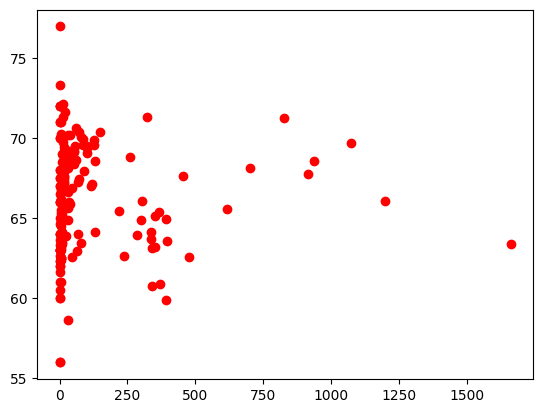

In [33]:
plt.scatter(counts, promedios, color='r')
plt.show()

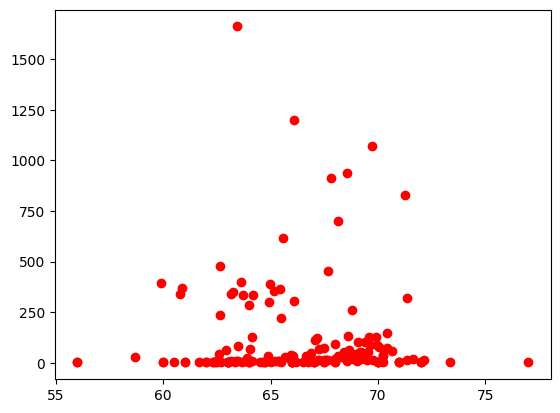

In [34]:
plt.scatter(promedios, counts, color='r')
plt.show()

In [53]:
dic = dict(zip(np.unique(dataset[:,0], return_counts=True)[0], np.unique(dataset[:,0], return_counts=True)[1]))

In [54]:
dic[list(dic.keys())[0]]

4

In [57]:
np.where(counts<dataset.shape[0]/unique.shape[0])[0].shape[0]

129

In [58]:
np.where(counts<dataset.shape[0]/unique.shape[0])[0]

array([  0,   1,   2,   3,   4,   5,   7,  10,  11,  12,  14,  15,  16,
        17,  18,  19,  21,  22,  23,  24,  25,  26,  27,  28,  32,  33,
        34,  36,  37,  38,  39,  40,  42,  43,  44,  45,  47,  48,  49,
        50,  51,  52,  53,  54,  56,  57,  58,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  79,
        80,  82,  83,  84,  85,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 102, 103, 104, 105, 106, 107, 109,
       110, 111, 112, 114, 116, 117, 118, 119, 120, 121, 124, 125, 127,
       128, 129, 134, 135, 136, 137, 138, 140, 141, 142, 143, 146, 147,
       148, 149, 150, 151, 152, 154, 155, 156, 159, 160, 162, 163])

In [59]:
newDataset = dataset

In [60]:
for i in range(np.where(counts<dataset.shape[0]/unique.shape[0])[0].shape[0]):
    newDataset=np.delete(newDataset,np.where(newDataset == np.delete(unique,np.where(counts>dataset.shape[0]/unique.shape[0]))[i])[0],axis=0)

In [61]:
newDataset

array([['Argentina', 'FC Barcelona', 94, 94, '€110.5M', '€565K'],
       ['Portugal', 'Juventus', 94, 94, '€77M', '€405K'],
       ['Brazil', 'Paris Saint-Germain', 92, 93, '€118.5M', '€290K'],
       ...,
       ['England', 'Cambridge United', 47, 67, '€60K', '€1K'],
       ['England', 'Tranmere Rovers', 47, 66, '€60K', '€1K'],
       ['England', 'Tranmere Rovers', 46, 66, '€60K', '€1K']],
      dtype=object)

In [62]:
unique2, counts2= np.unique(newDataset[:,0], return_counts=True)

In [63]:
promedios = [sum([dataset[j][2] for j in np.where(dataset == unique[i])[0]])/np.where(dataset == unique[i])[0].shape[0] for i in range(len(unique))]

In [64]:
len(promedios)

164

In [65]:
dic = {x[0]:x[1] for x in zip(unique,promedios)}
teams_sort = dict(sorted(dic.items(), key=operator.itemgetter(1), reverse=True))

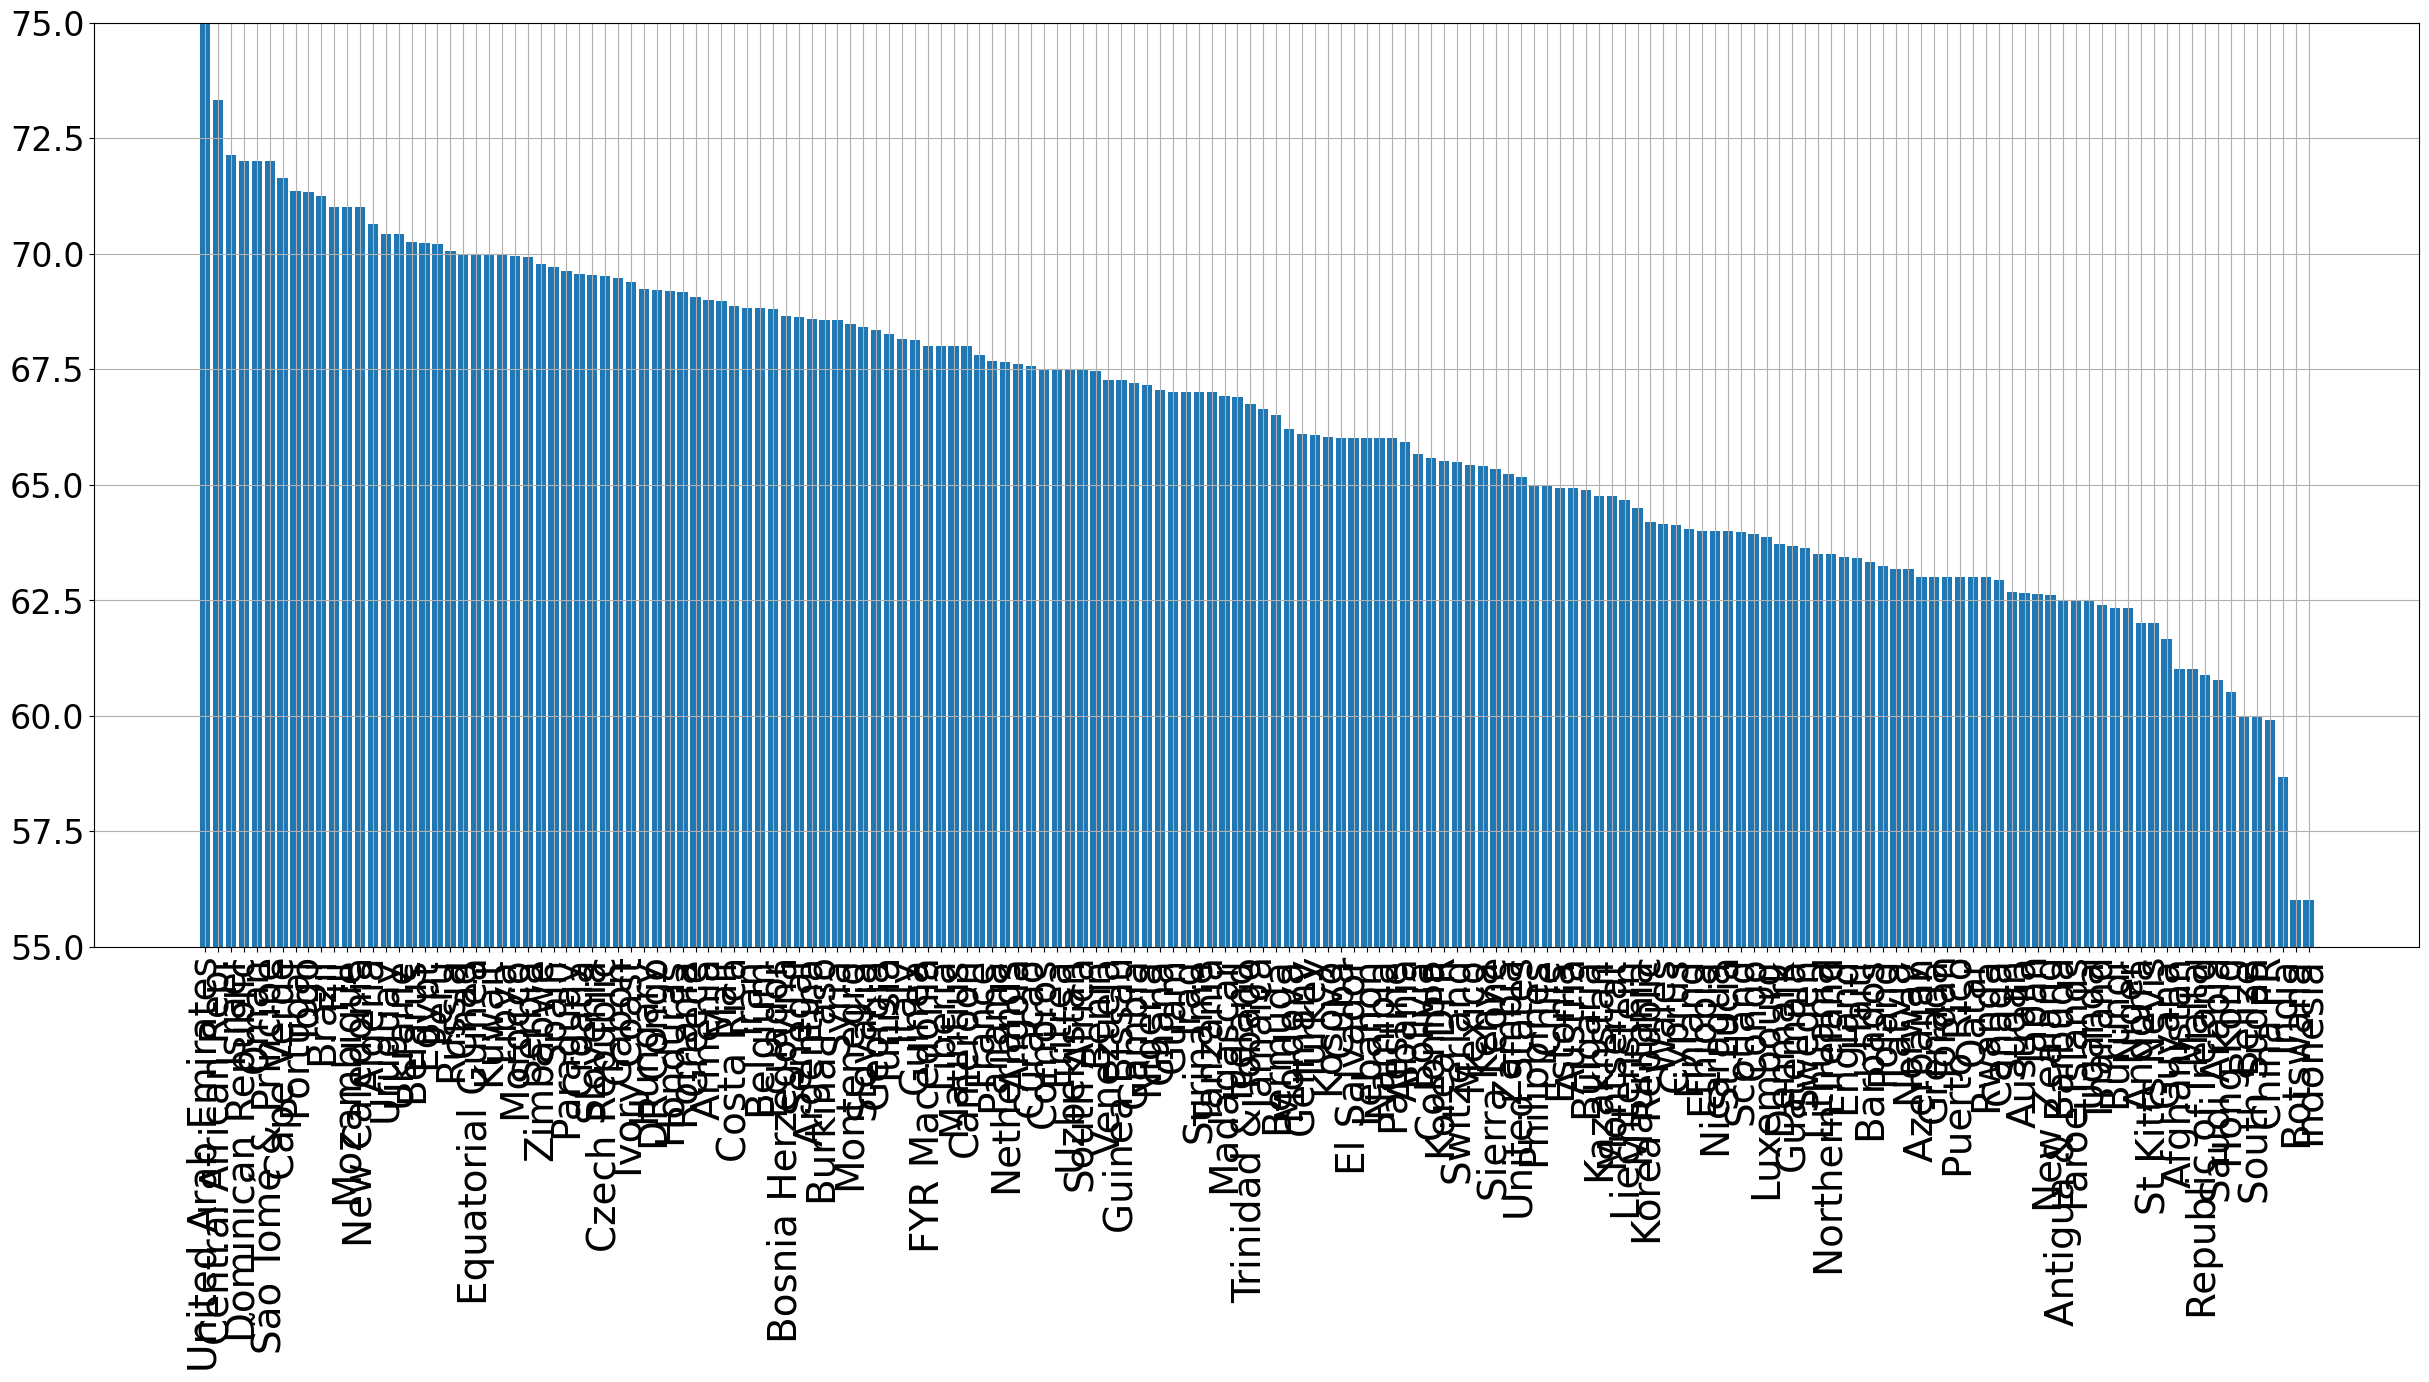

In [66]:
plt.figure(figsize=(30,12))
plt.bar(teams_sort.keys(),teams_sort.values())
plt.ylim(55,75)
plt.yticks(fontsize=24)
plt.xticks(list(teams_sort.keys()), rotation='vertical', fontsize=28)
plt.grid()
plt.show()

In [23]:
borrar = "€K"
for i in range(0,2,1):
    for j in range(len(newDataset[:,4+i])):
        for k in range(len(borrar)):
            newDataset[:,4+i][j] = newDataset[:,4+i][j].replace(borrar[k],"")
for i in range(0,2,1):
    for j in range(len(newDataset[:,4+i])):
        if newDataset[:,4+i][j][-1] == "M":
            newDataset[:,4+i][j] = float(newDataset[:,4+i][j].replace("M",""))*1000

In [24]:
for n in range(2):
    newDataset[:,4+n] = [float(num) for num in newDataset[:,4+n]]
for n in range(4):
    newDataset[:,2+n] = (newDataset[:,2+n] - min(newDataset[:,2+n]))/(max(newDataset[:,2+n])-min(newDataset[:,2+n]))

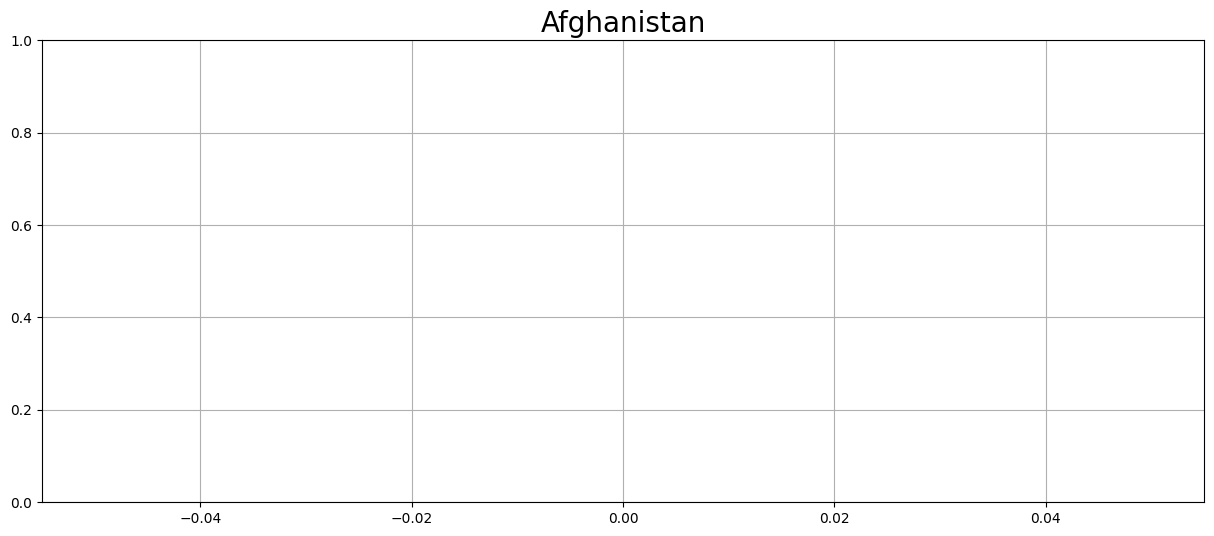

/home/jerry/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/jerry/.local/lib/python3.8/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/jerry/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/jerry/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/jerry/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


nan


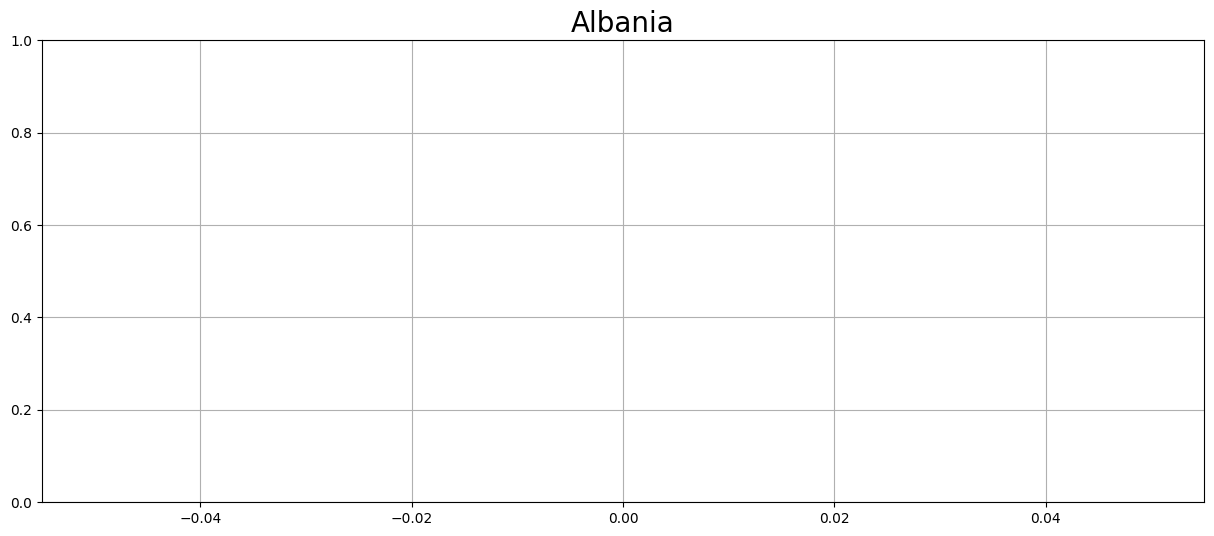

nan


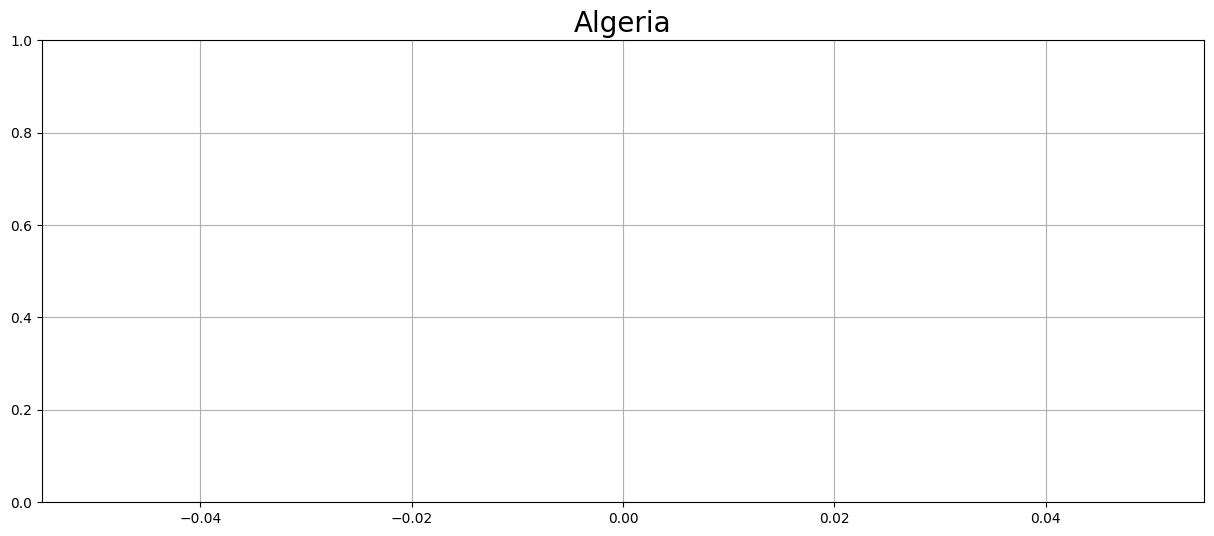

nan


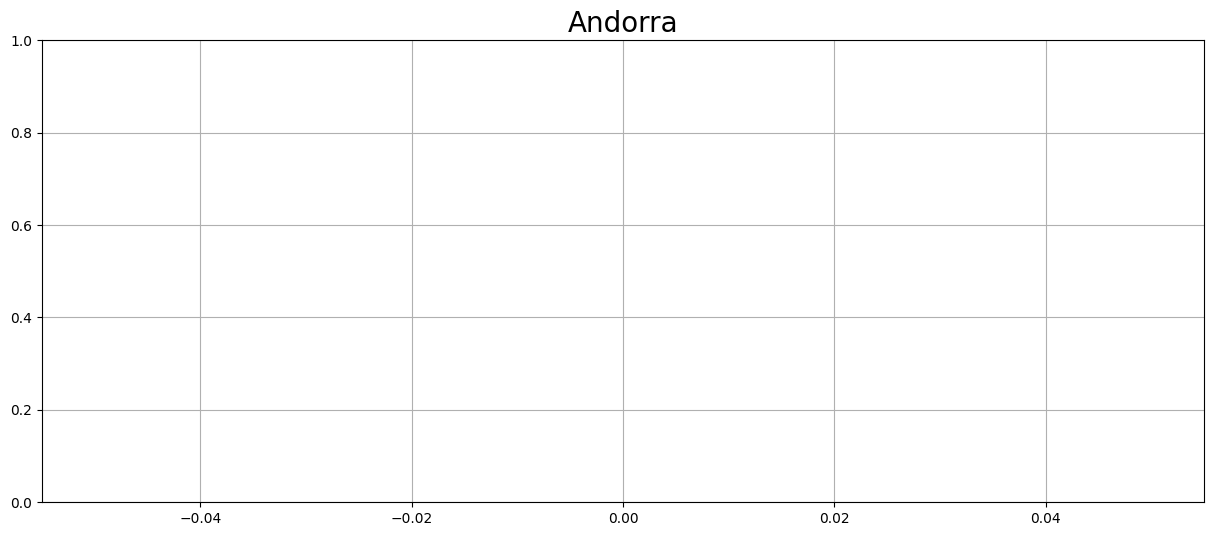

nan


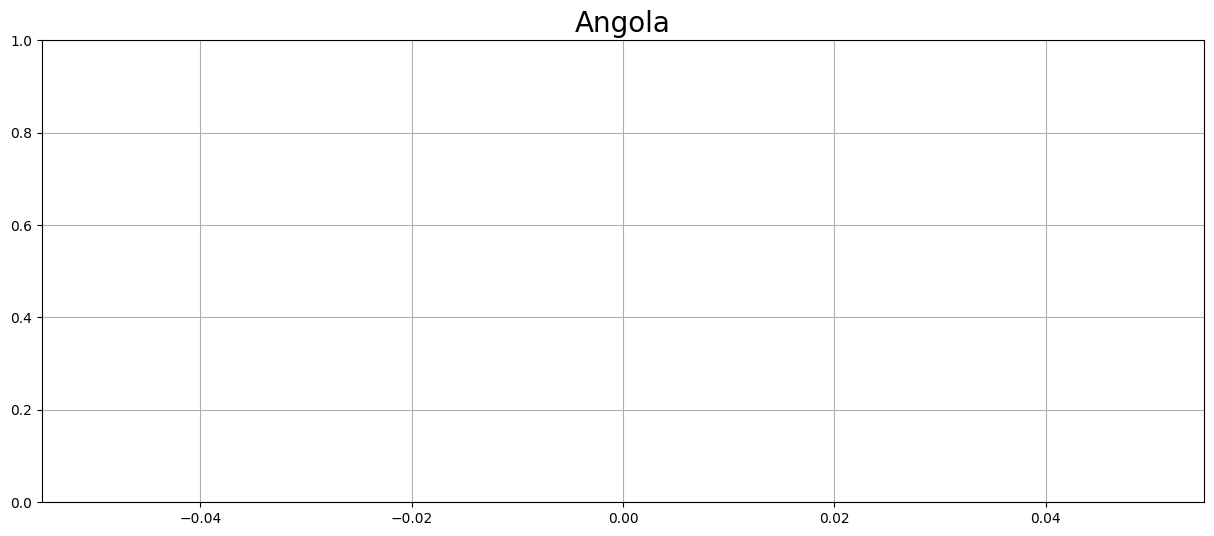

nan


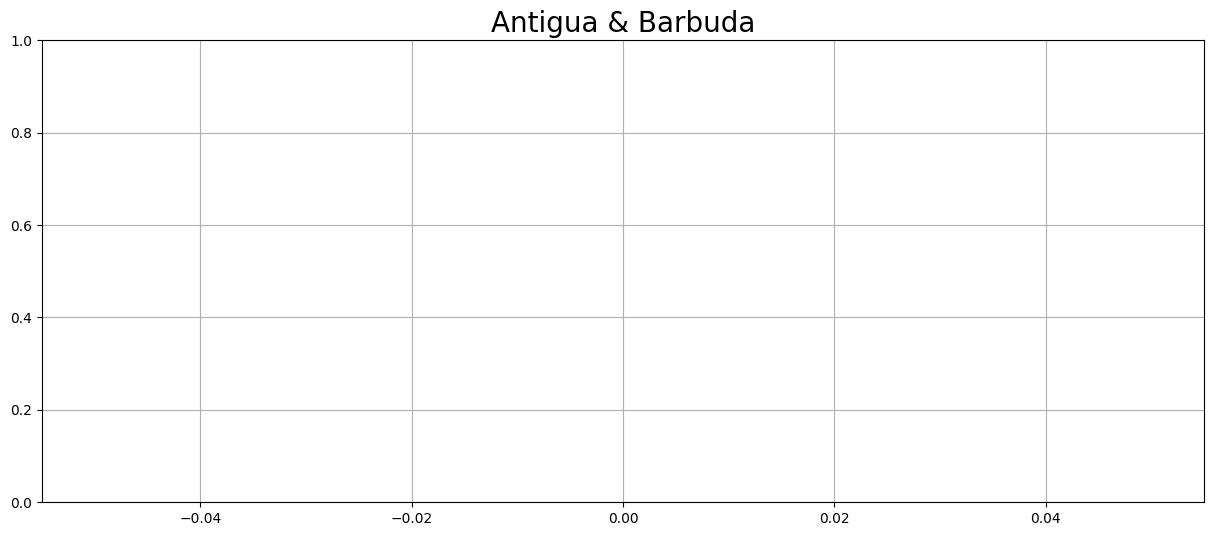

nan


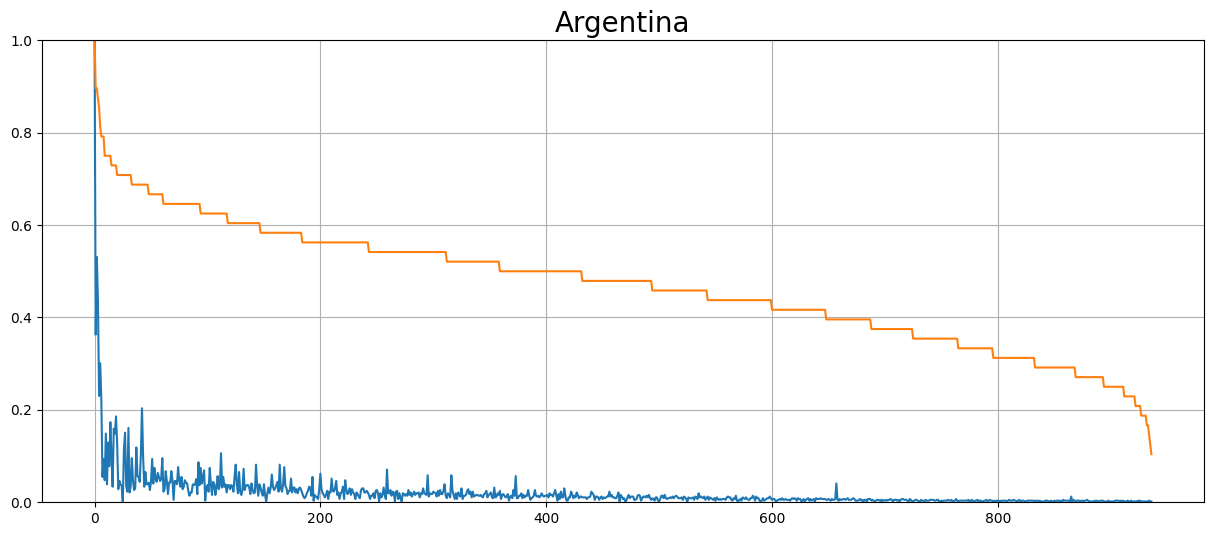

0.5303187060027524


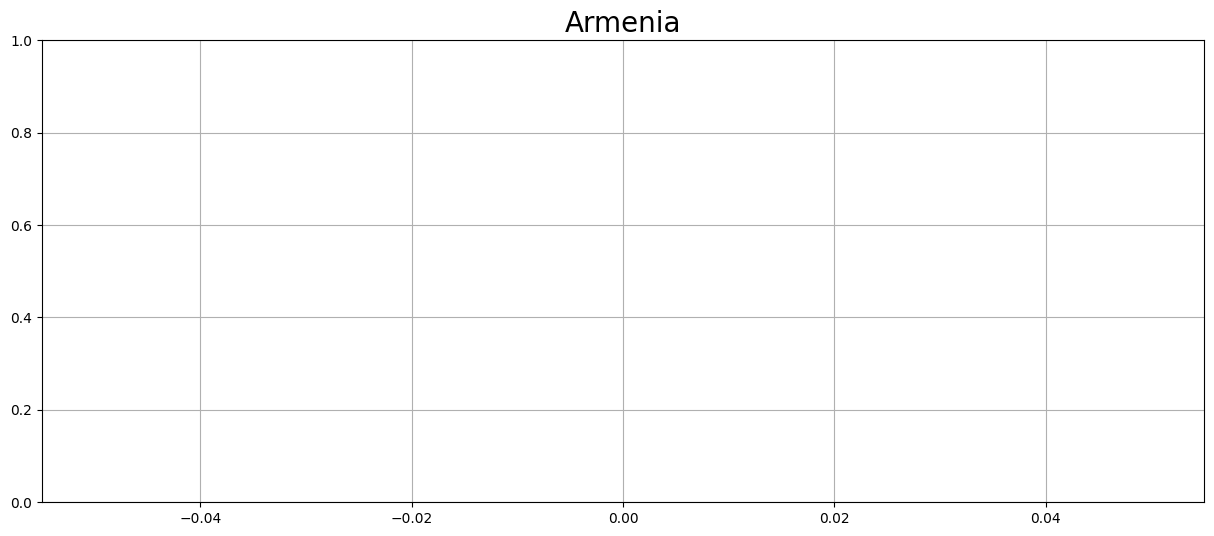

nan


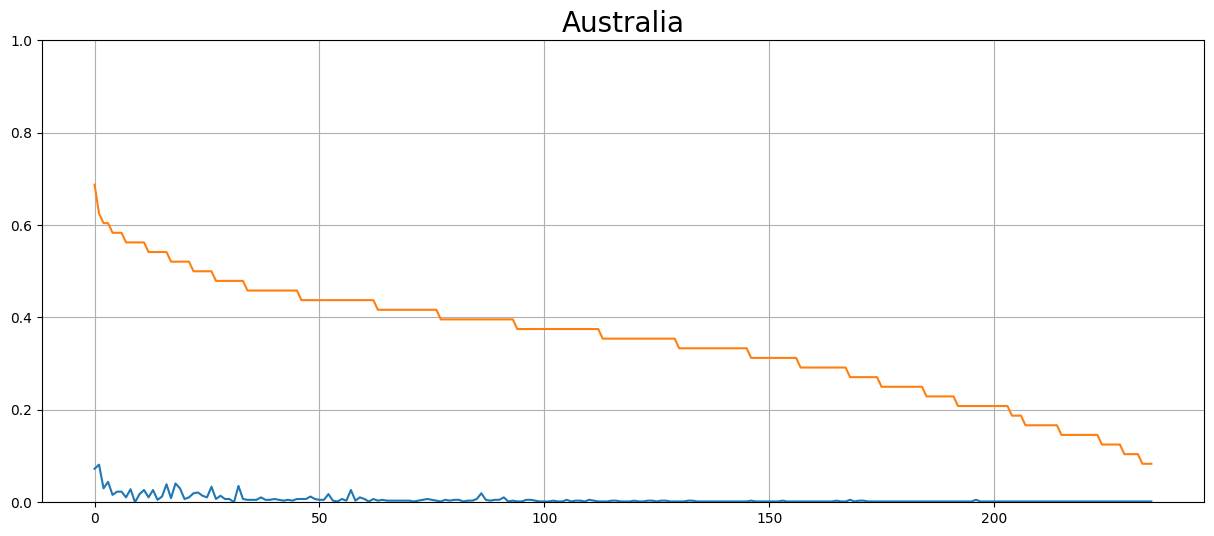

0.5829166064052697


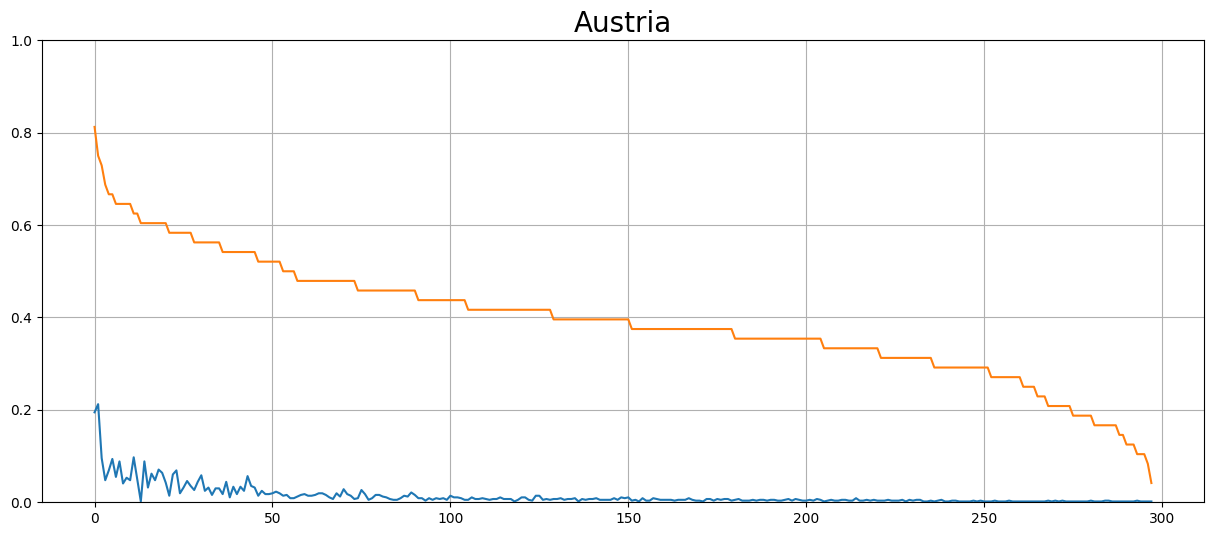

0.6897657101300979


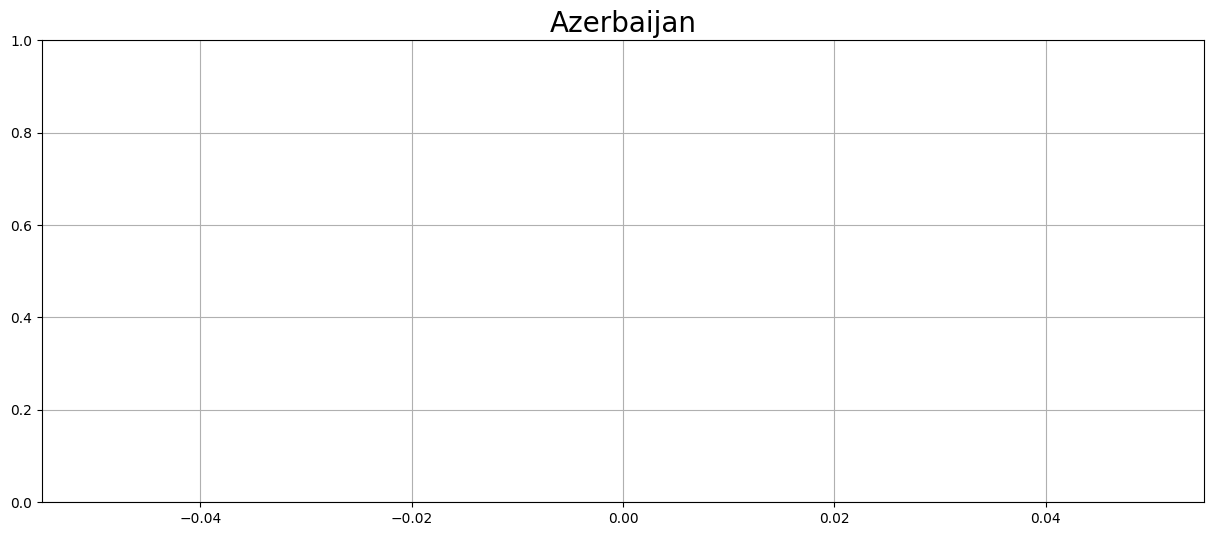

nan


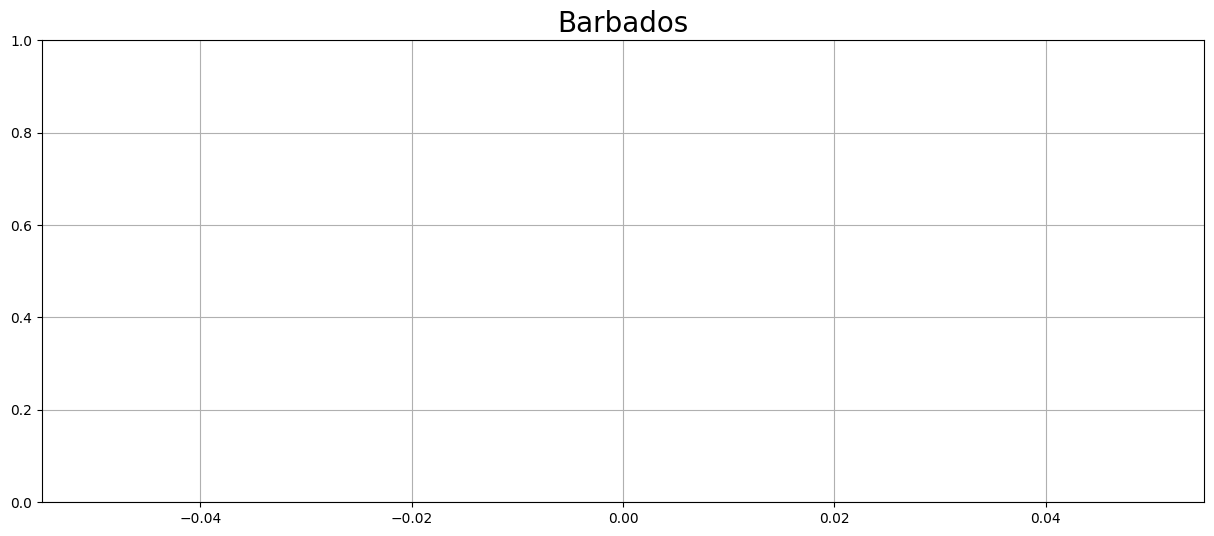

nan


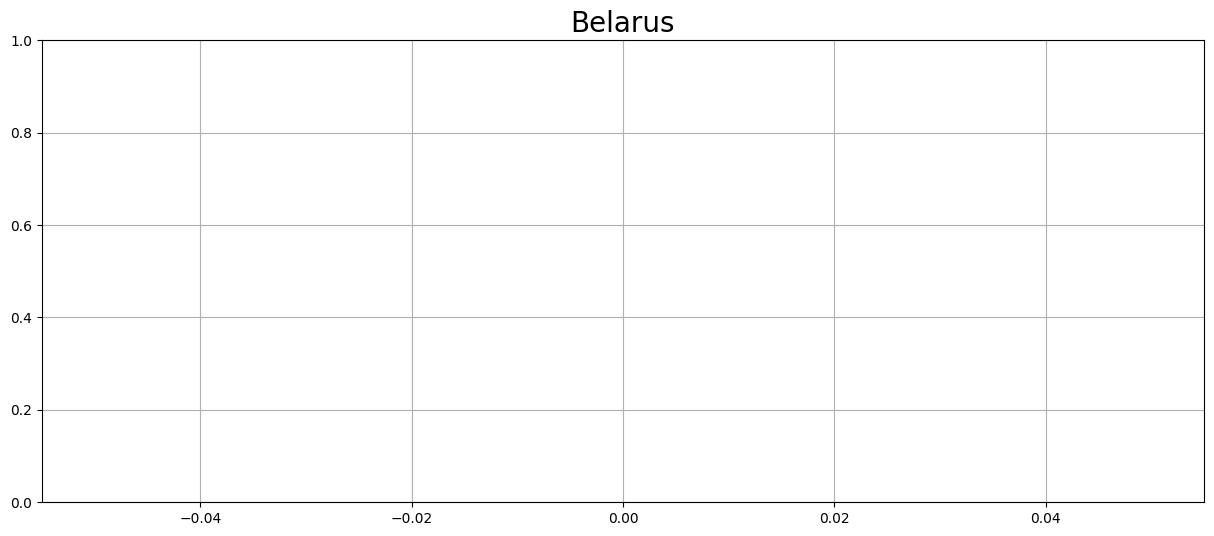

nan


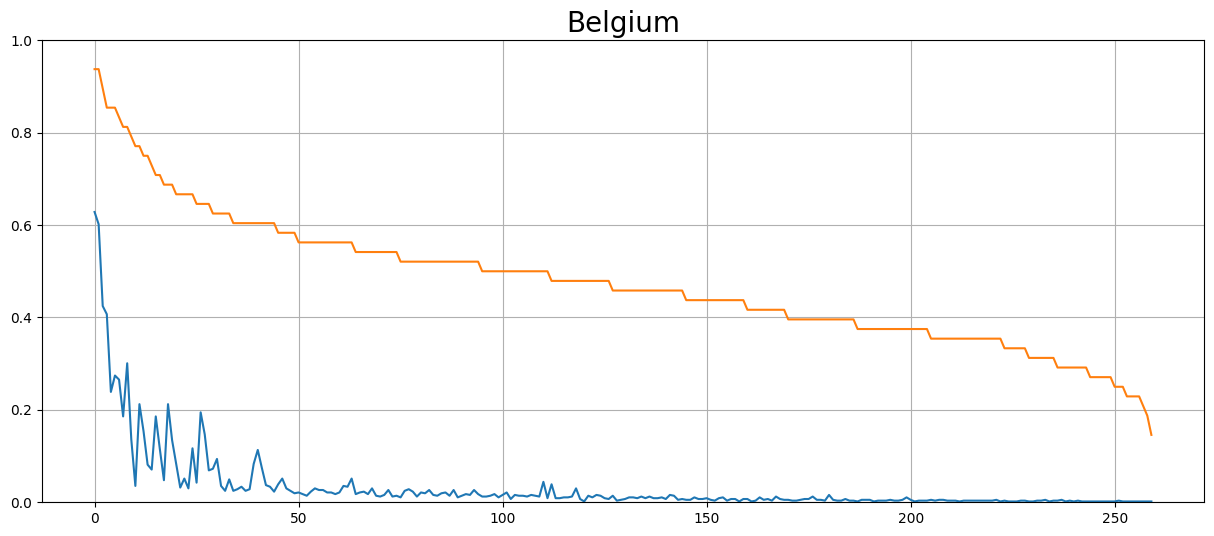

0.7083227684051041


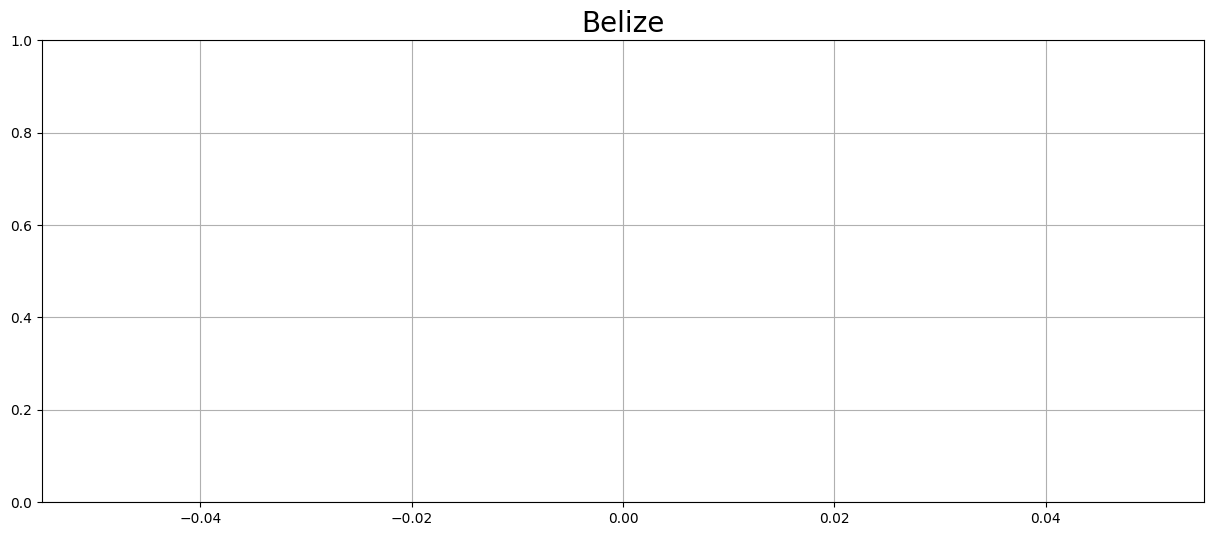

nan


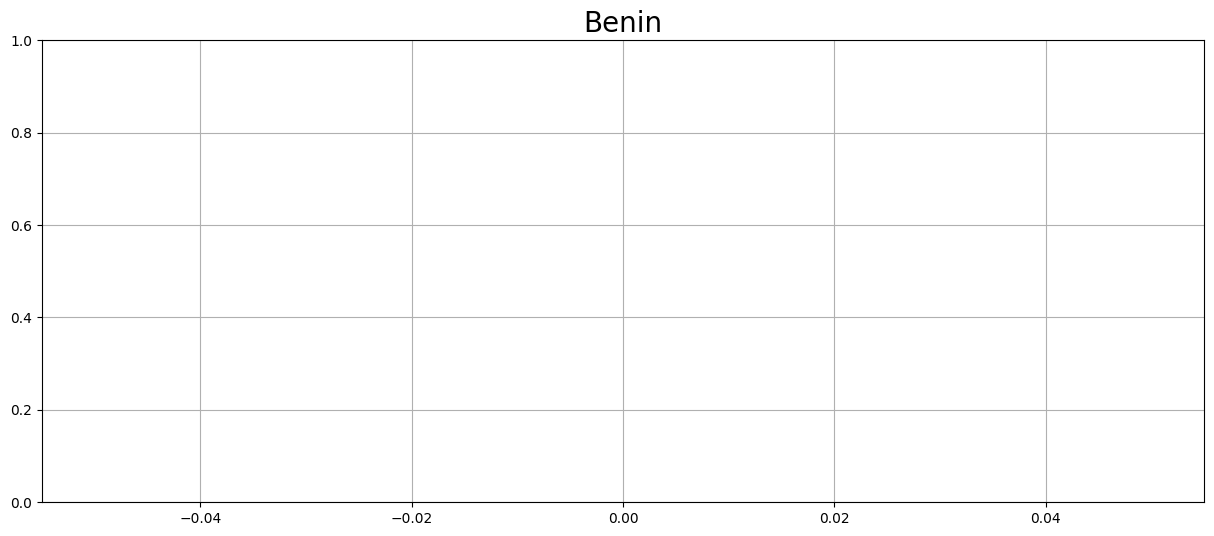

nan


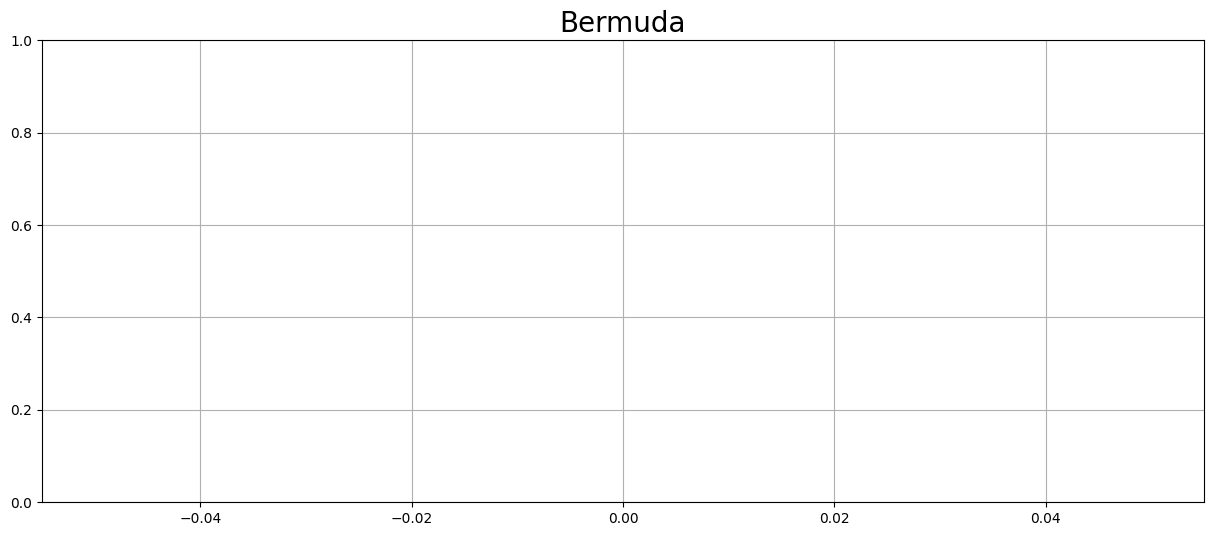

nan


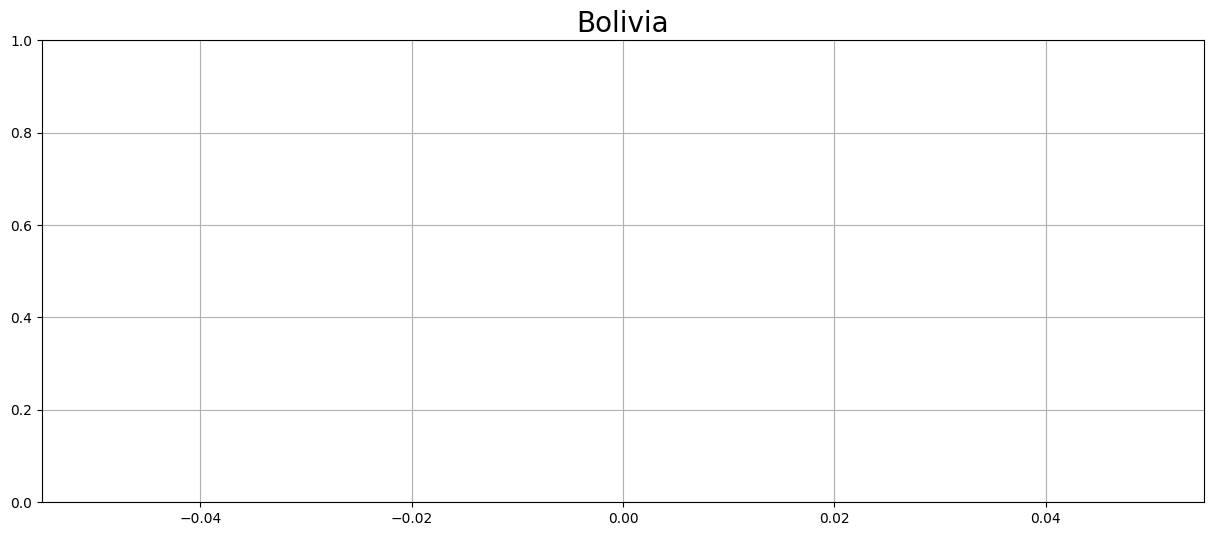

nan


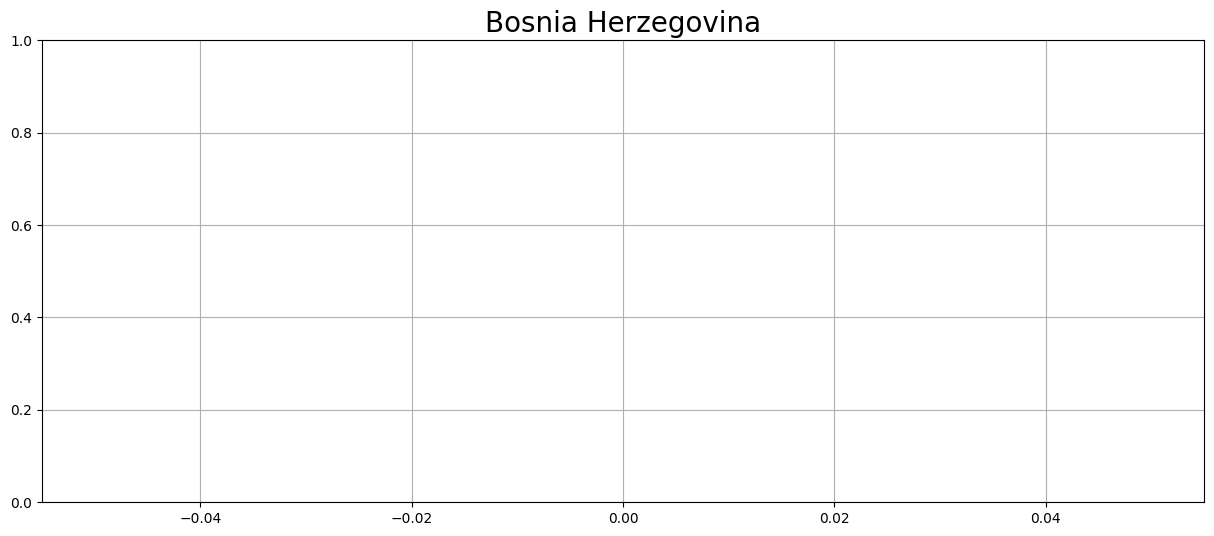

nan


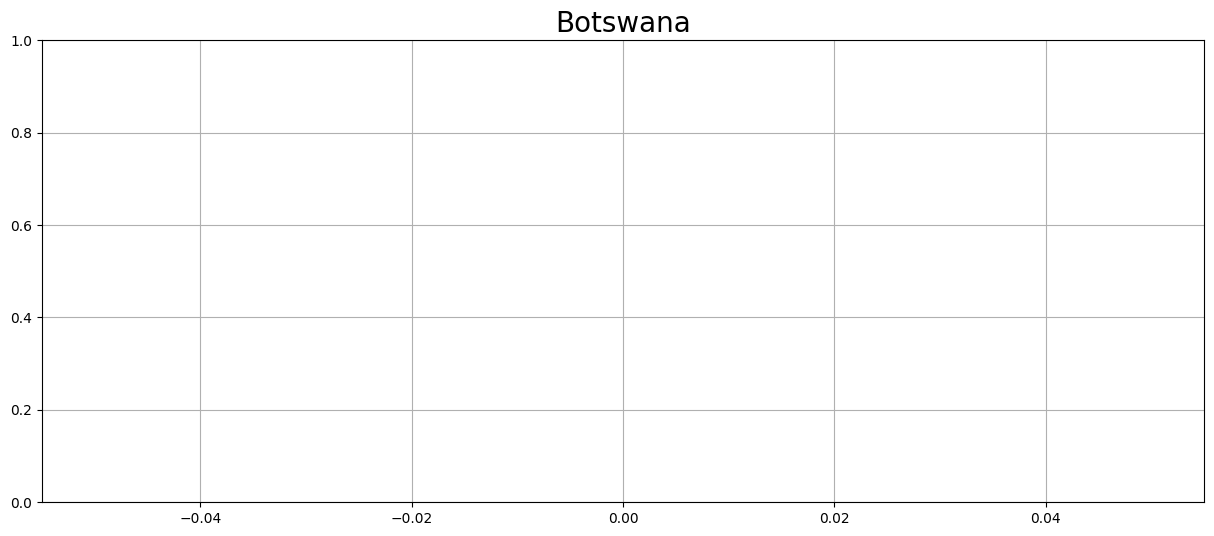

nan


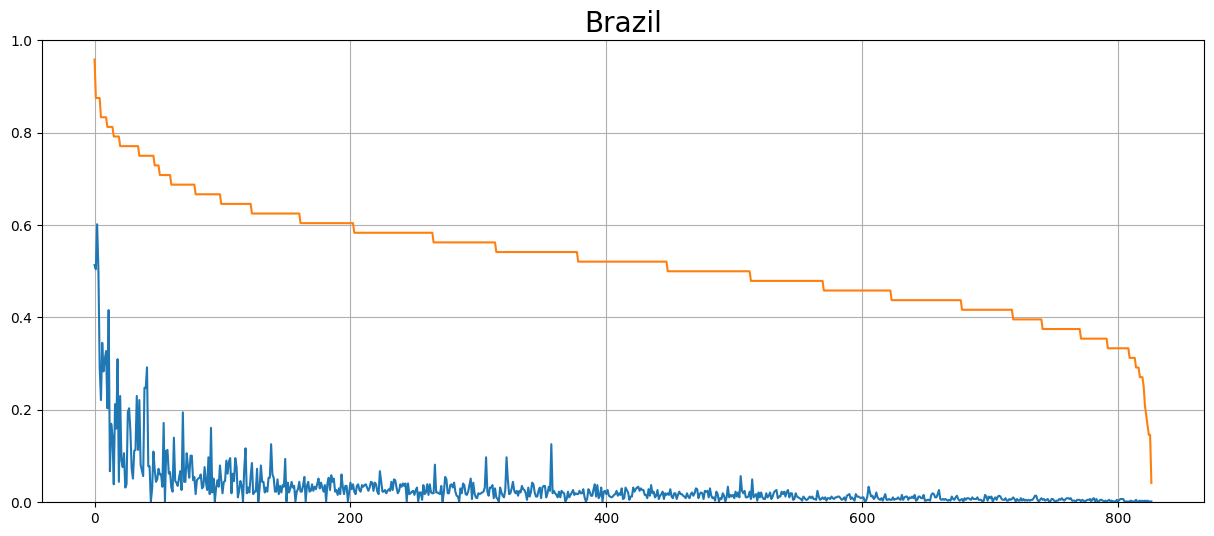

0.6345115593650518


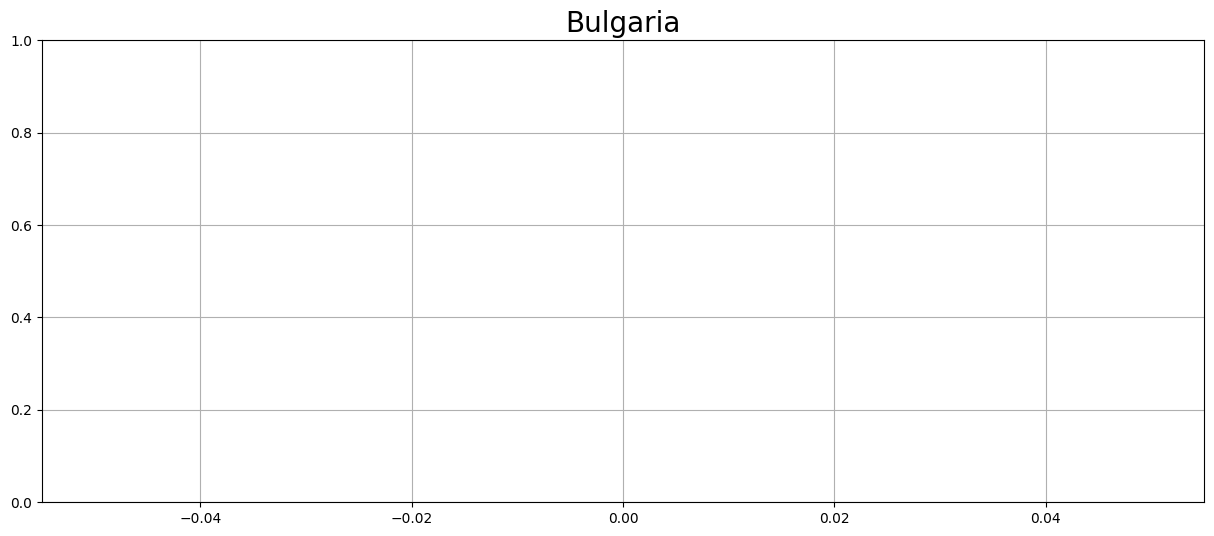

nan


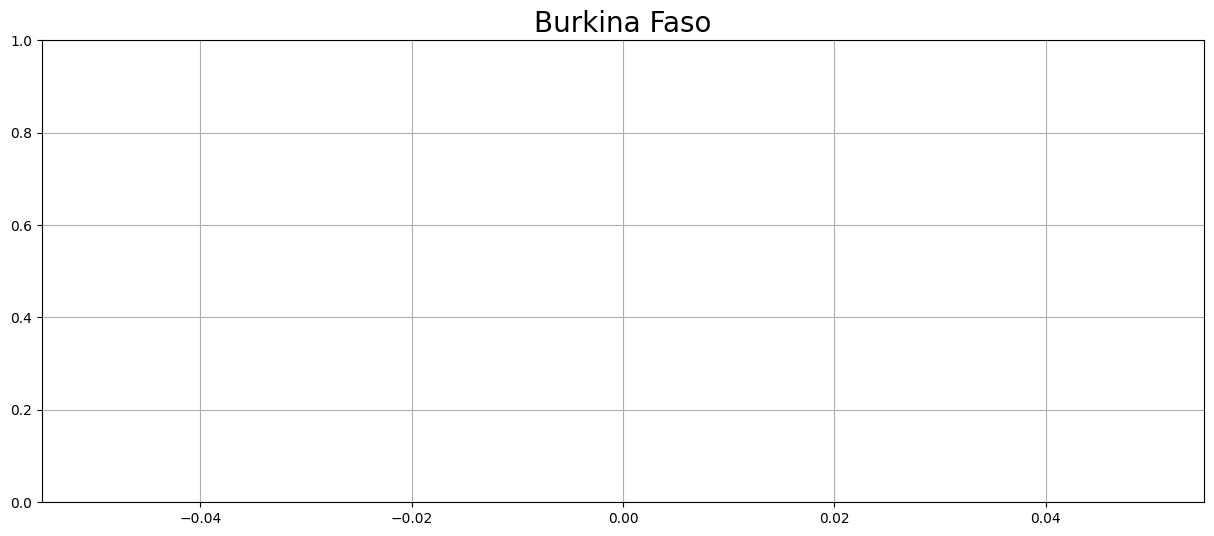

nan


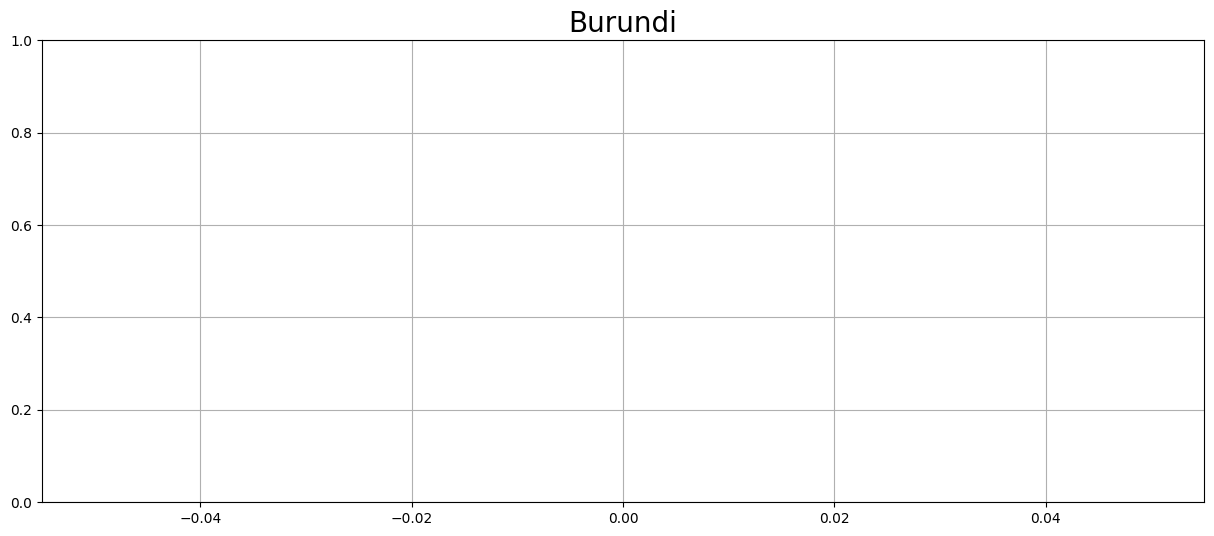

nan


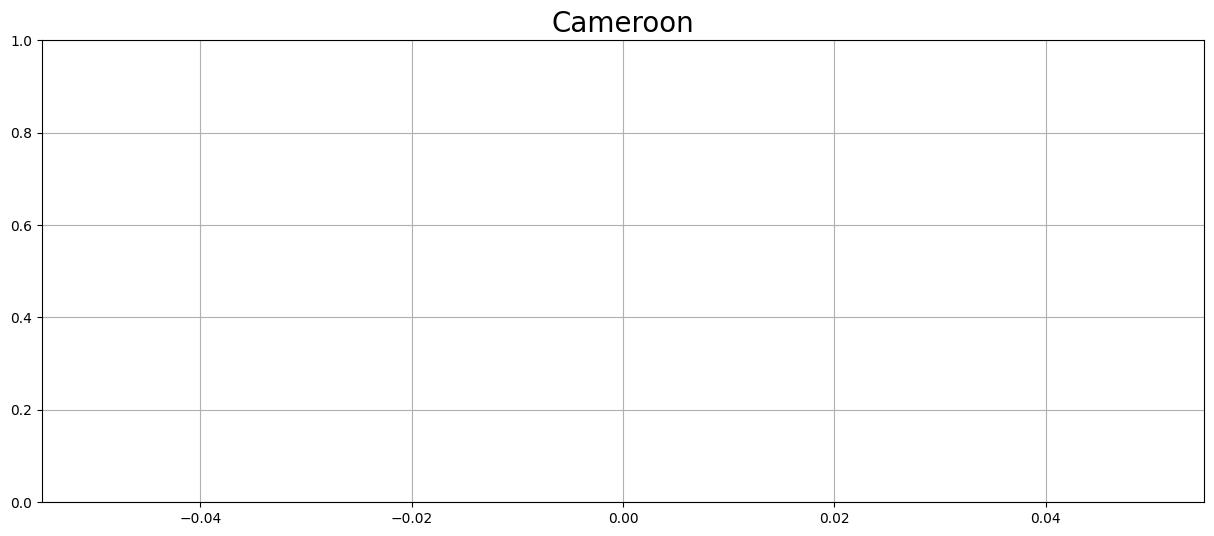

nan


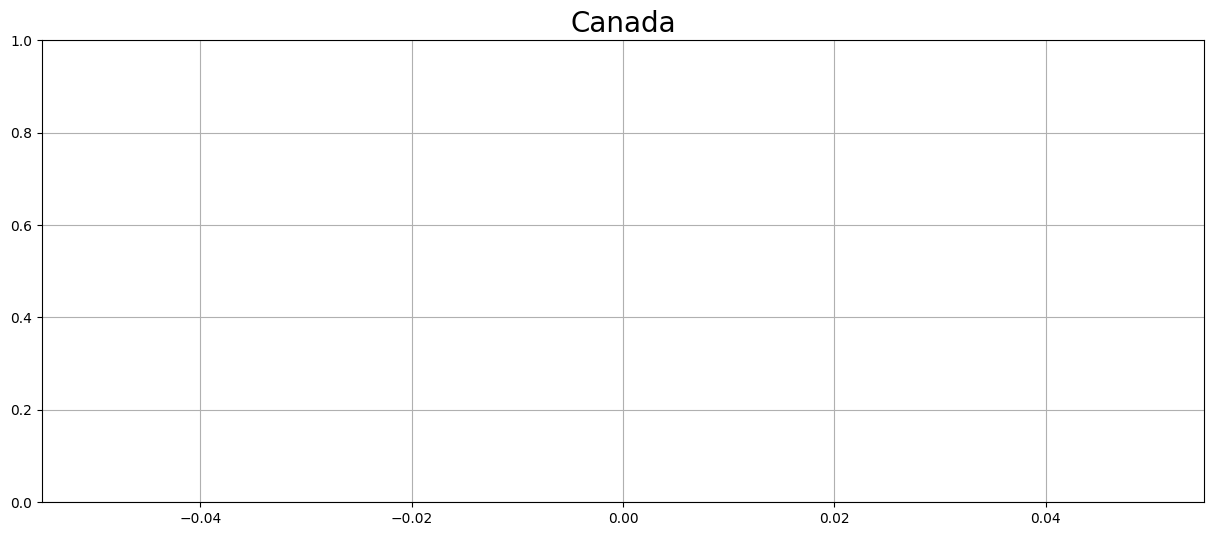

nan


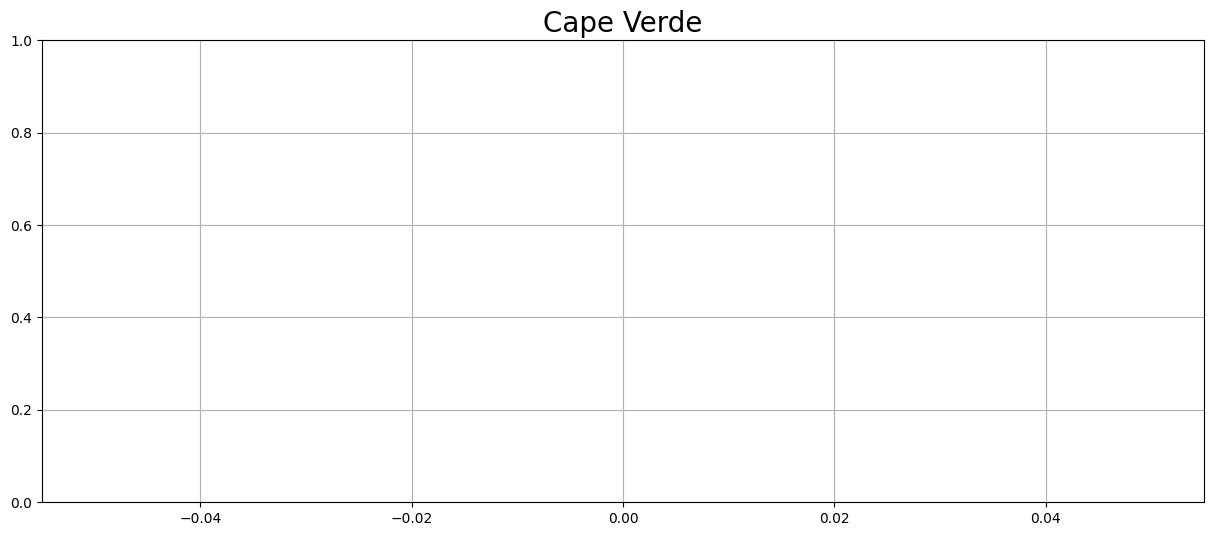

nan


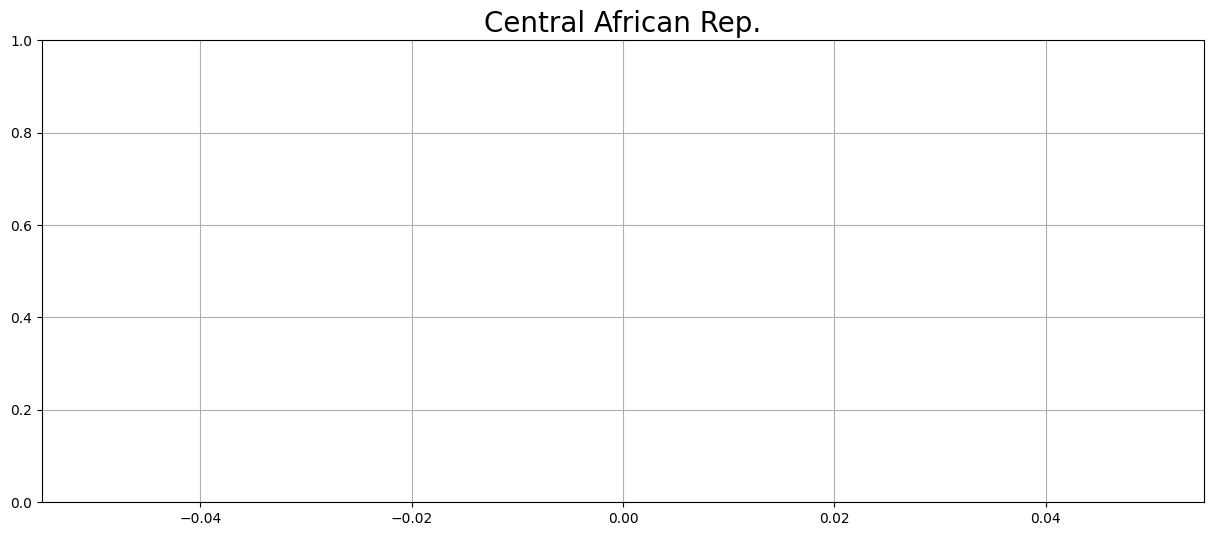

nan


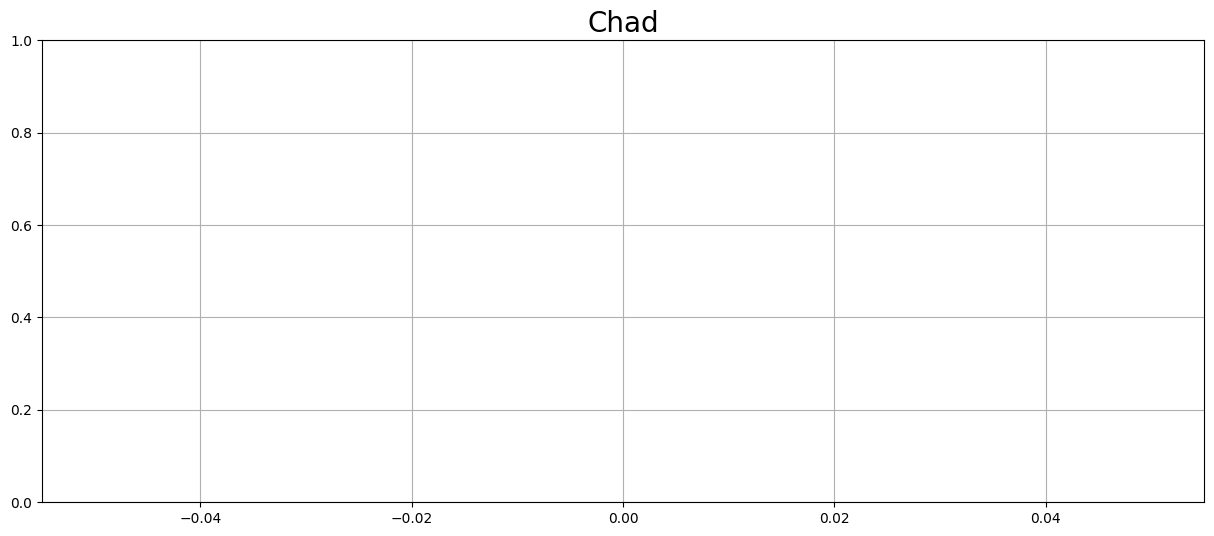

nan


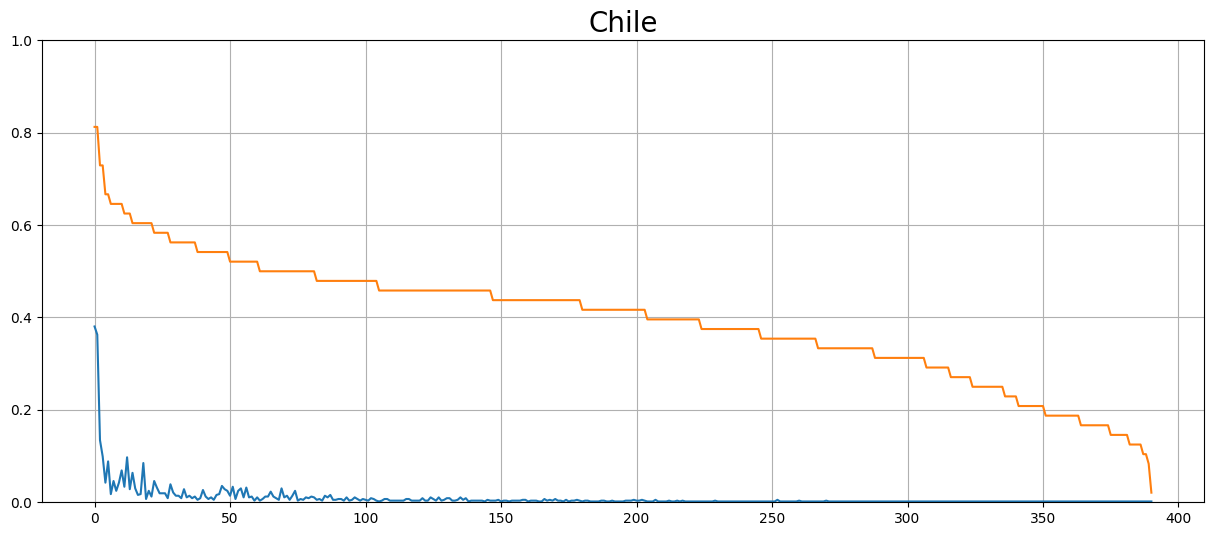

0.46121253722790634


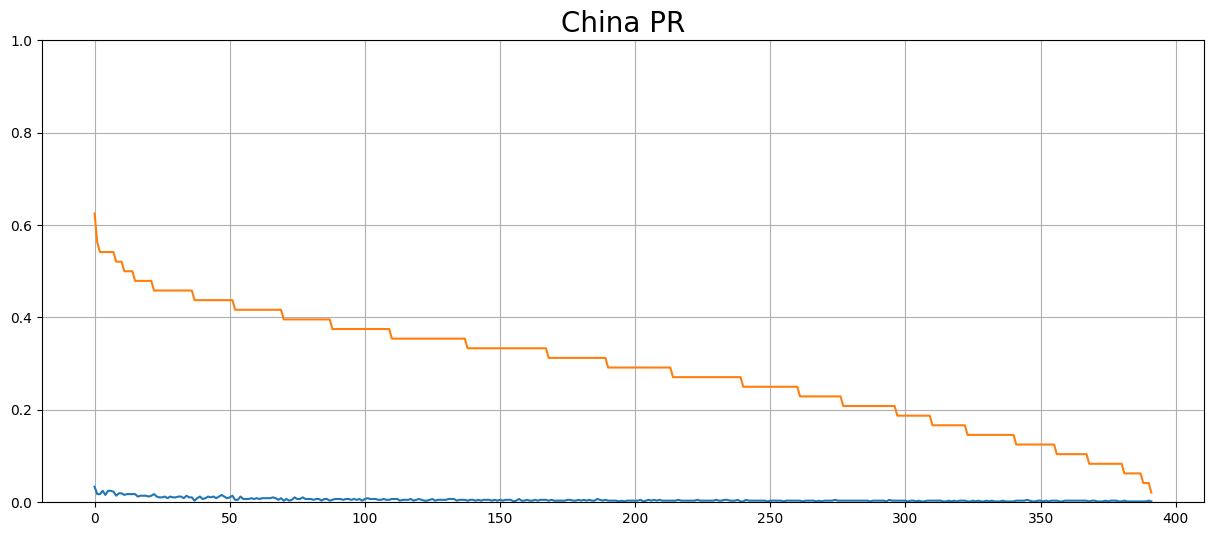

0.7611703175736312


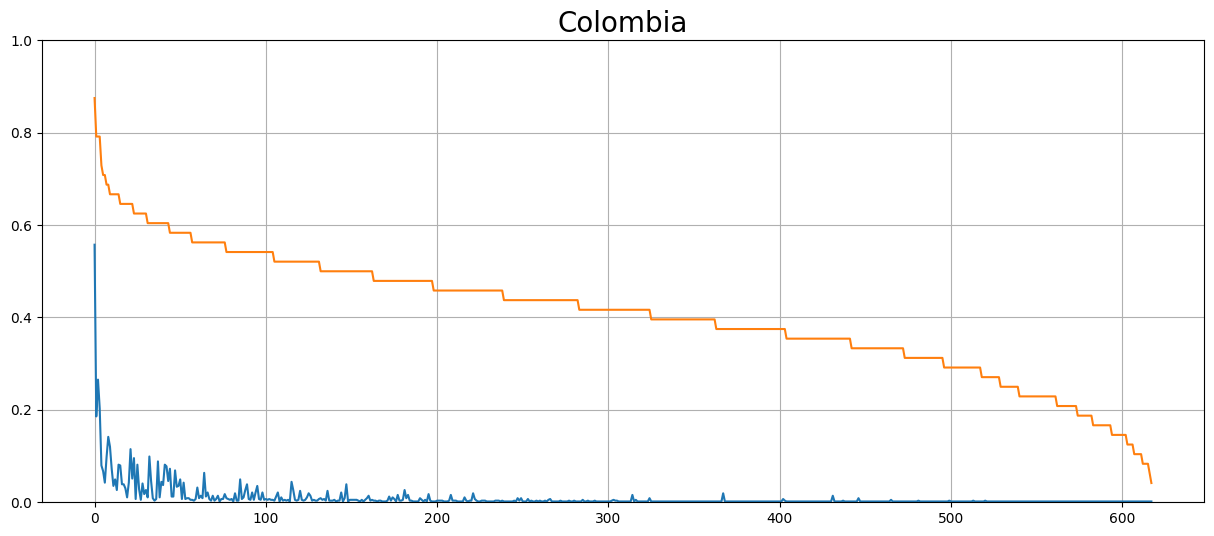

0.46034025005398677


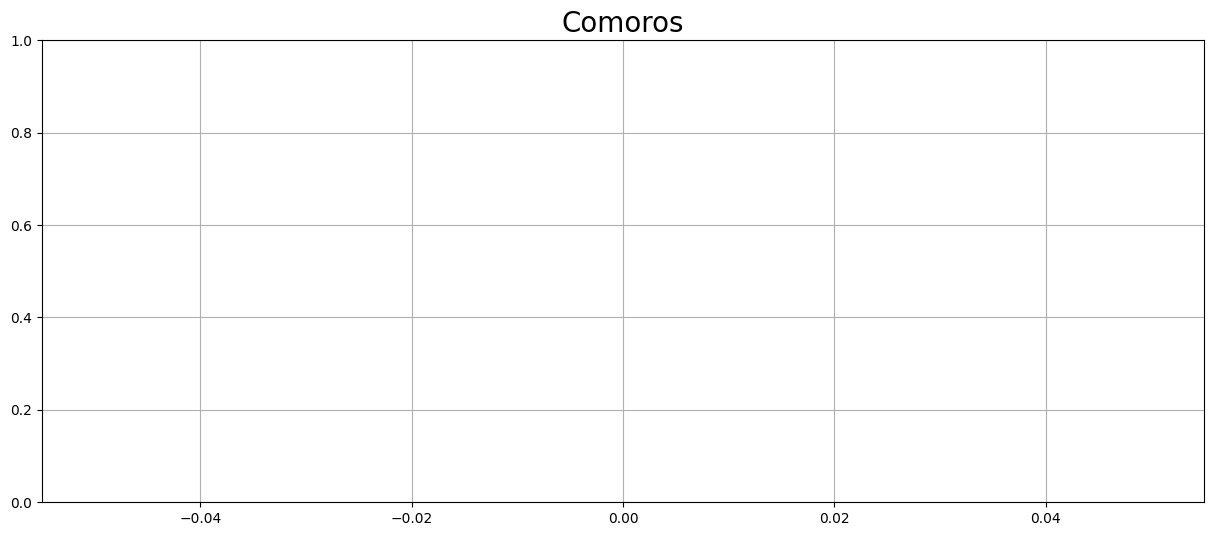

nan


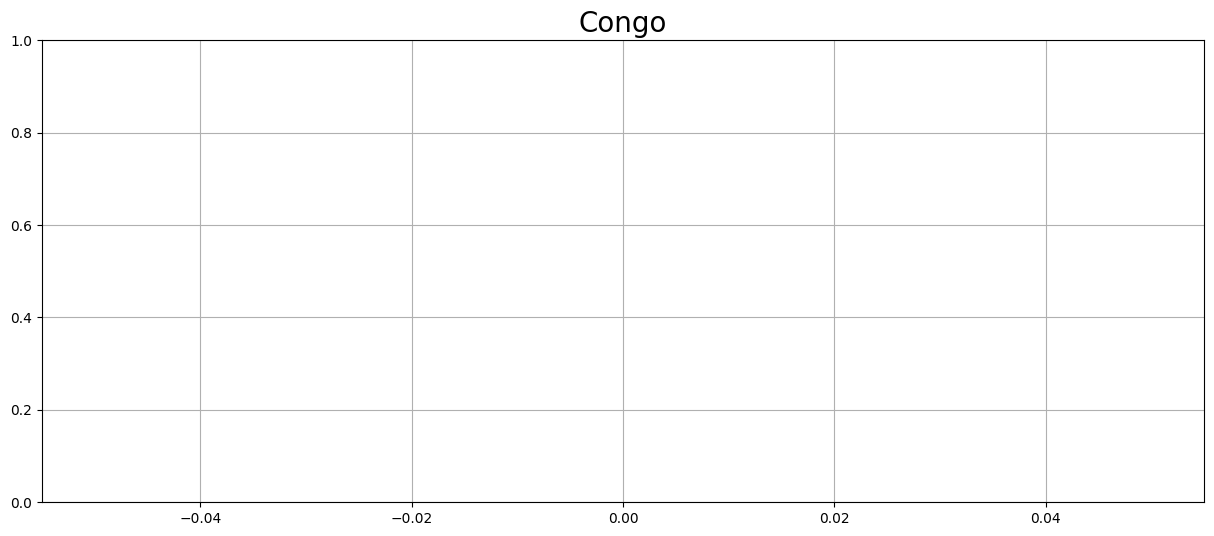

nan


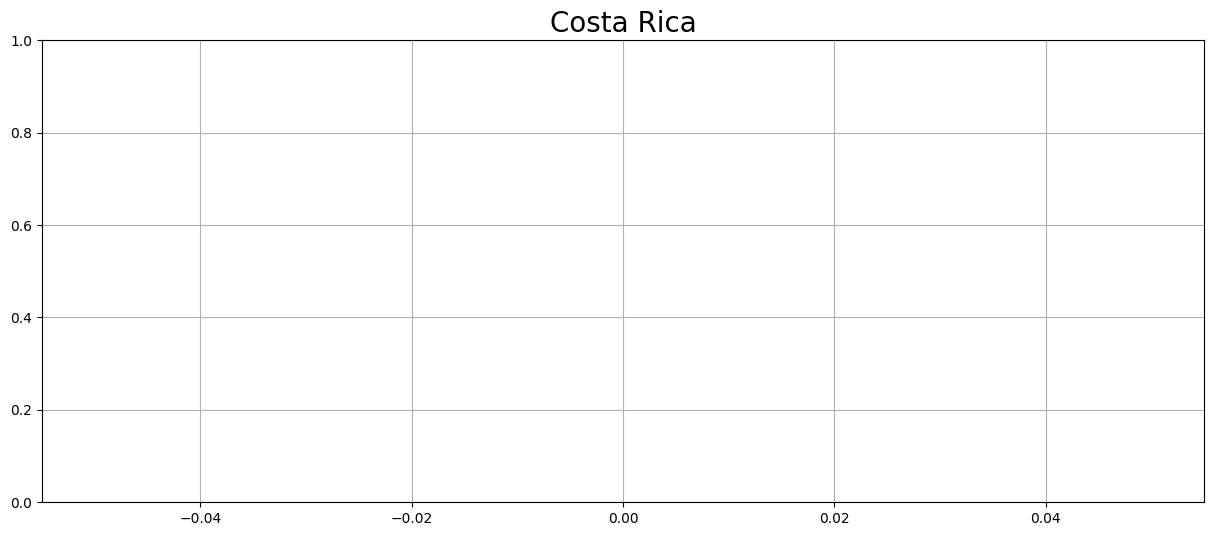

nan


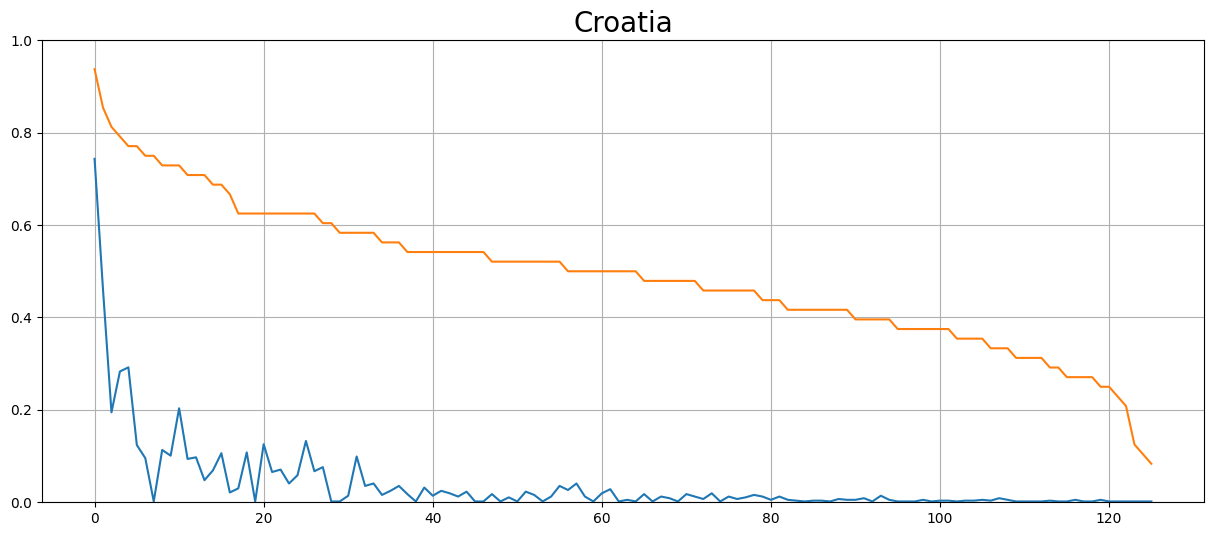

0.6271297388944496


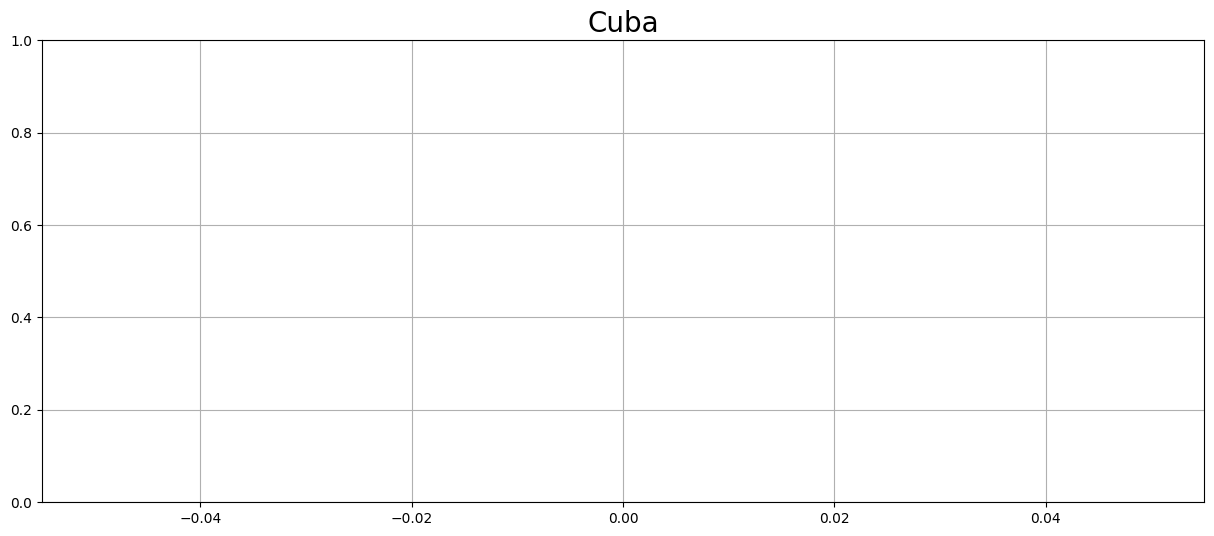

nan


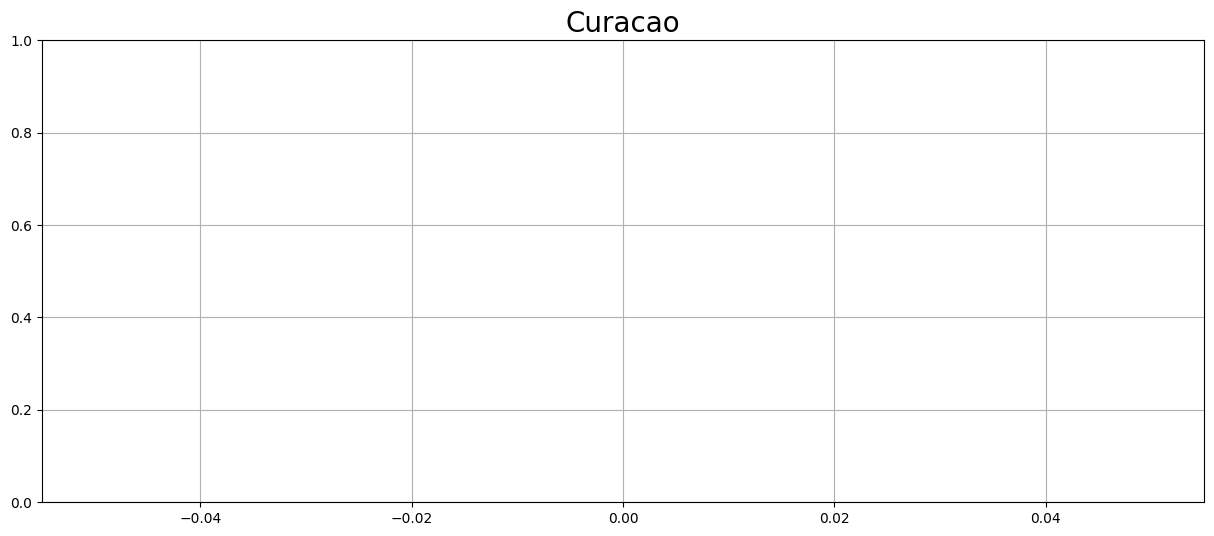

nan


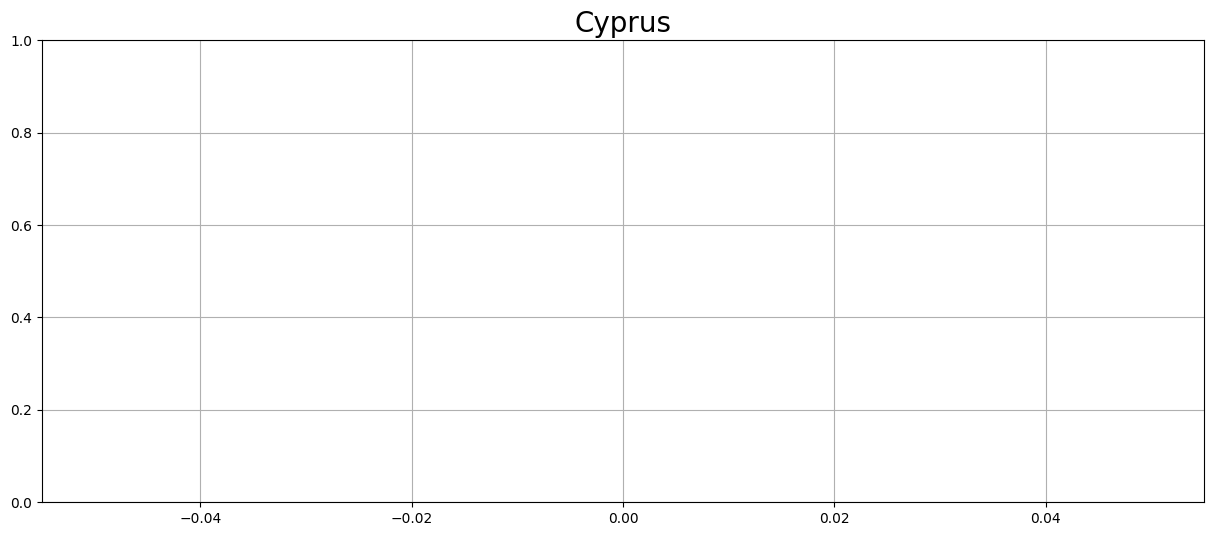

nan


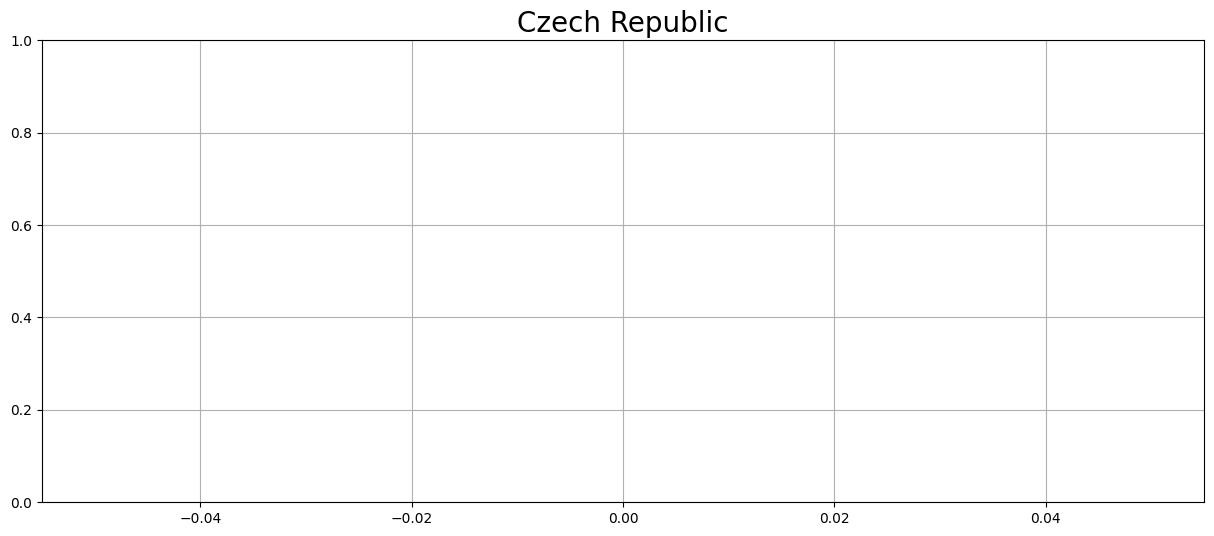

nan


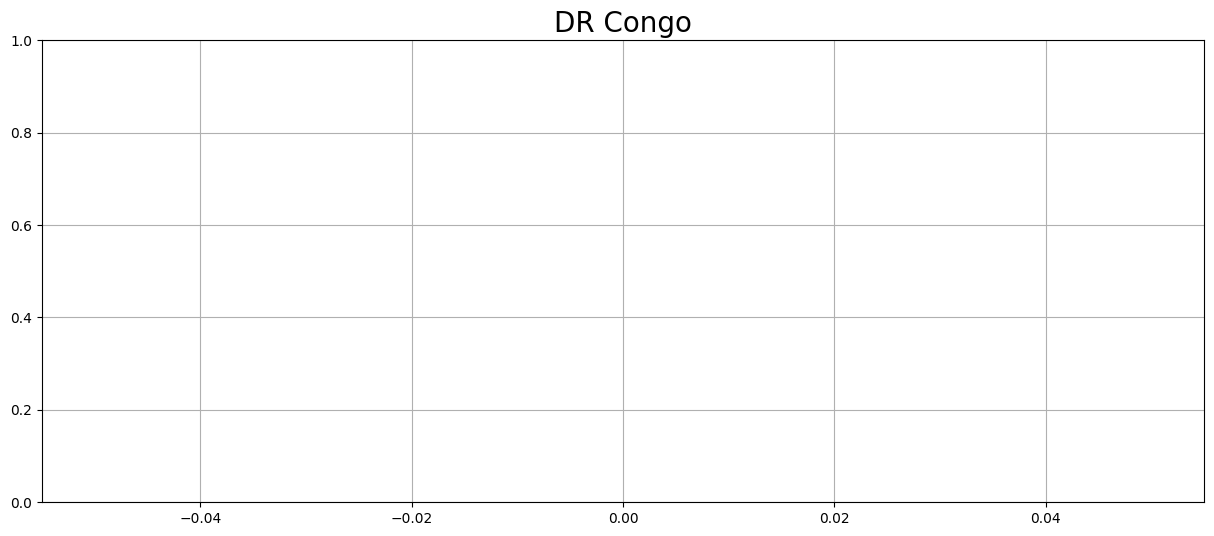

nan


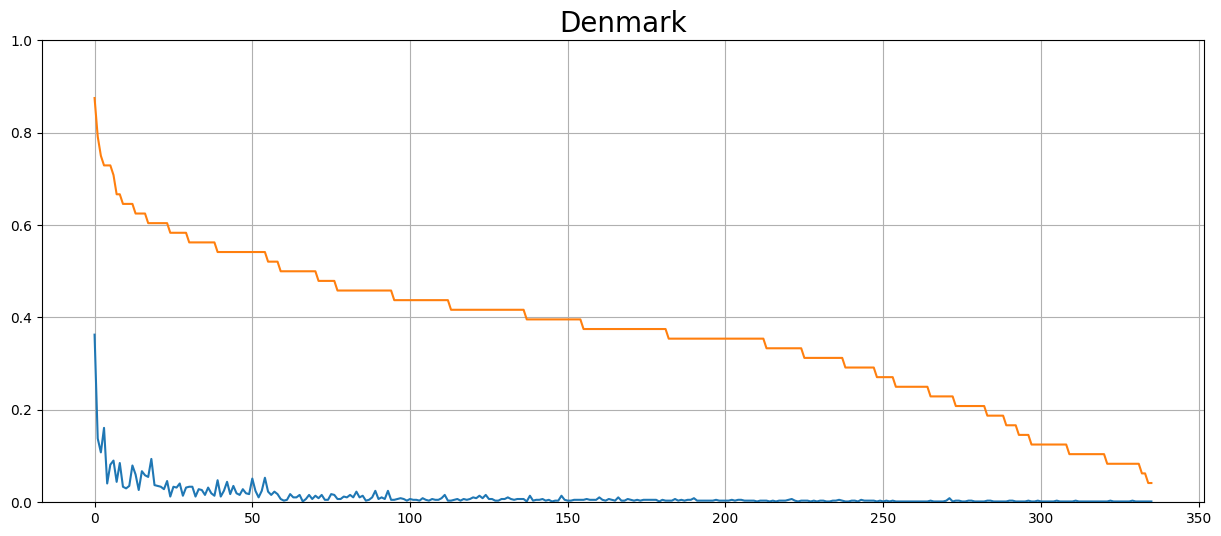

0.5797896601329181


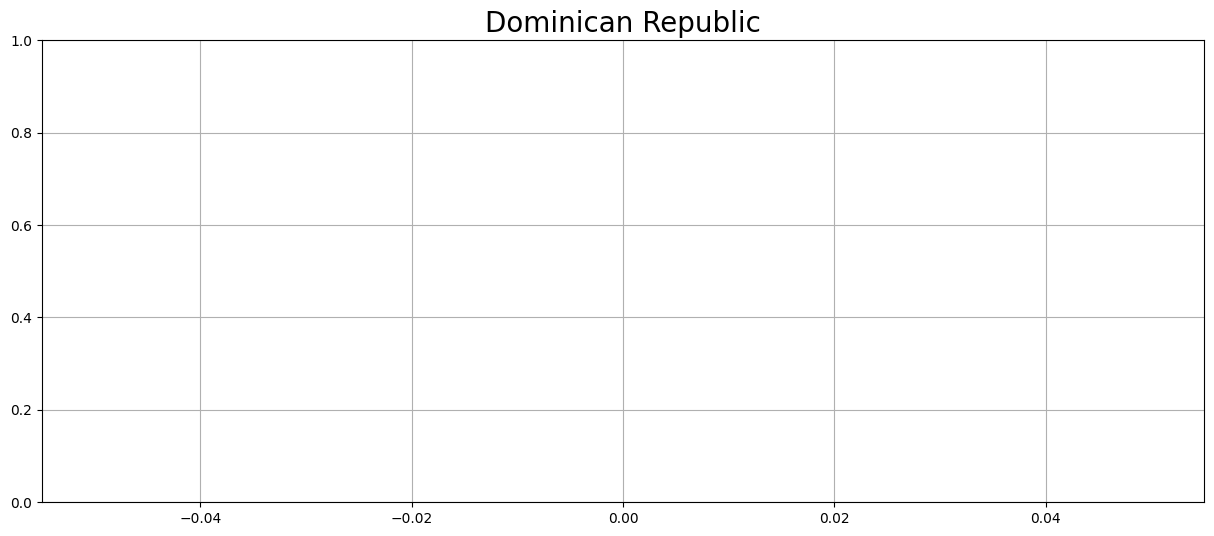

nan


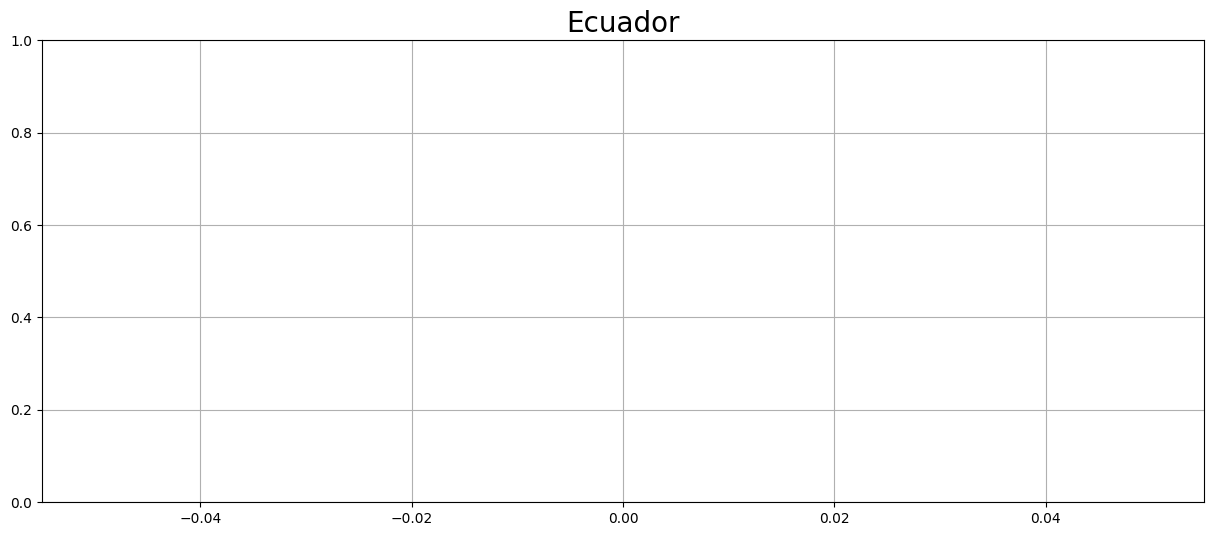

nan


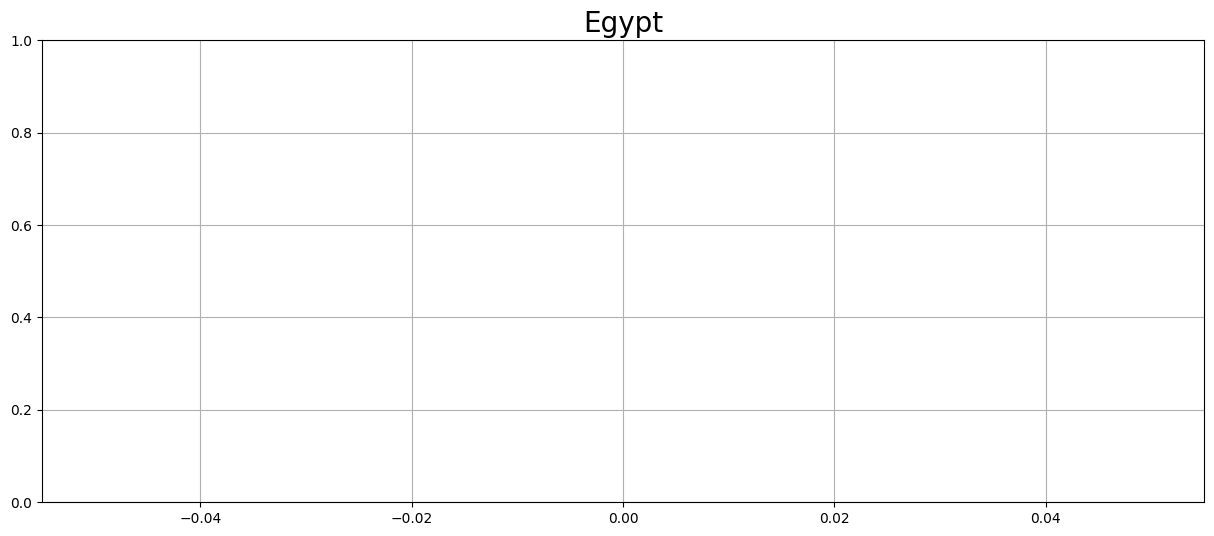

nan


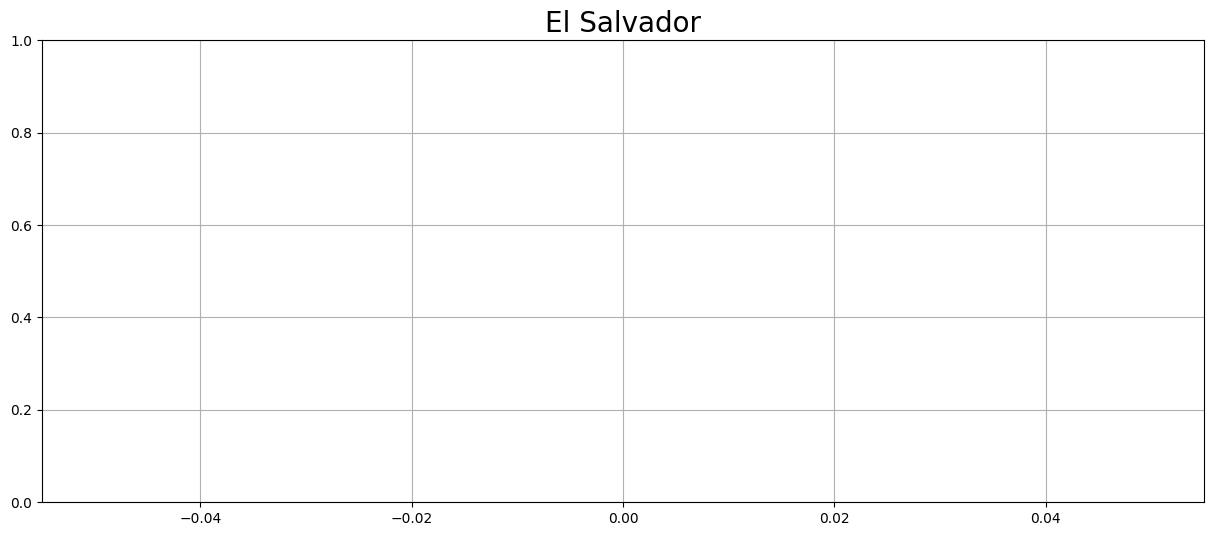

nan


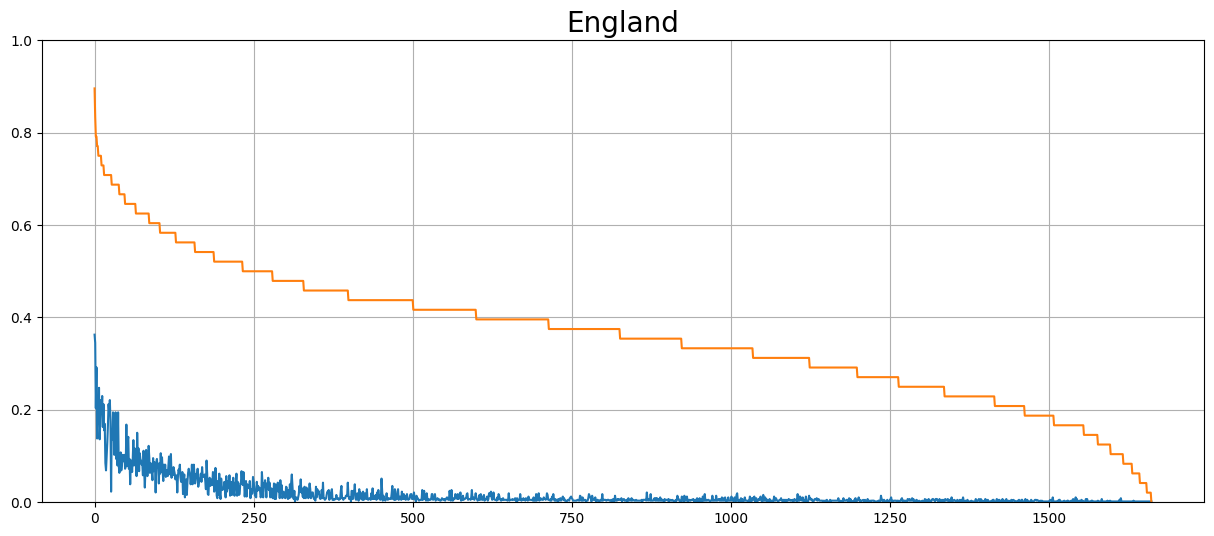

0.6954596629515974


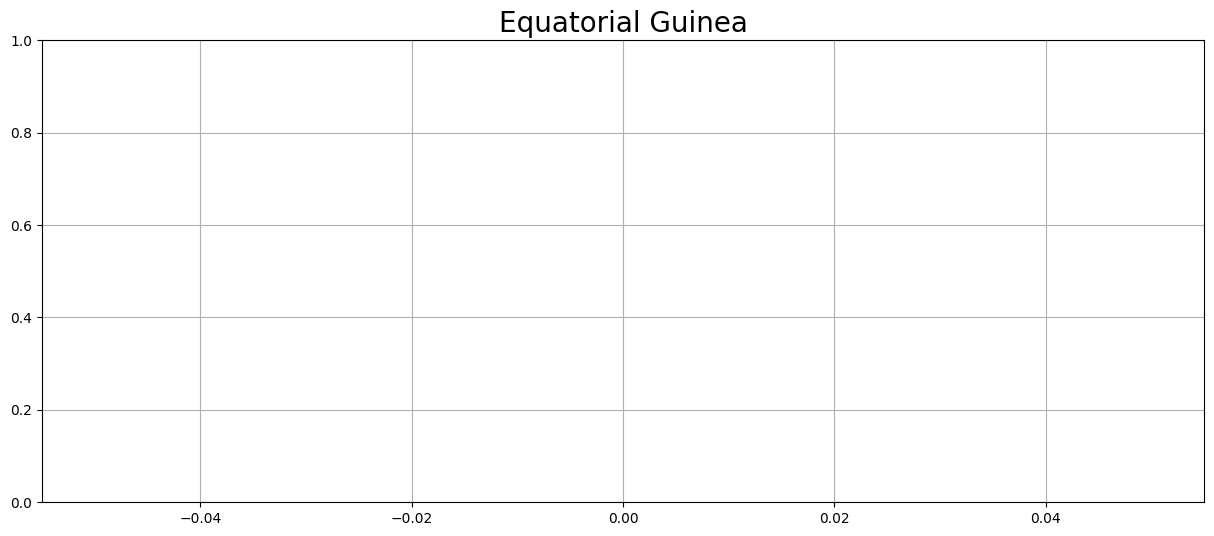

nan


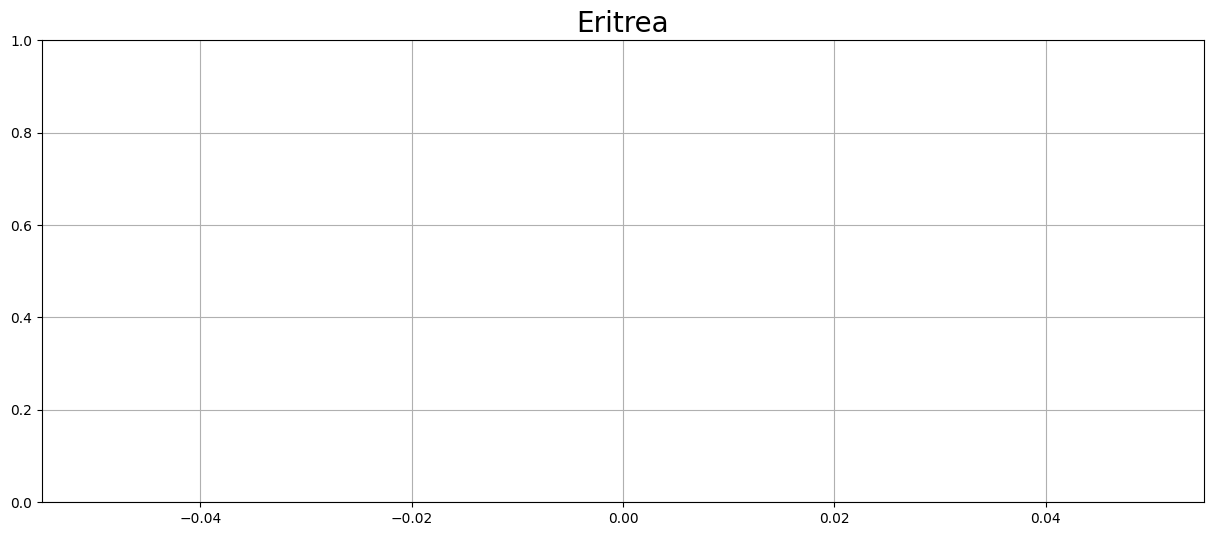

nan


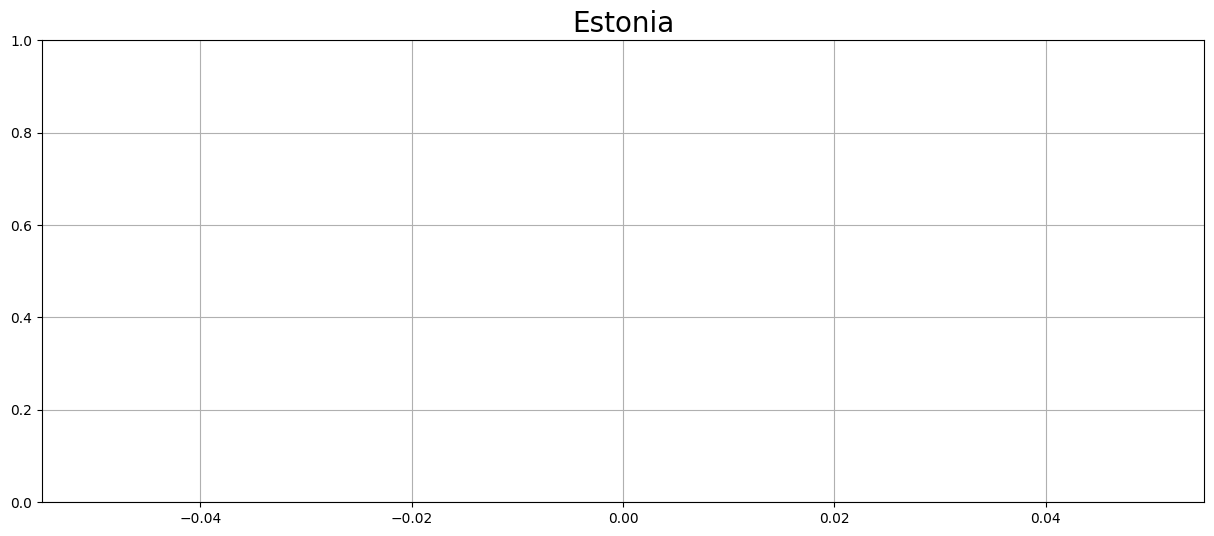

nan


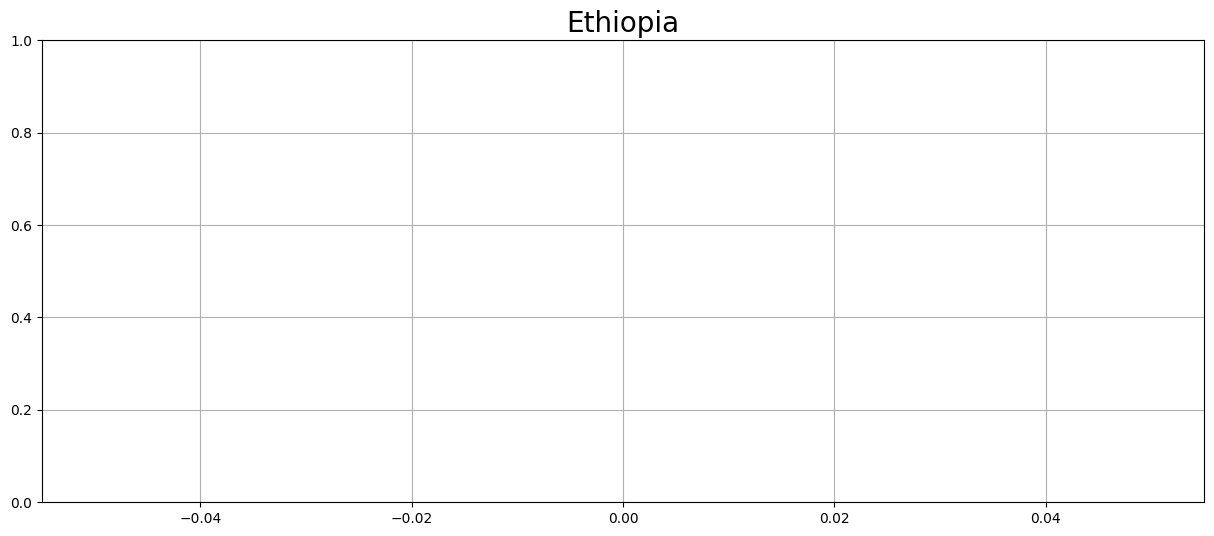

nan


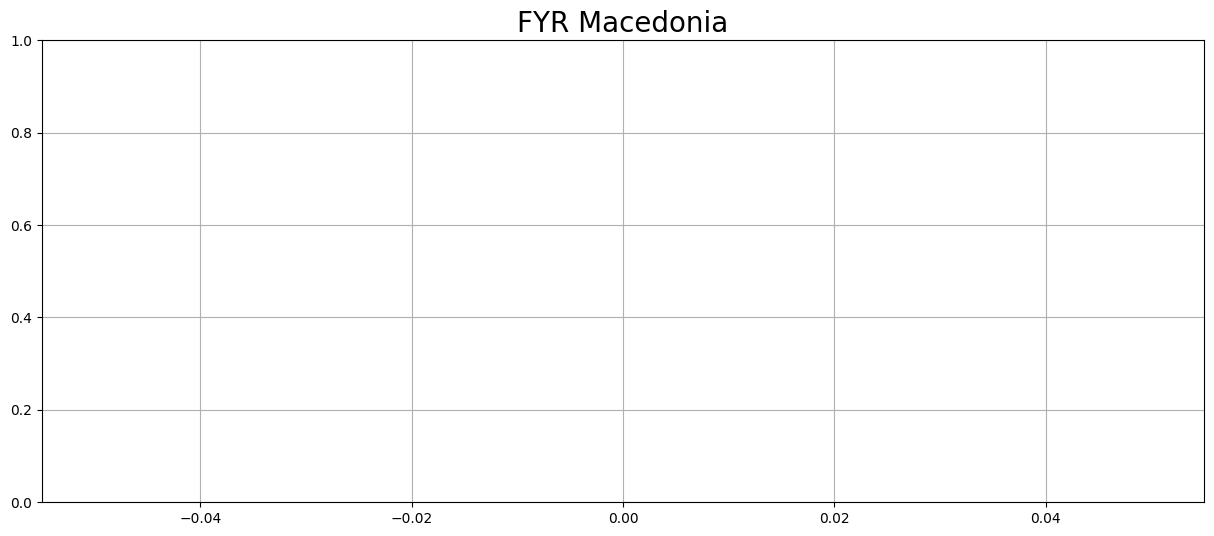

nan


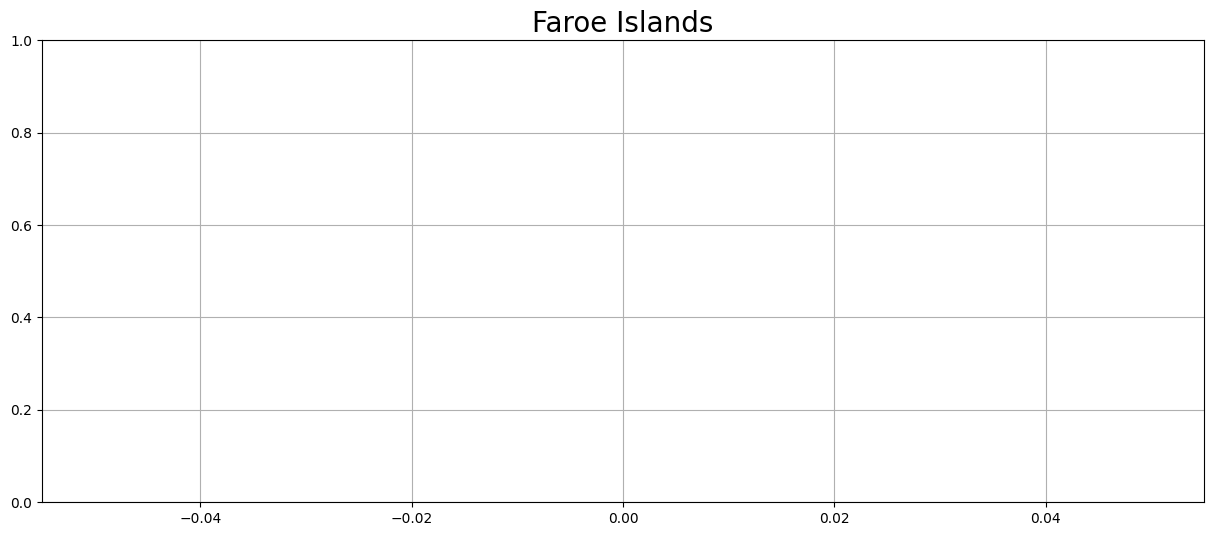

nan


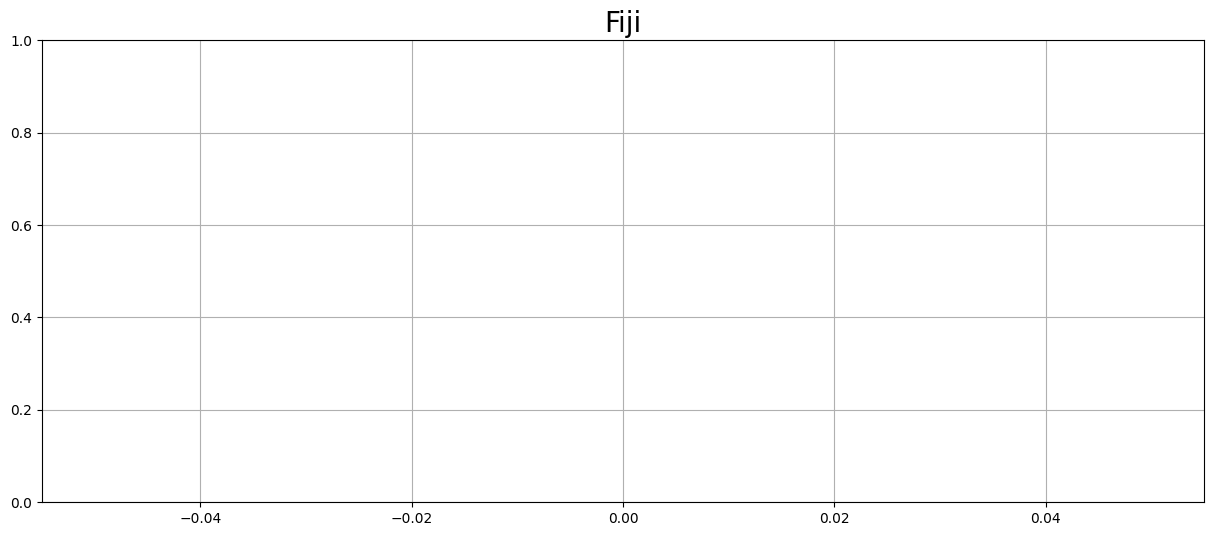

nan


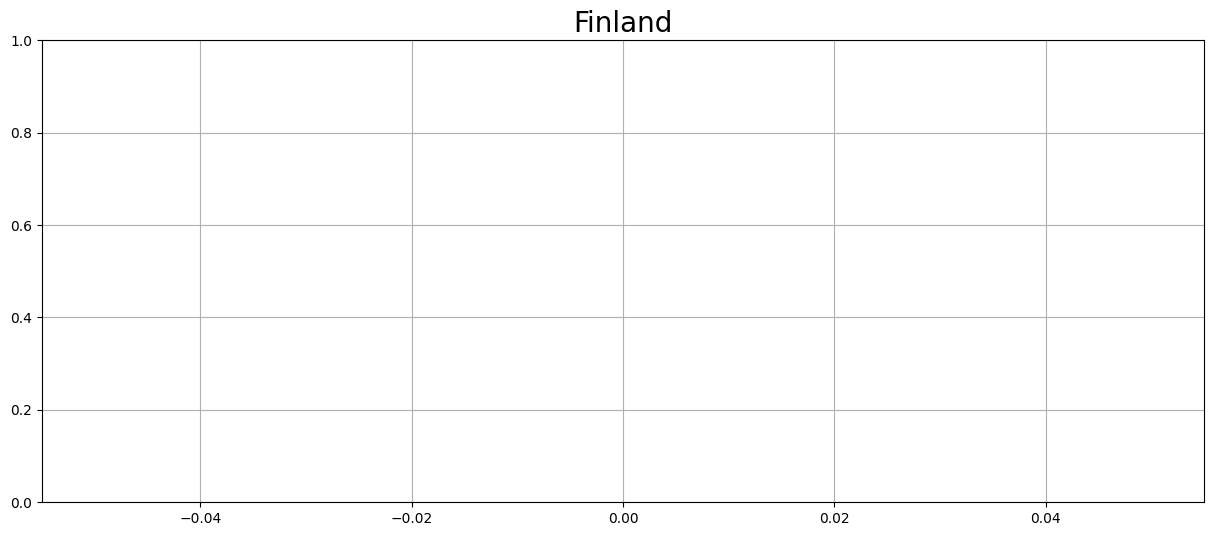

nan


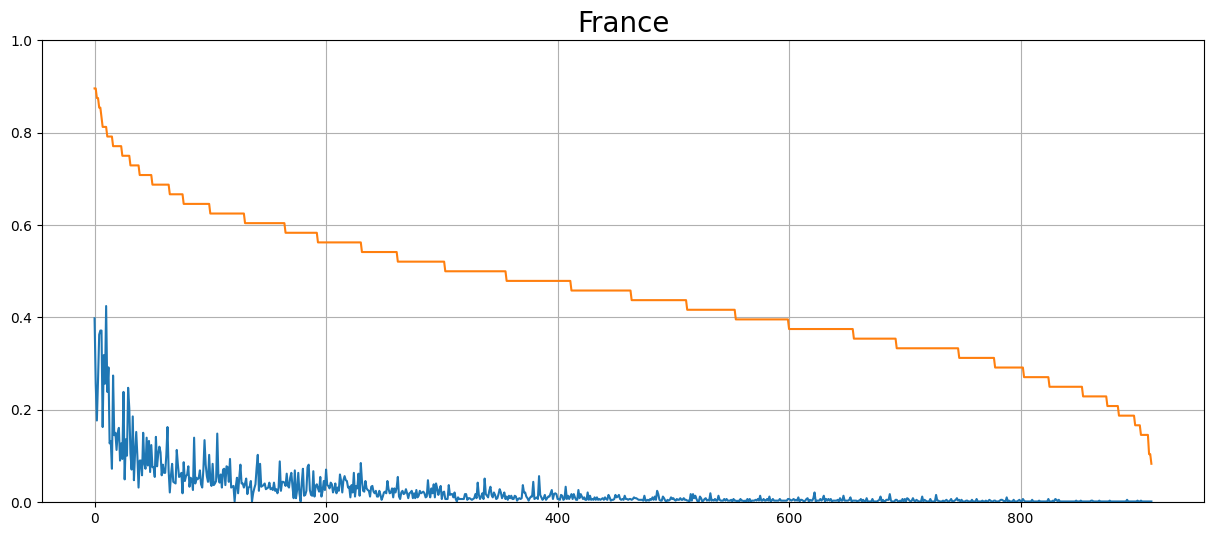

0.6891521621566604


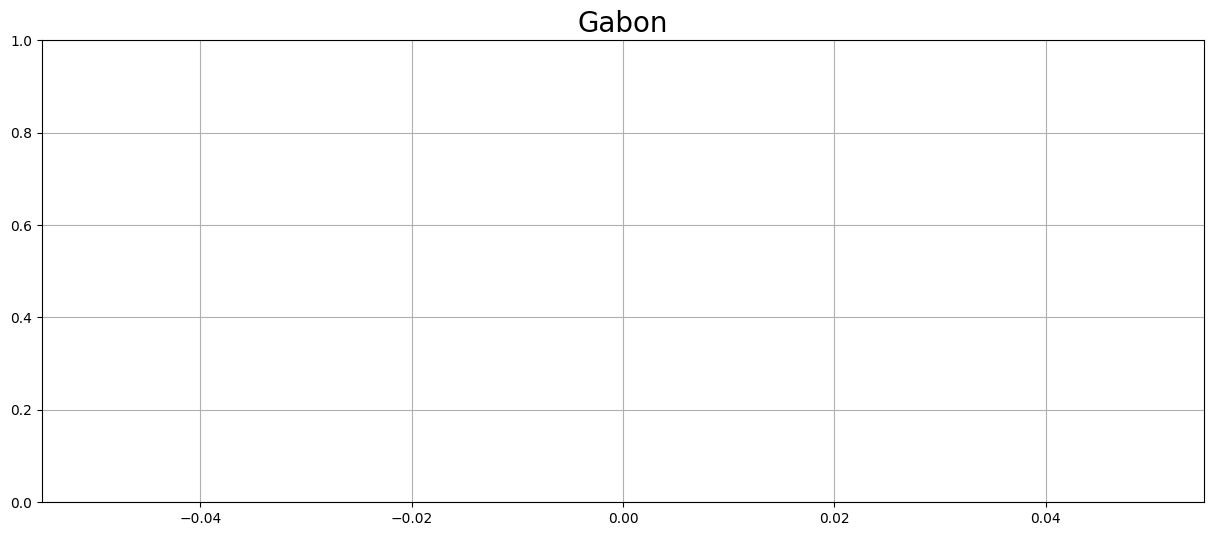

nan


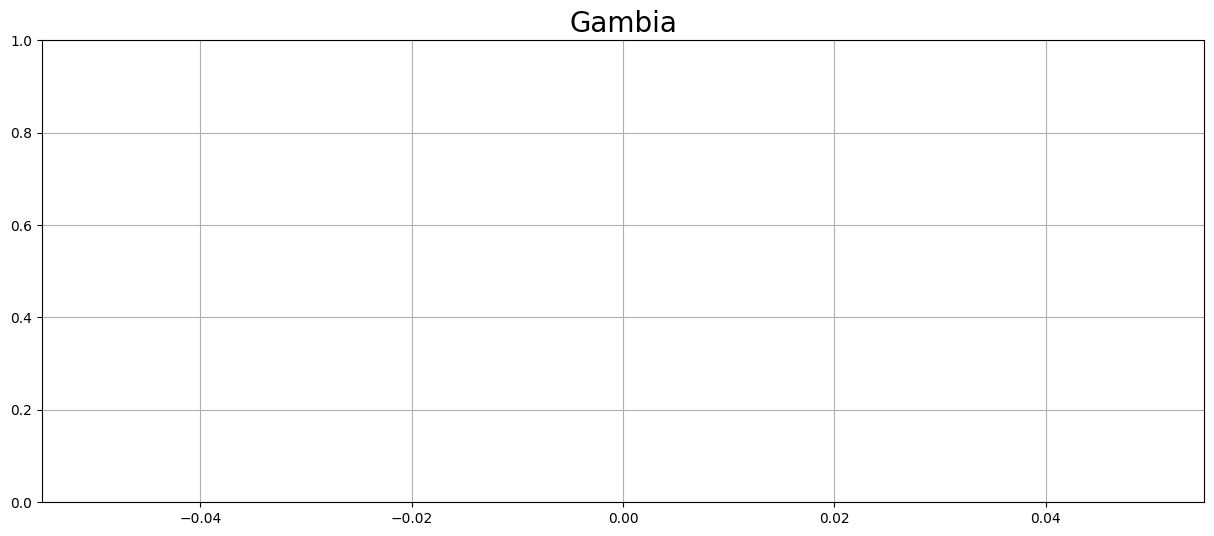

nan


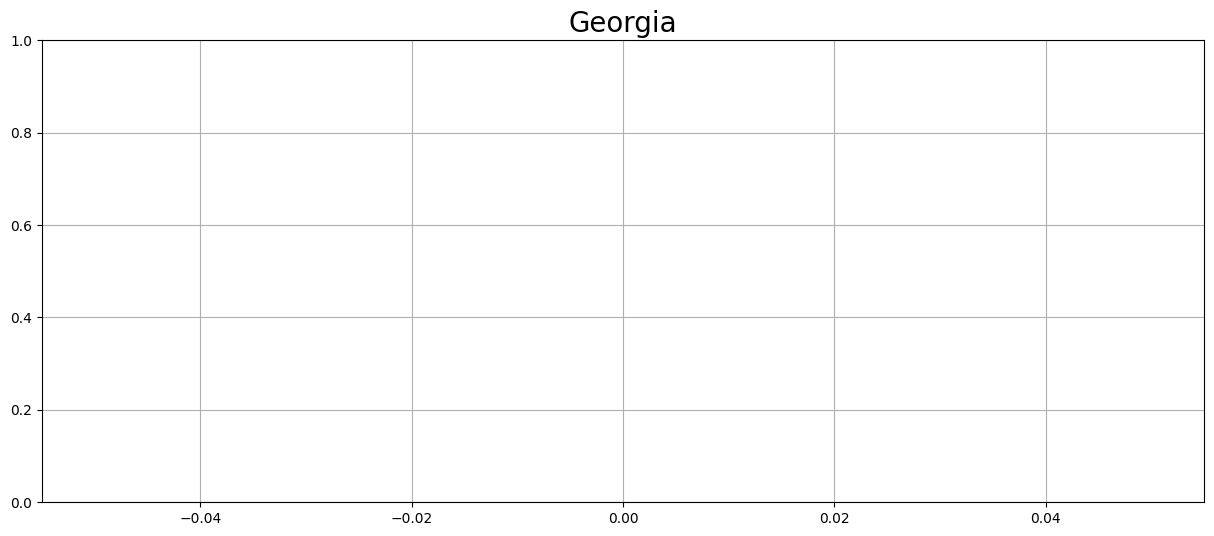

nan


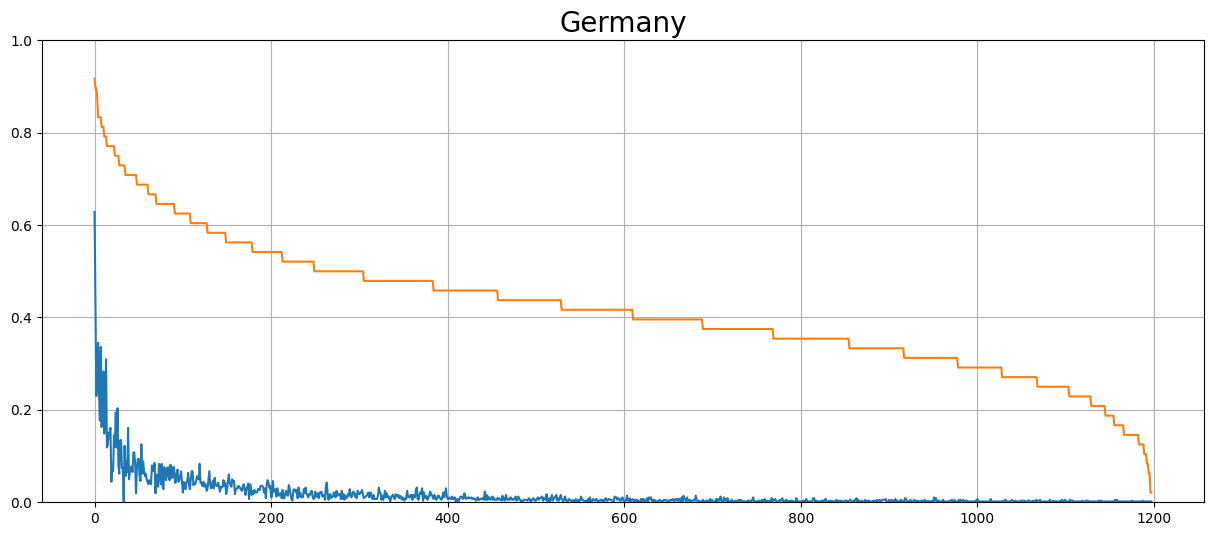

0.6563001212379225


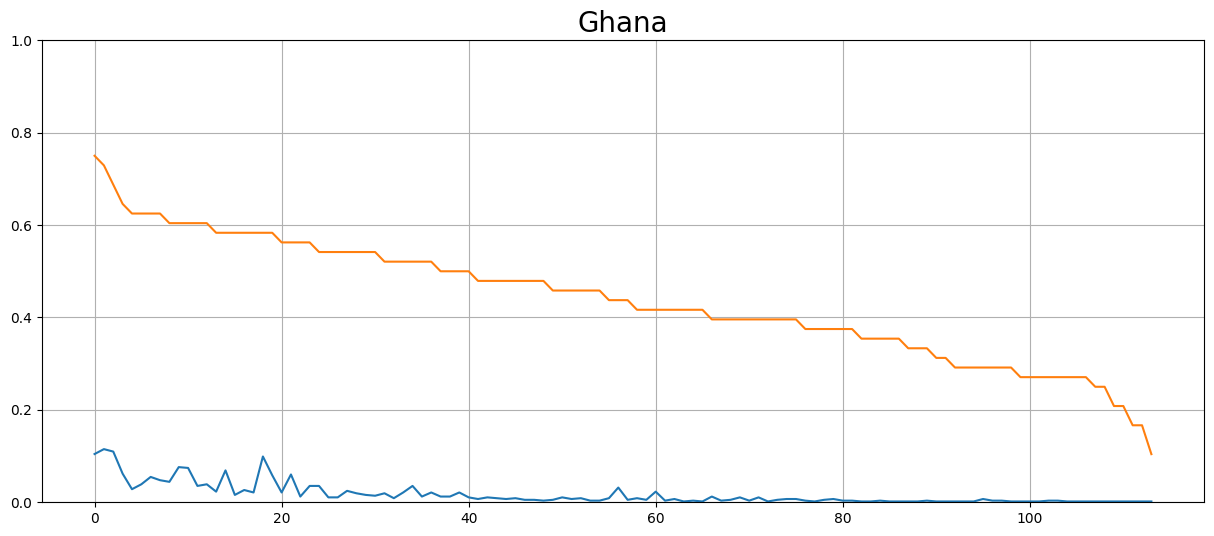

0.7294366059145876


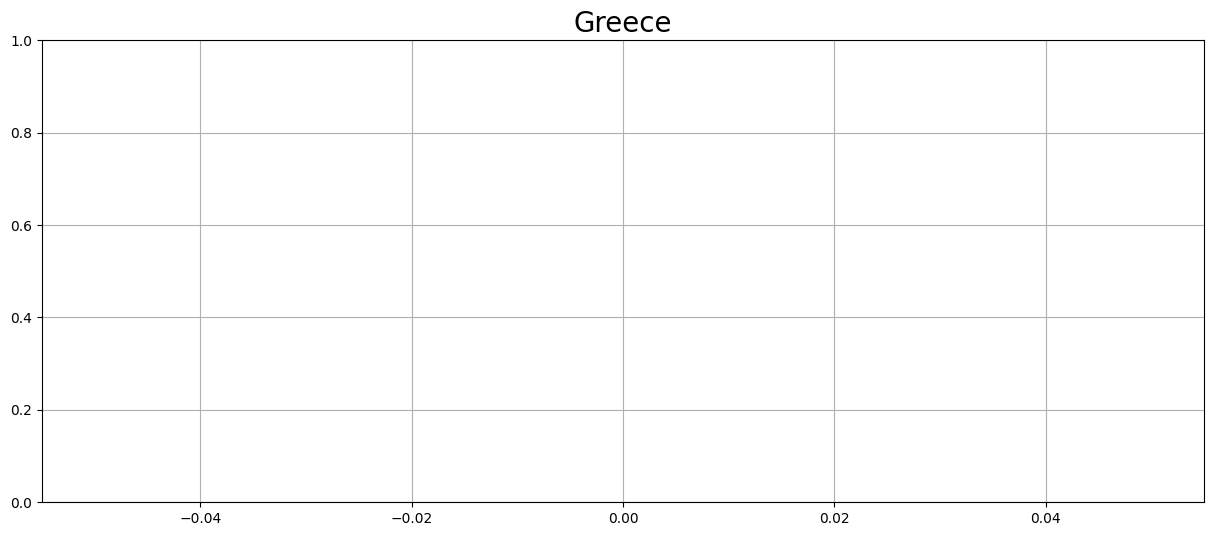

nan


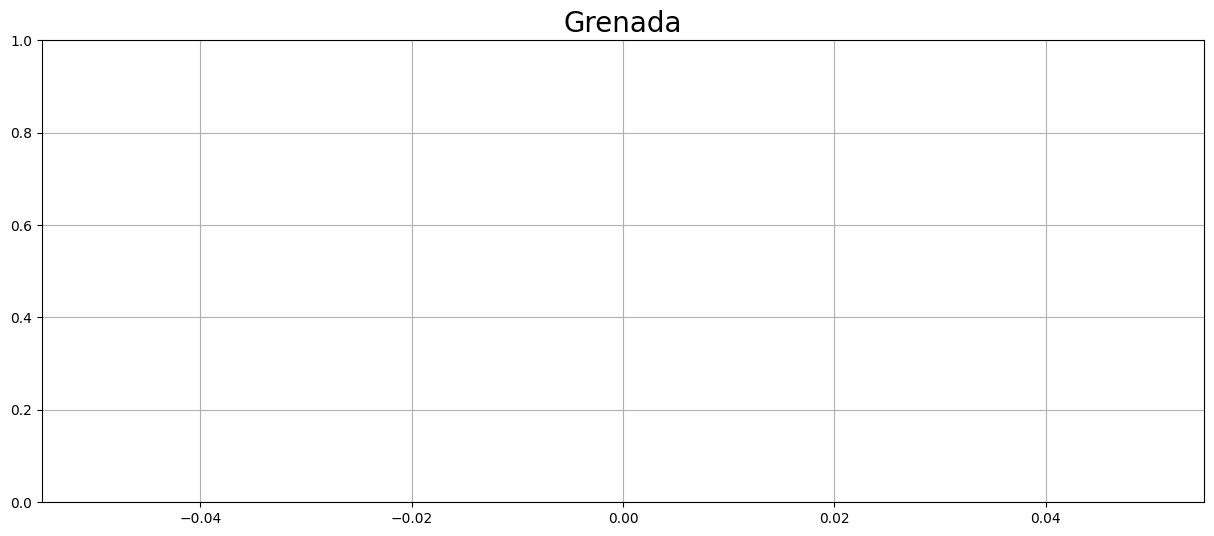

nan


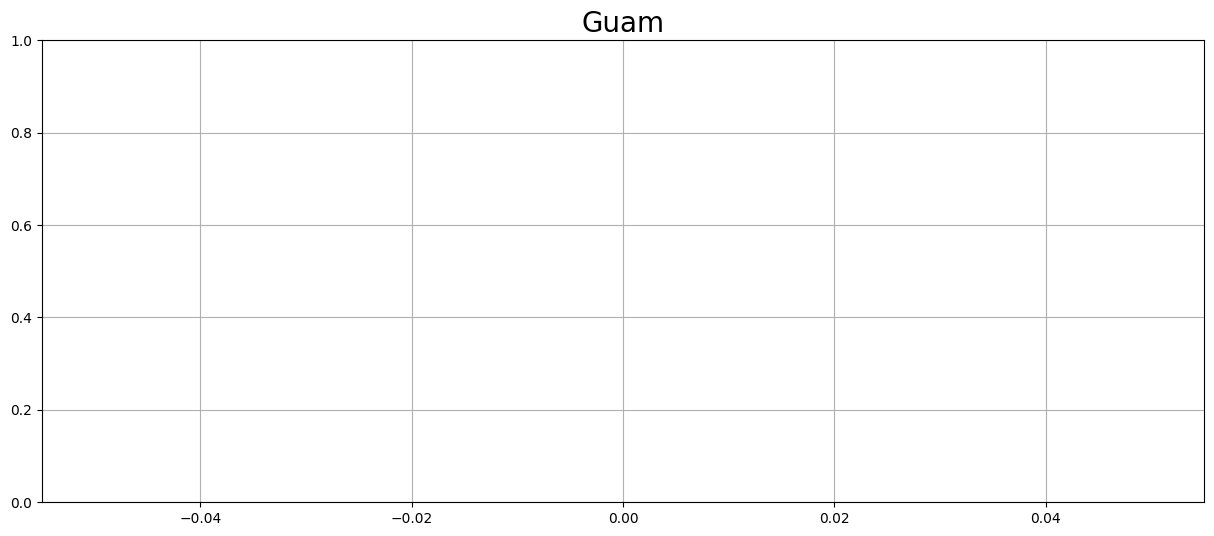

nan


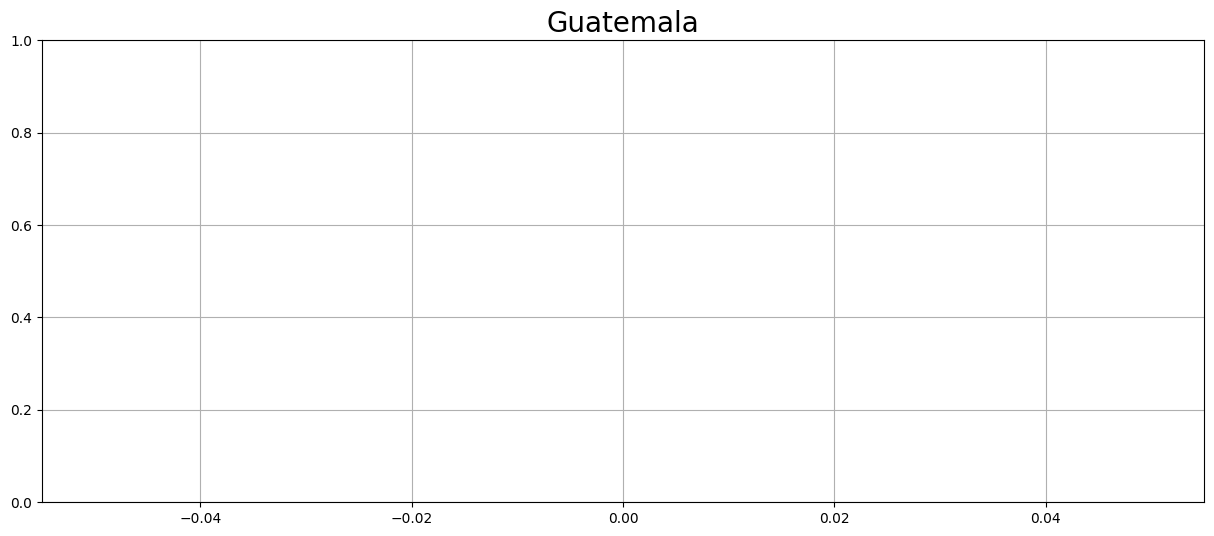

nan


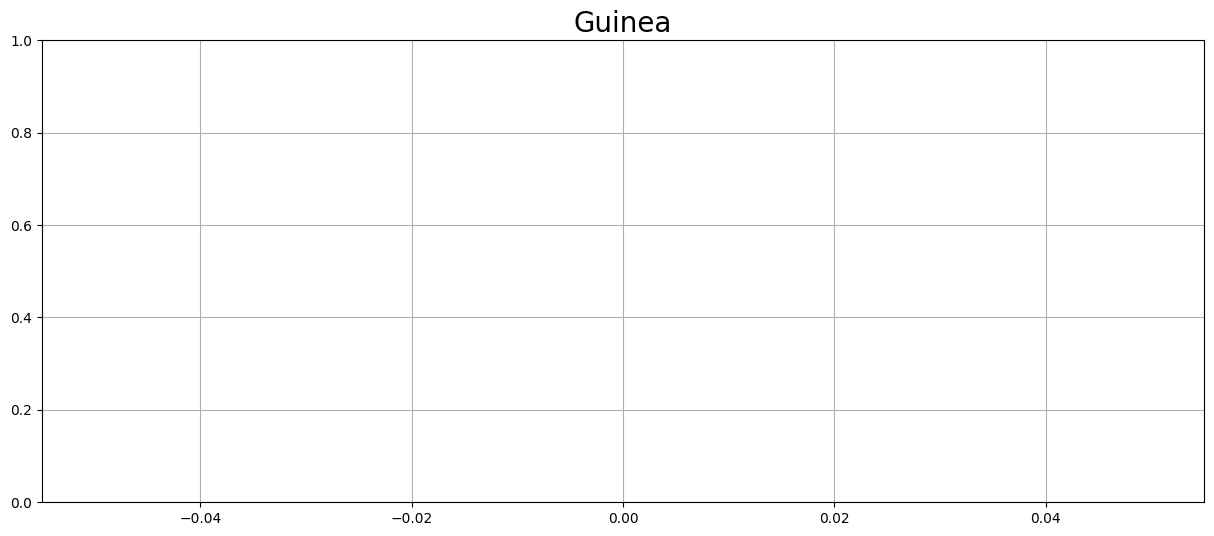

nan


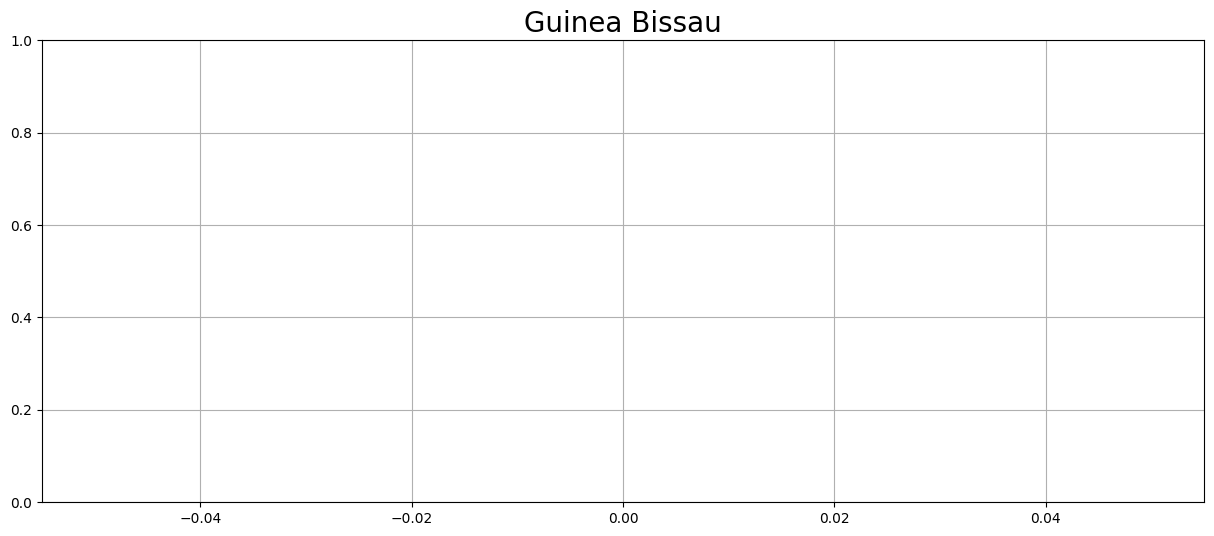

nan


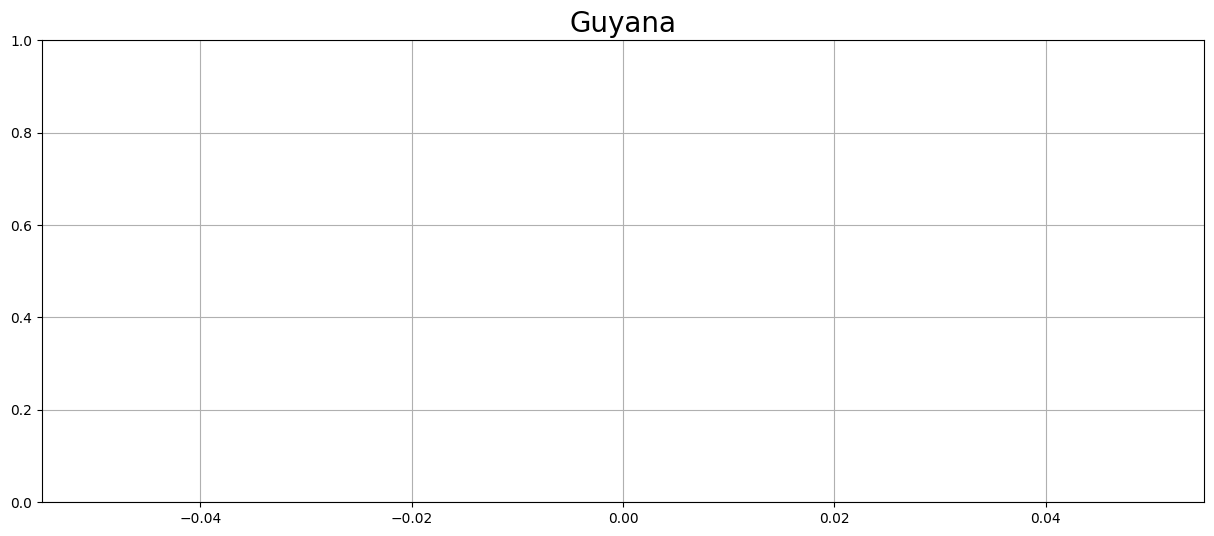

nan


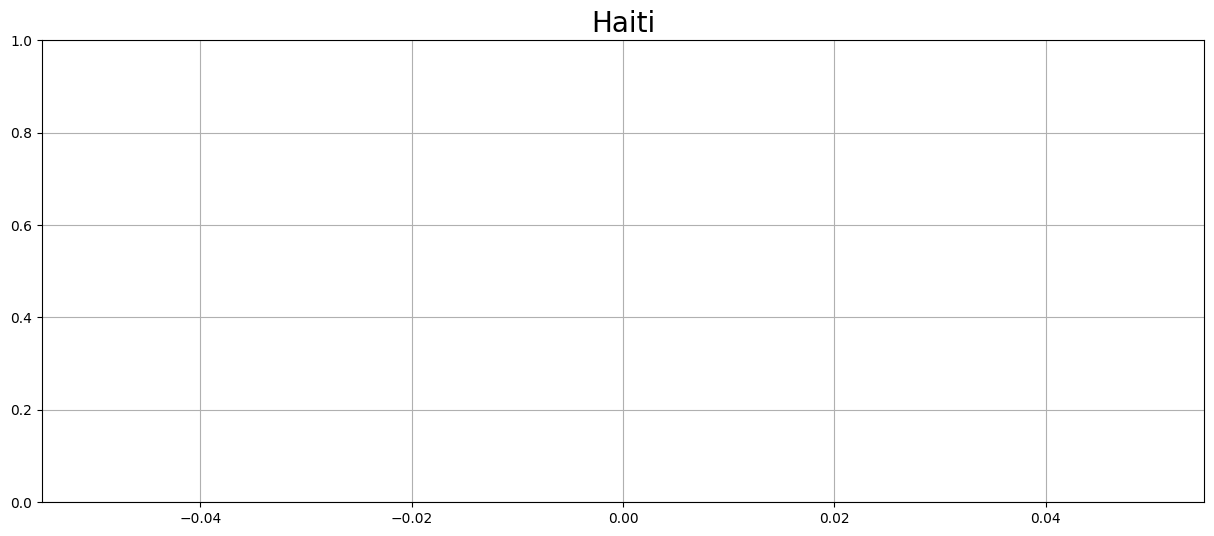

nan


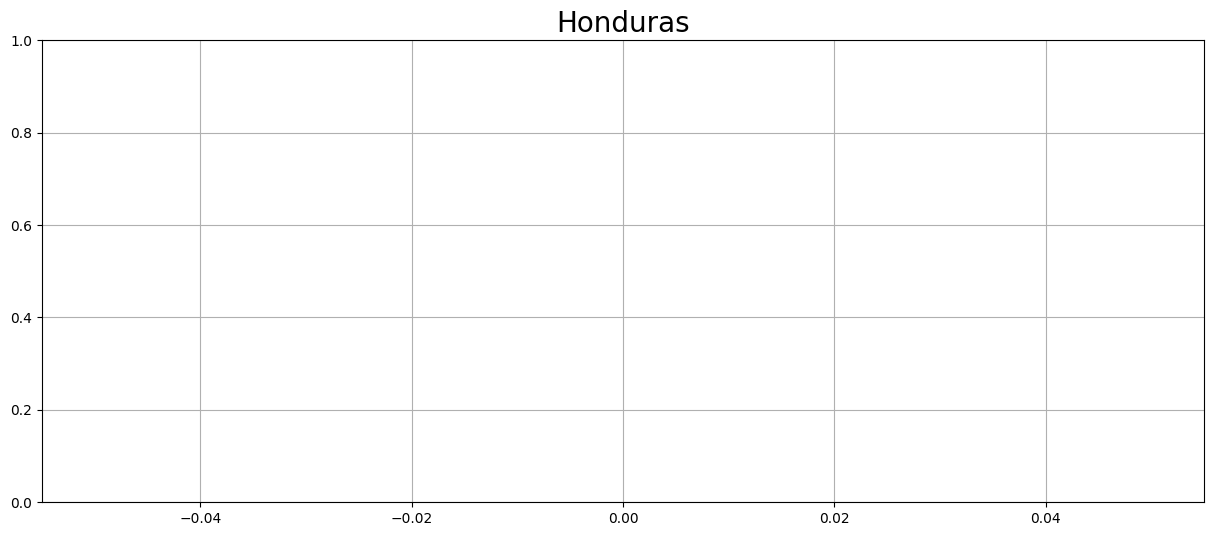

nan


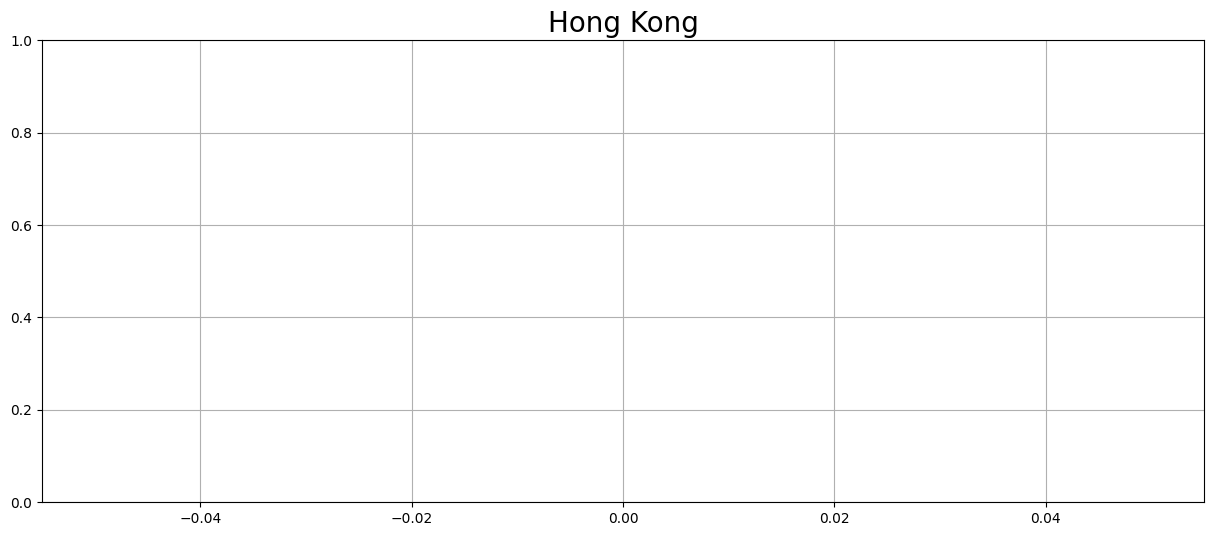

nan


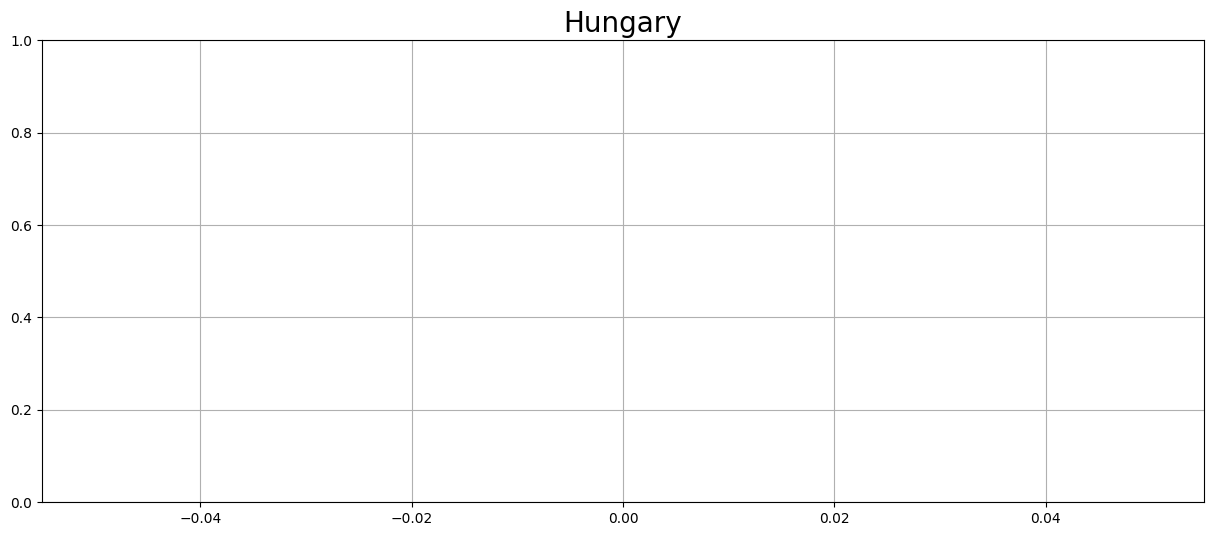

nan


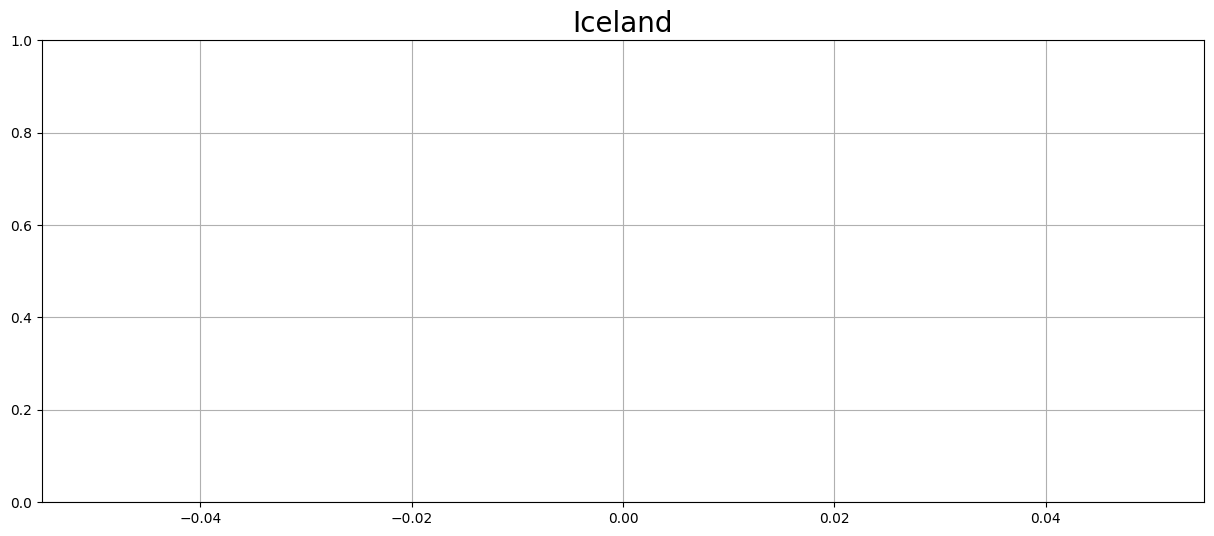

nan


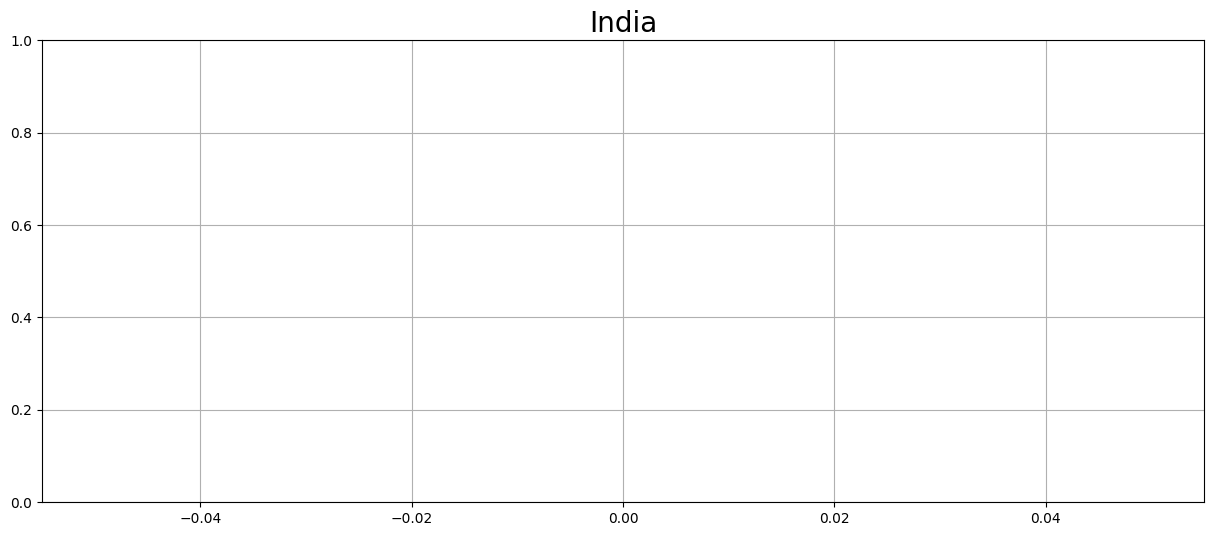

nan


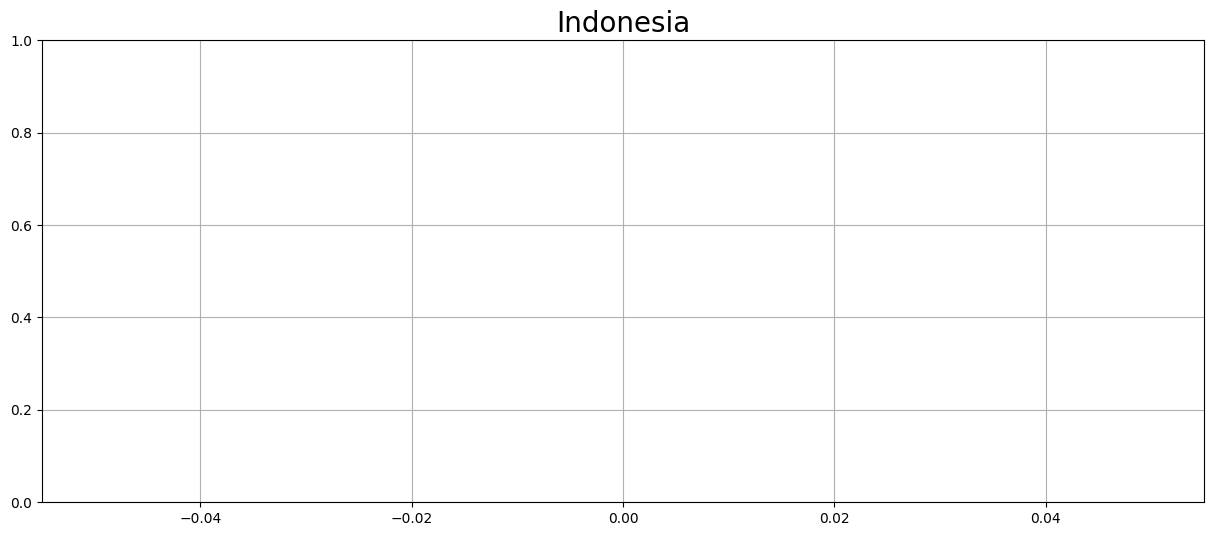

nan


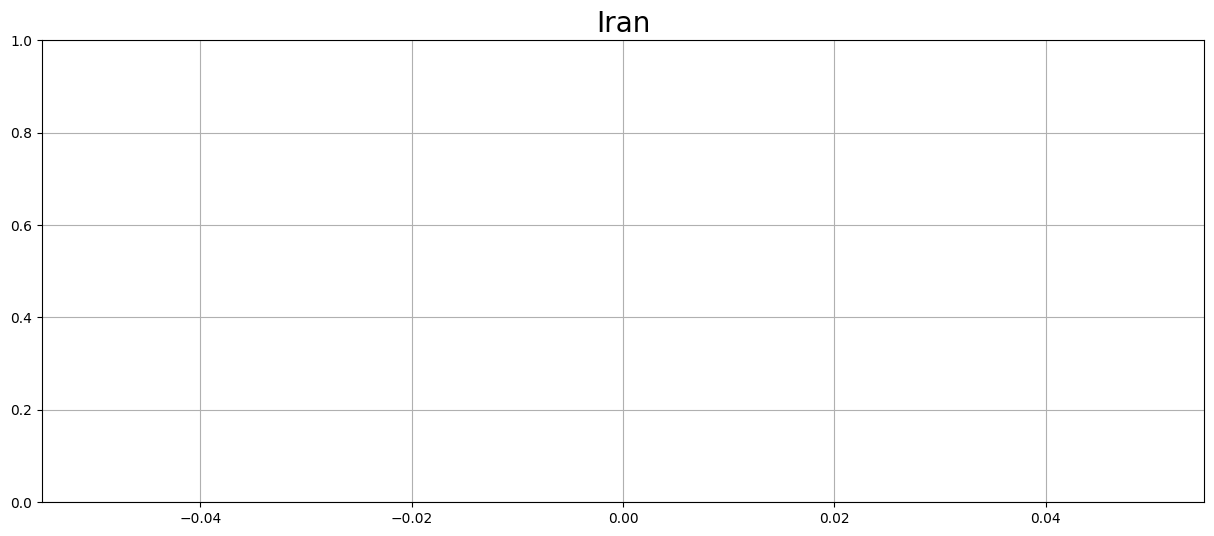

nan


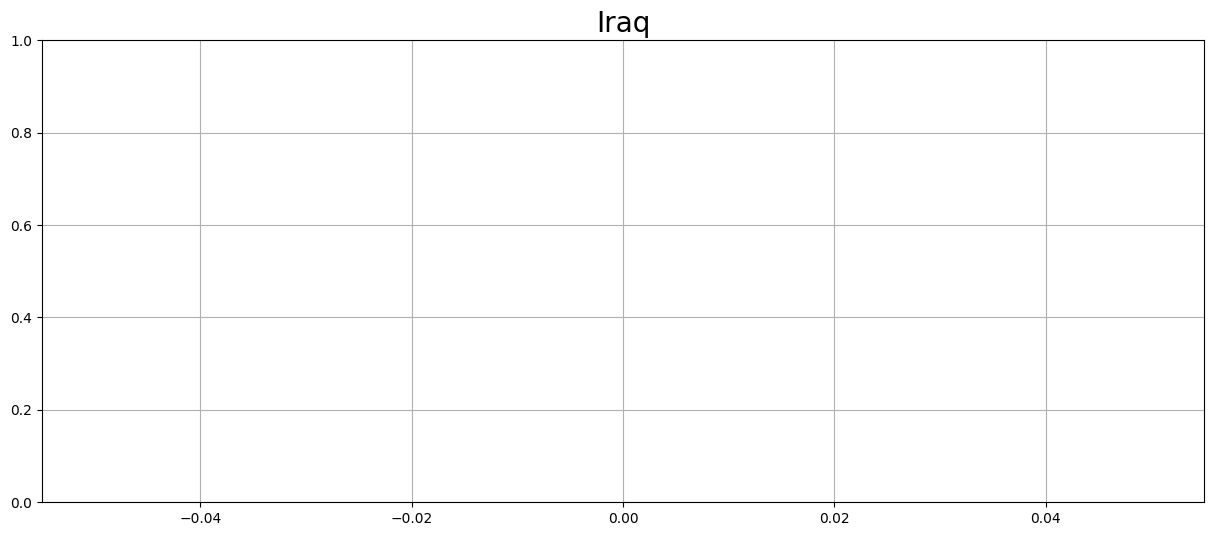

nan


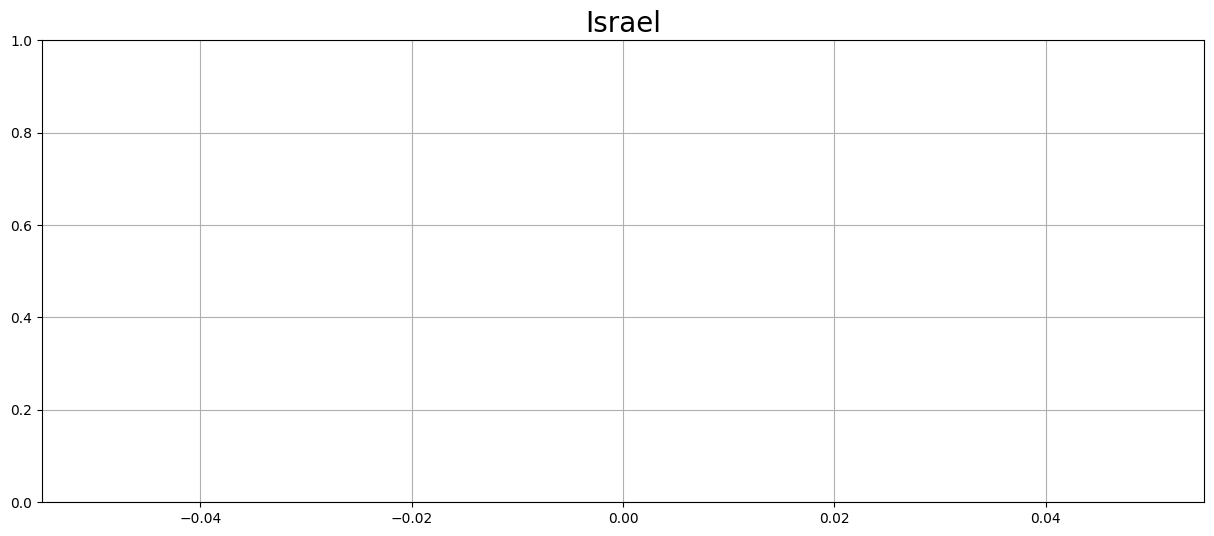

nan


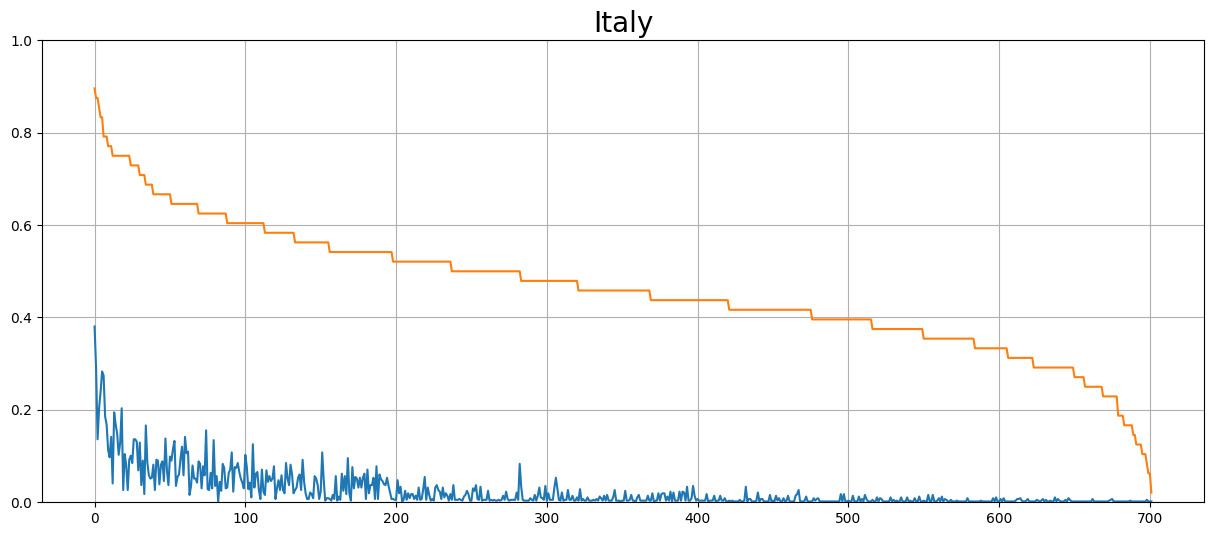

0.6944625055977853


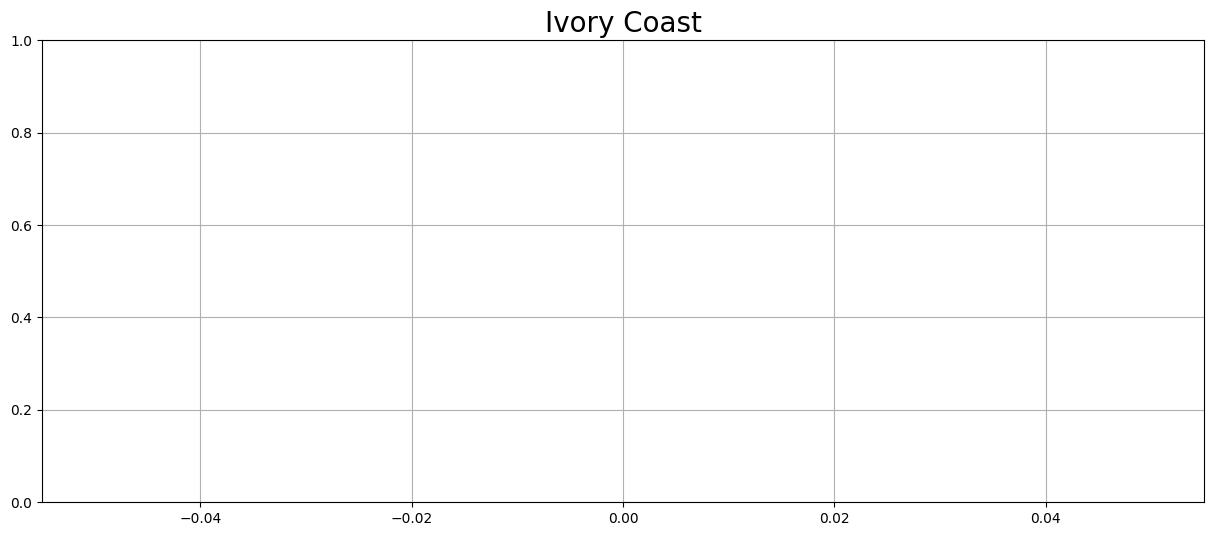

nan


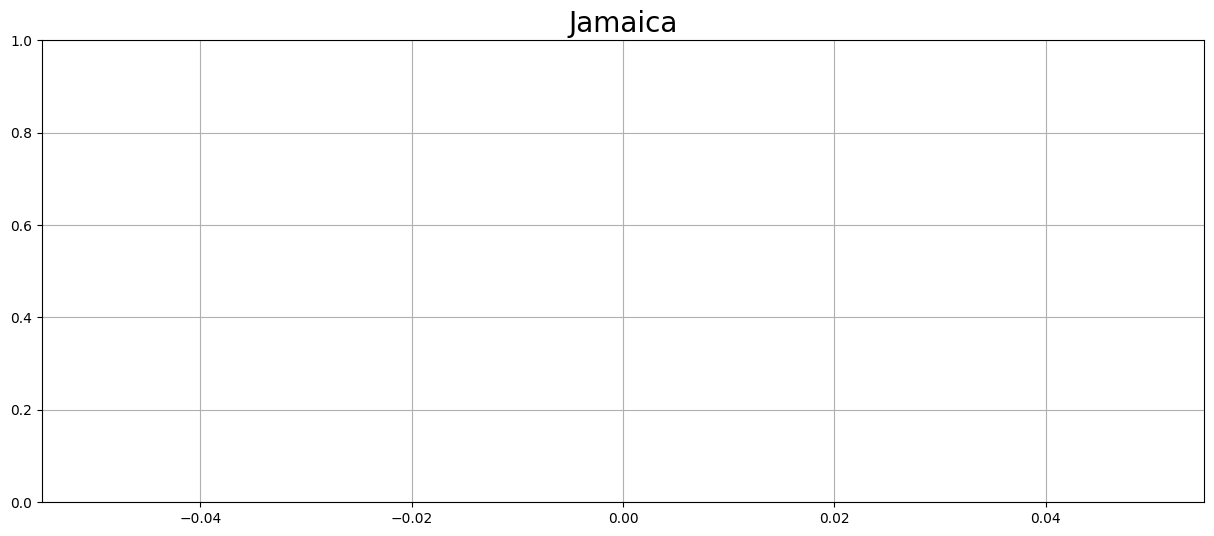

nan


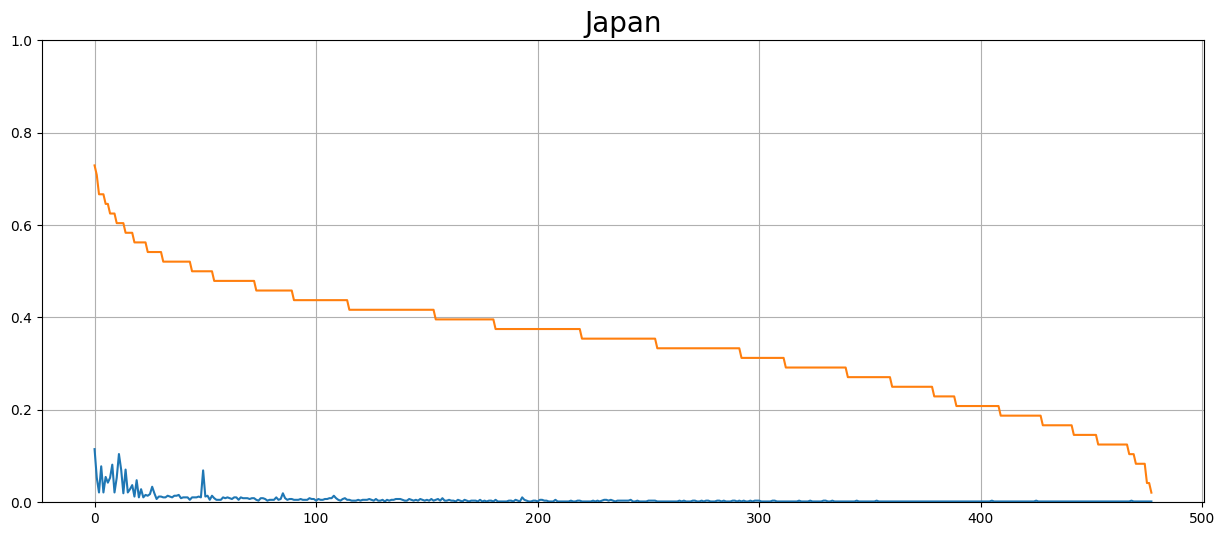

0.5703689389254548


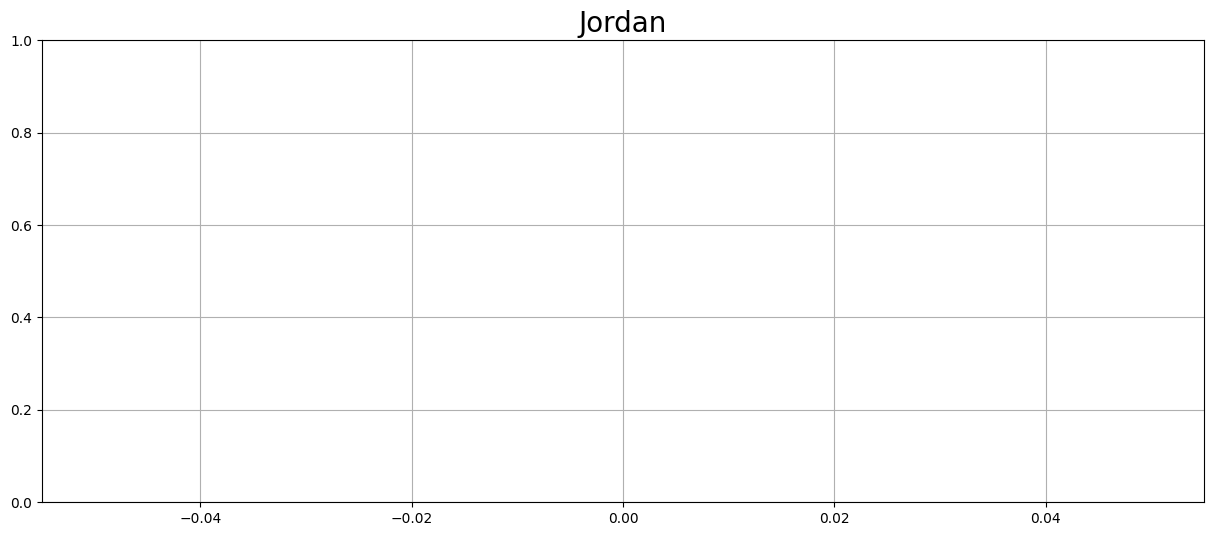

nan


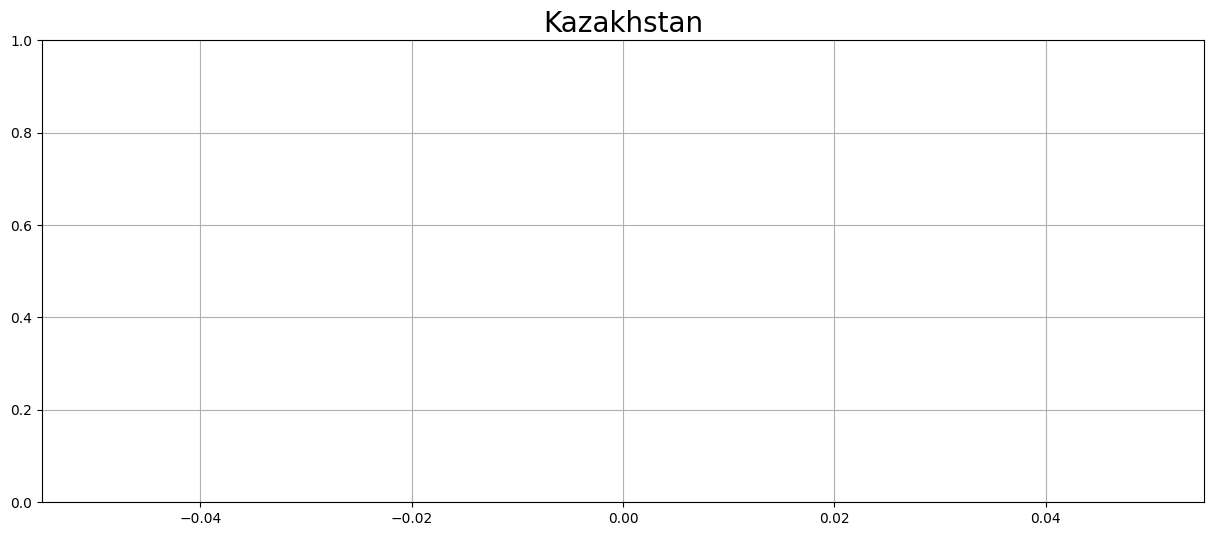

nan


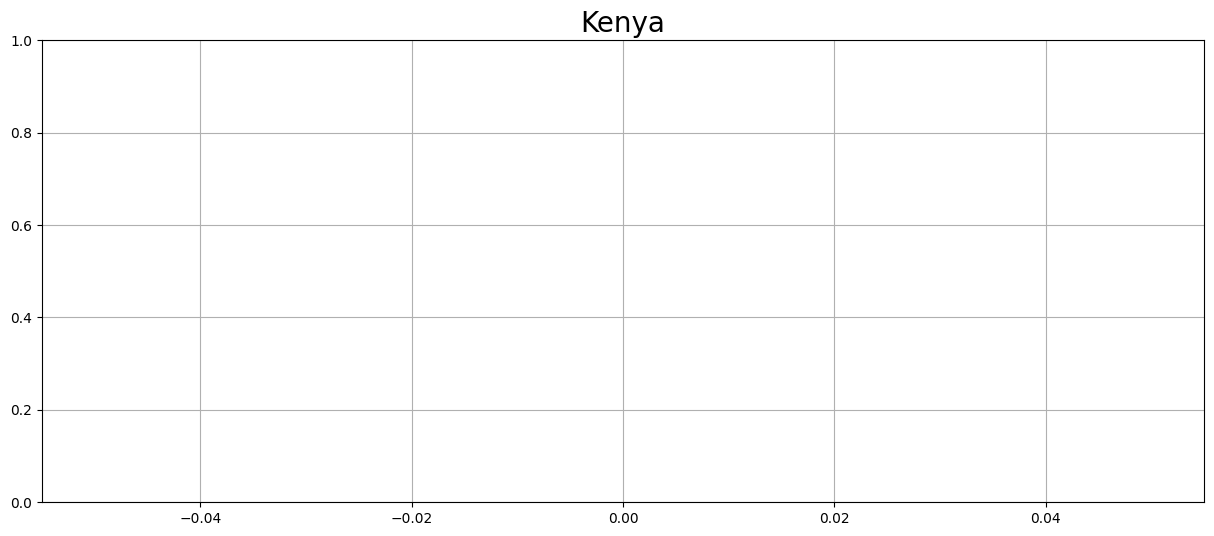

nan


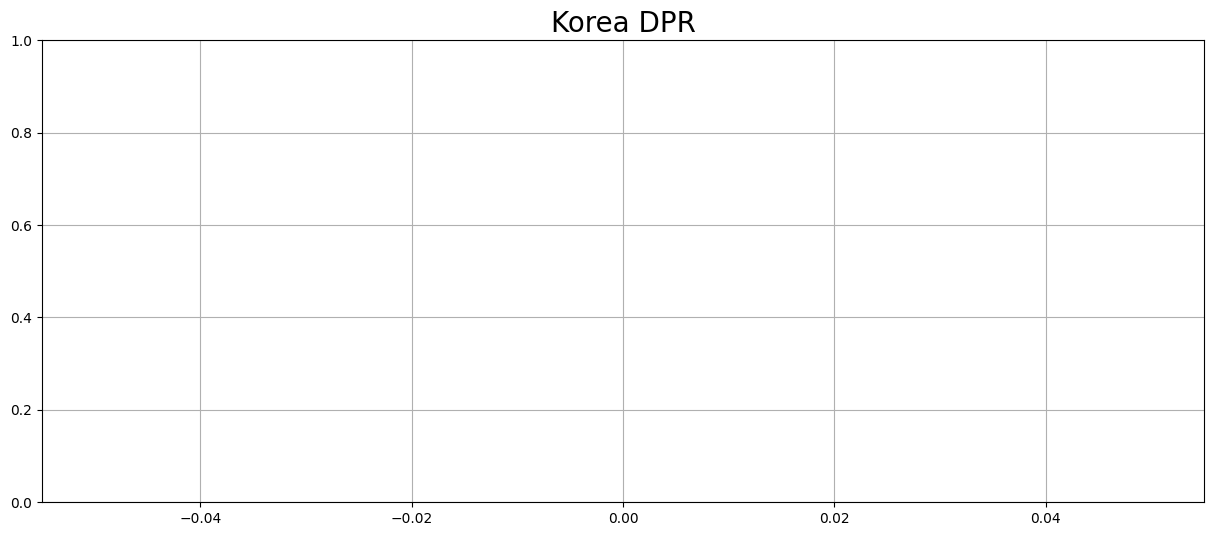

nan


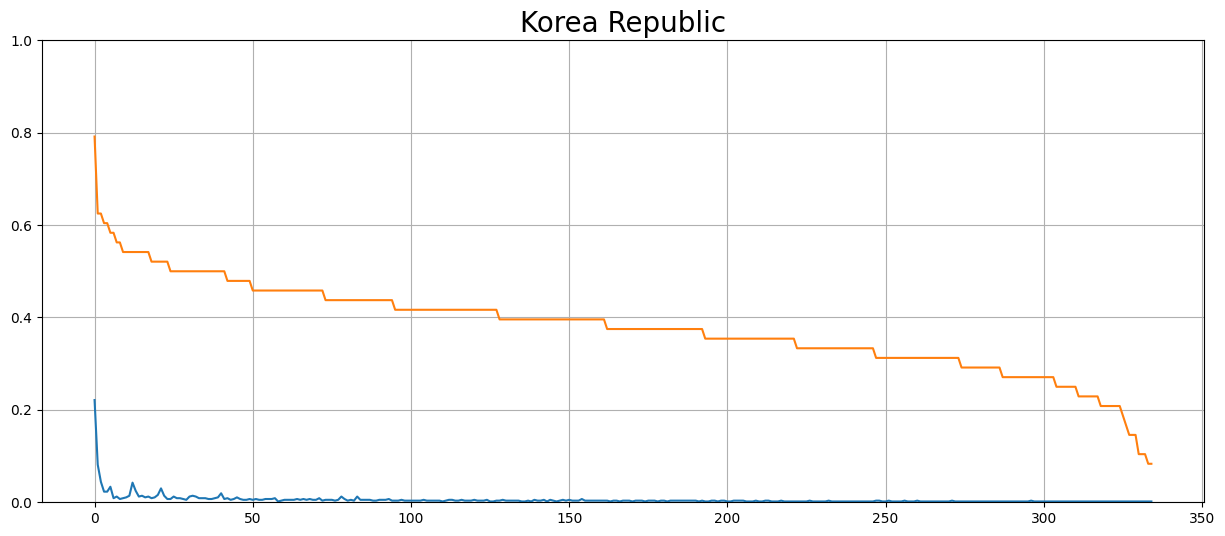

0.4792749355120628


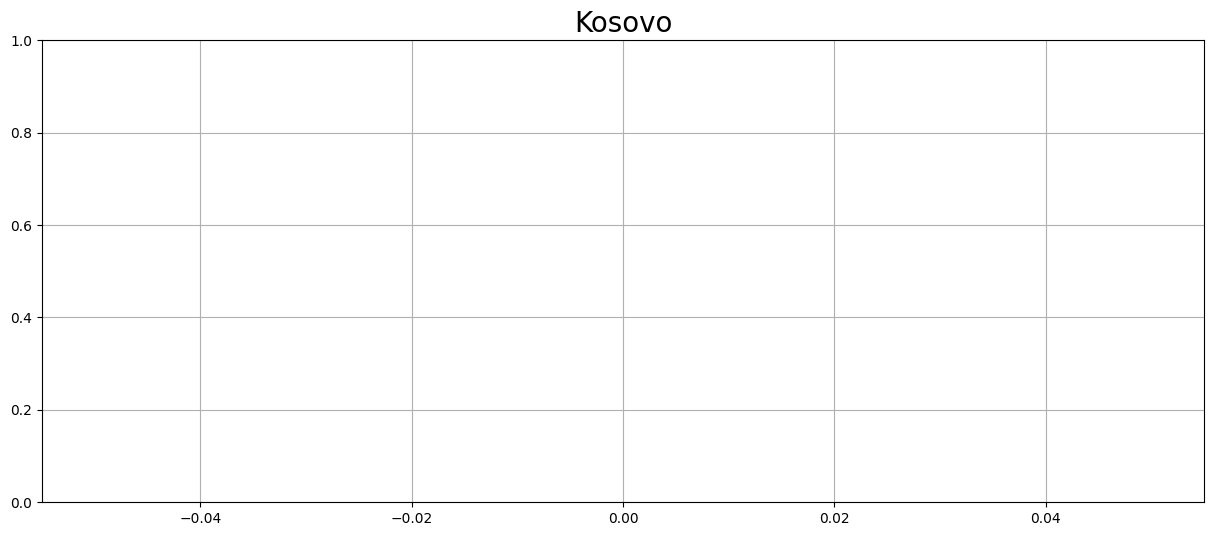

nan


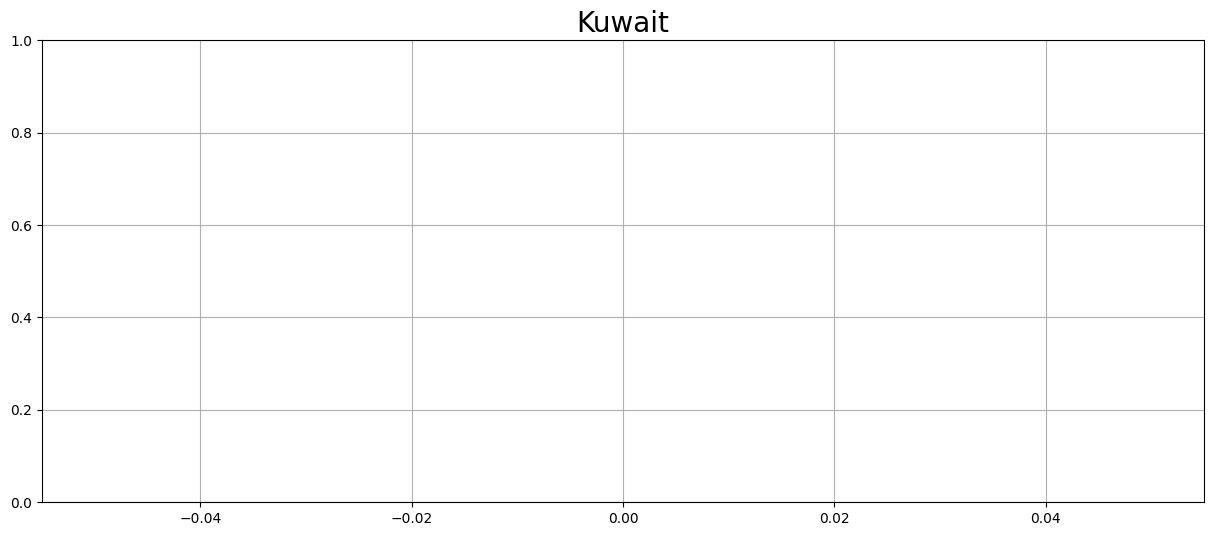

nan


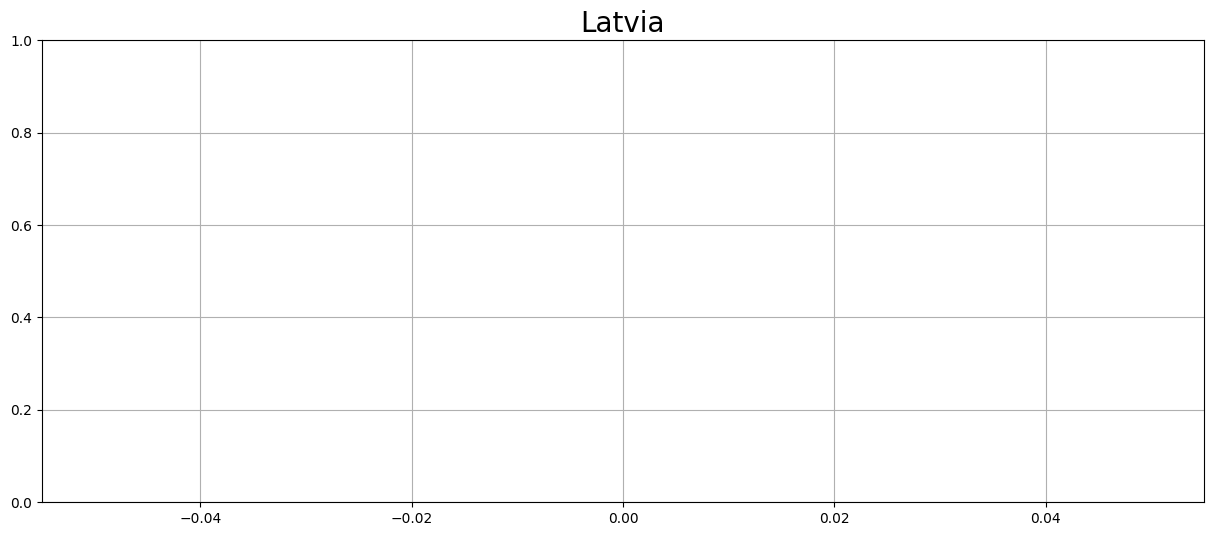

nan


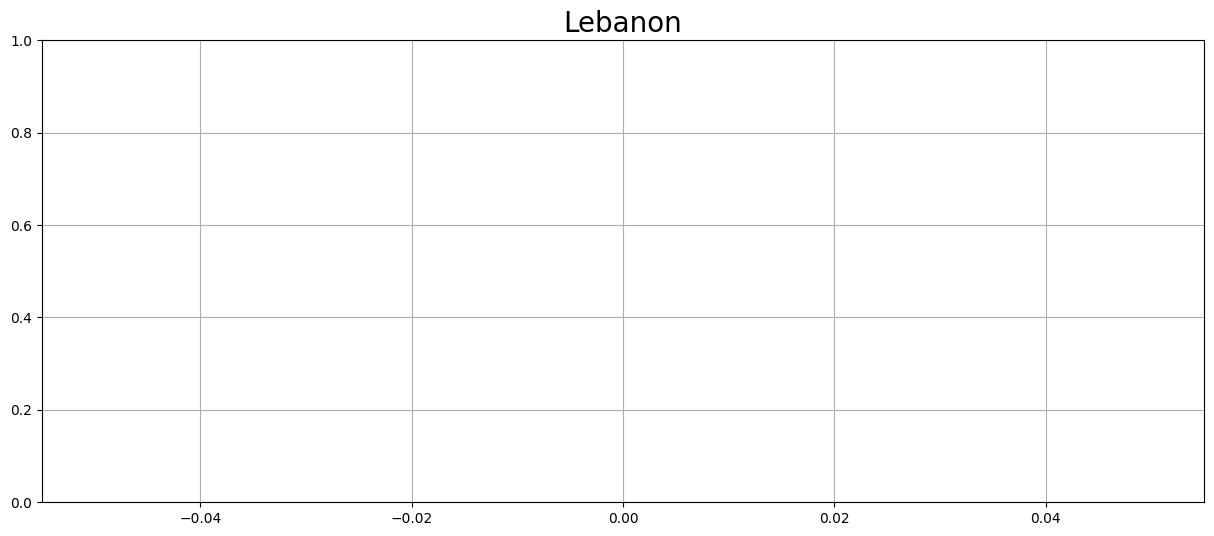

nan


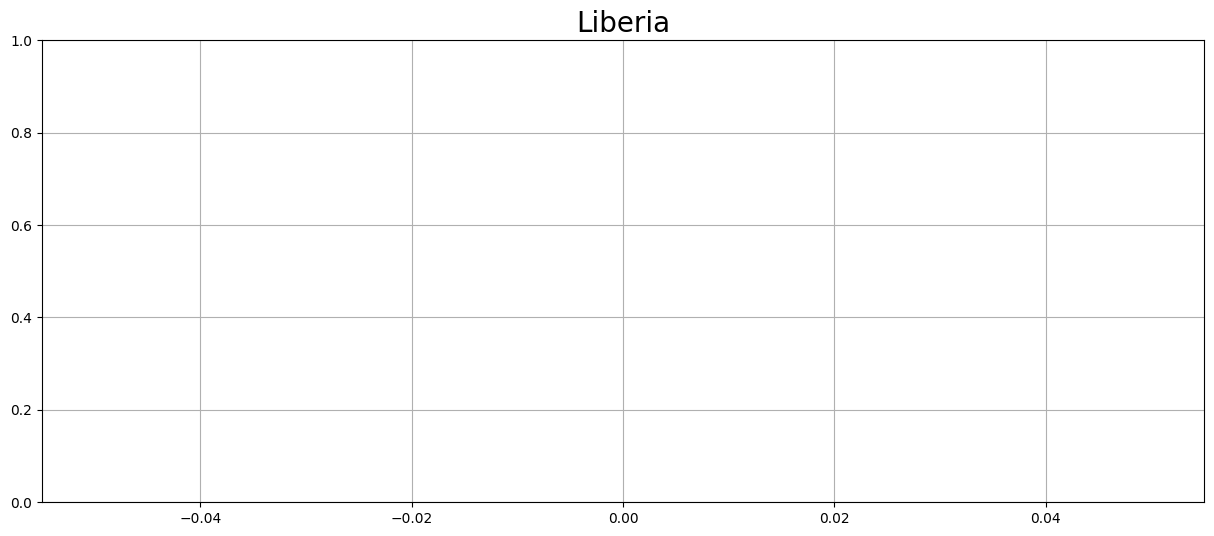

nan


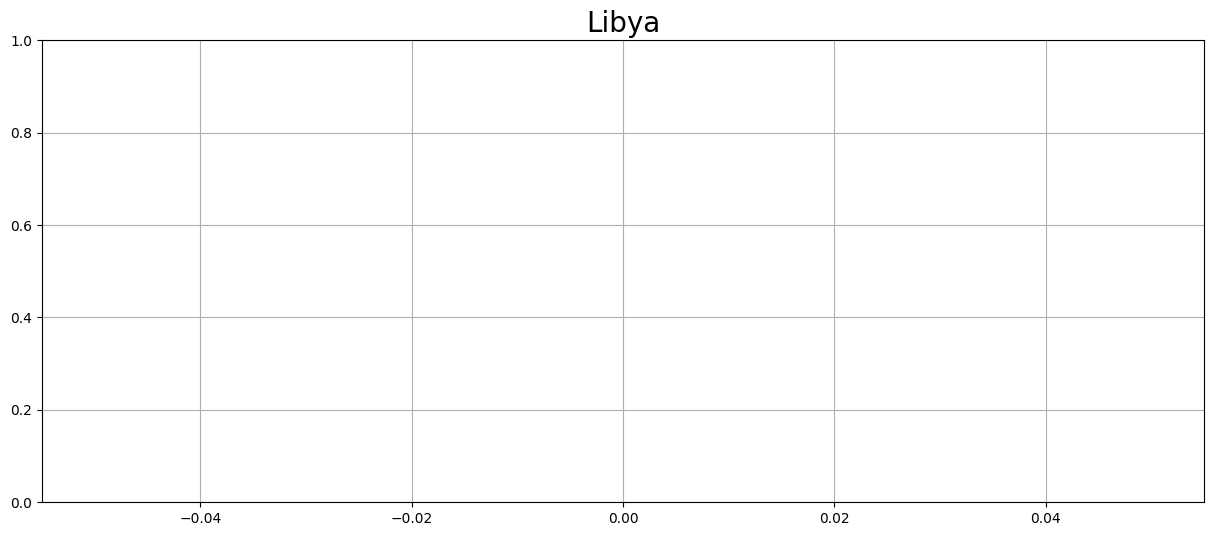

nan


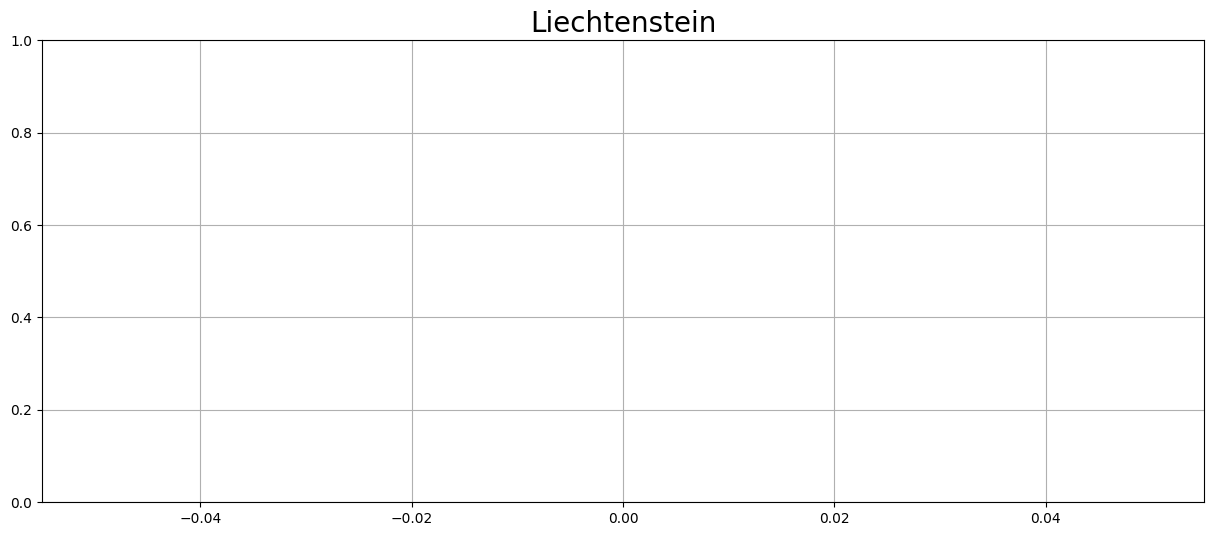

nan


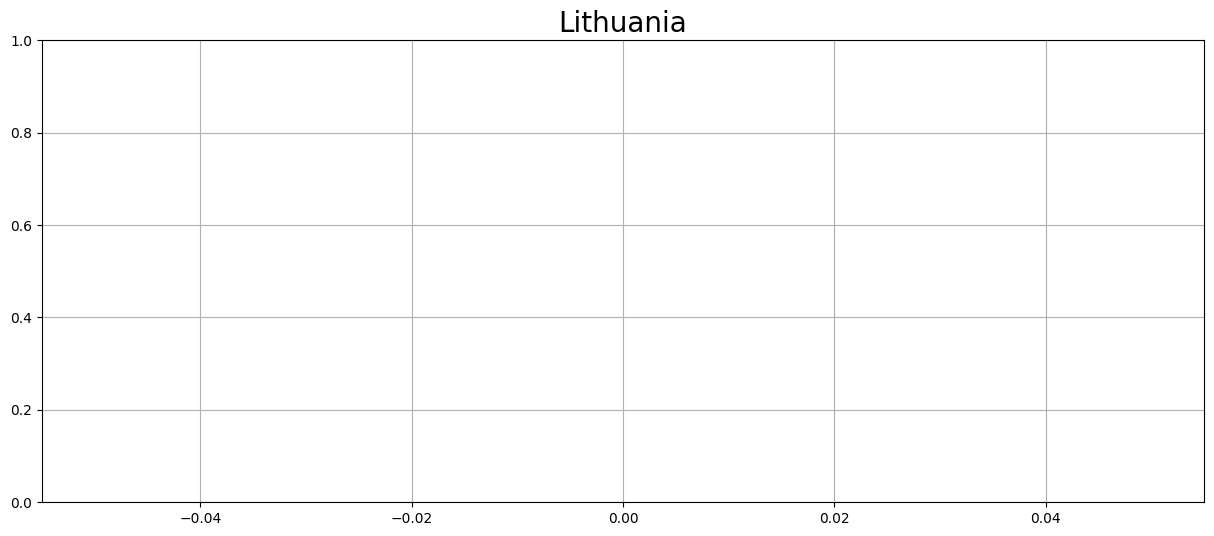

nan


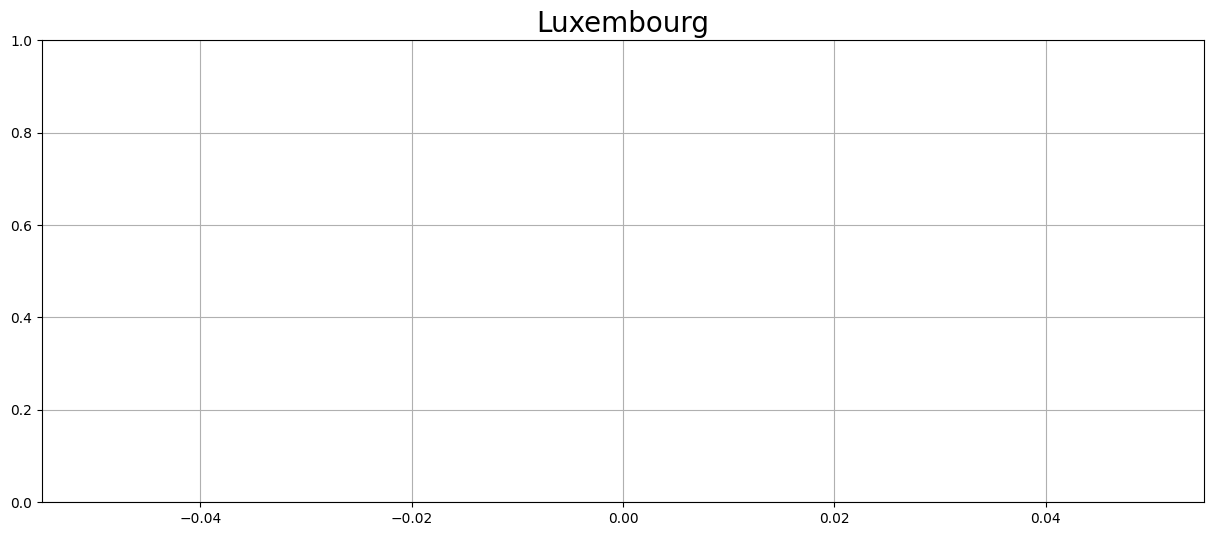

nan


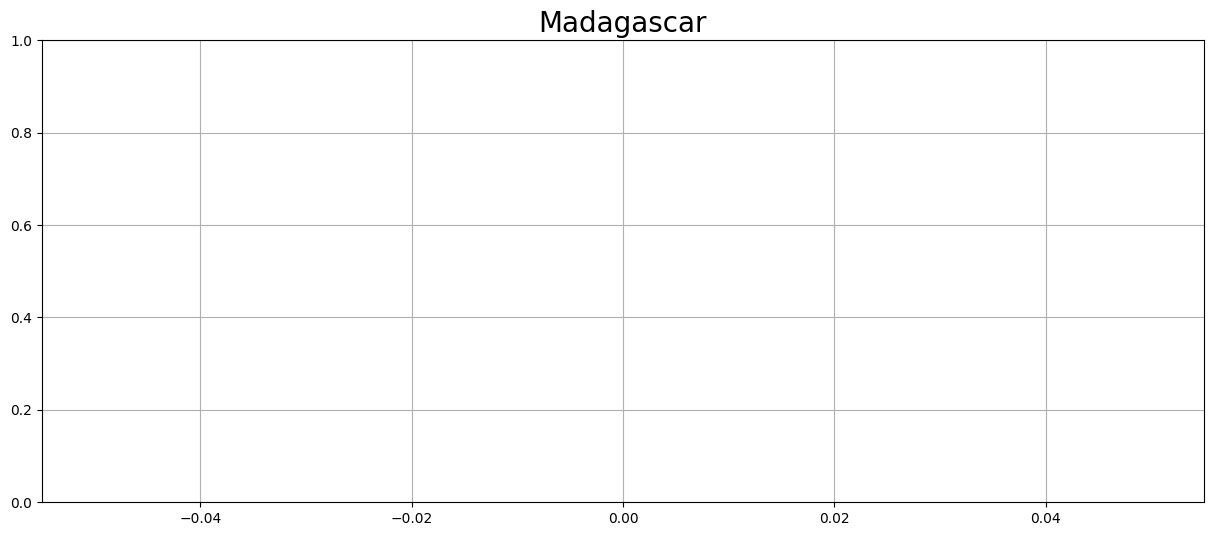

nan


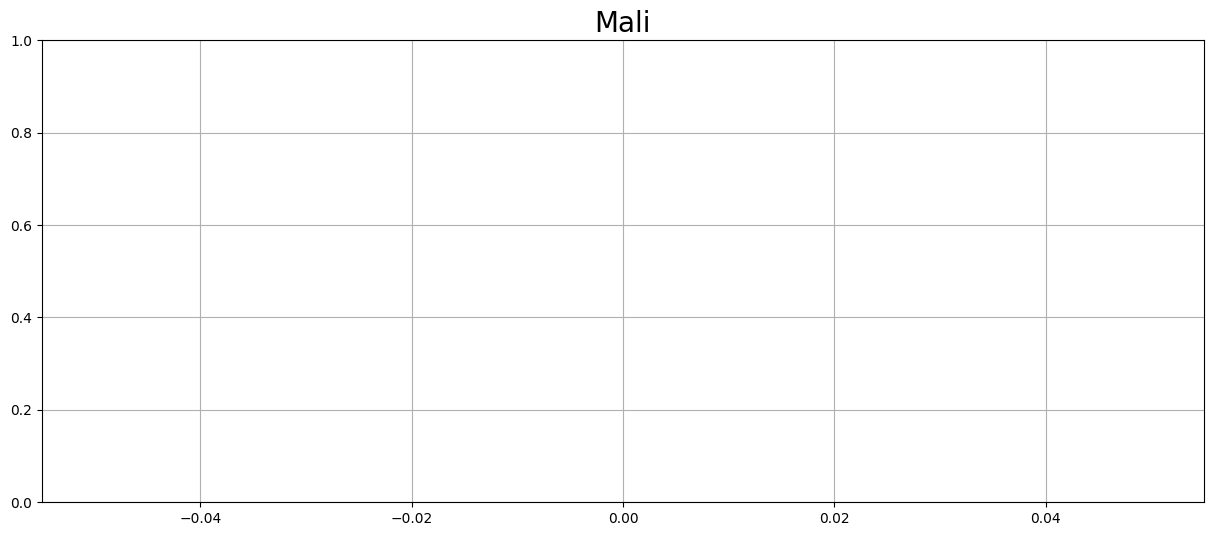

nan


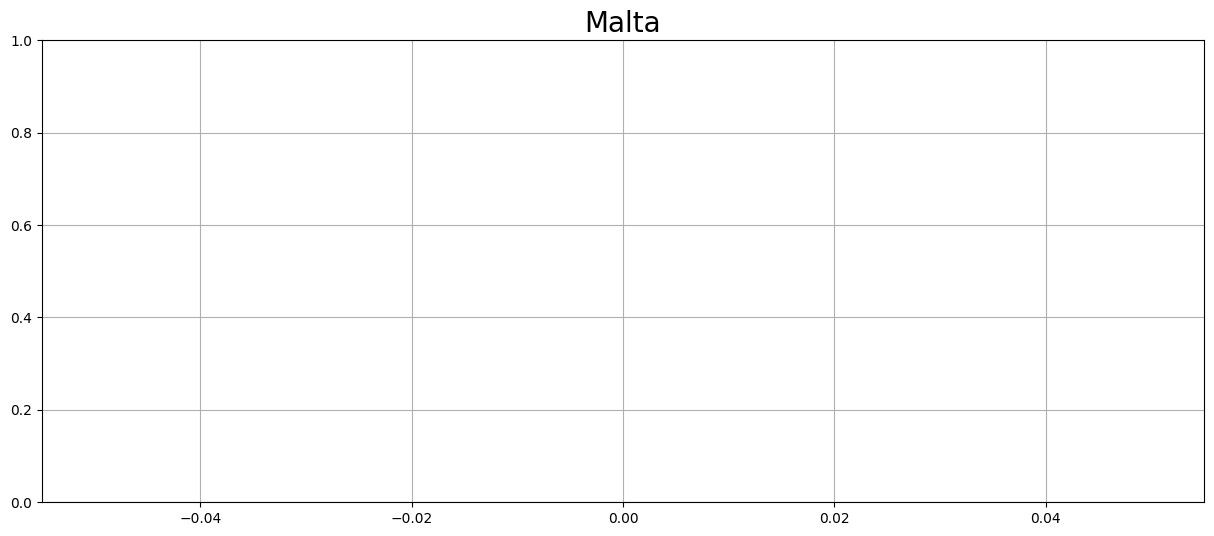

nan


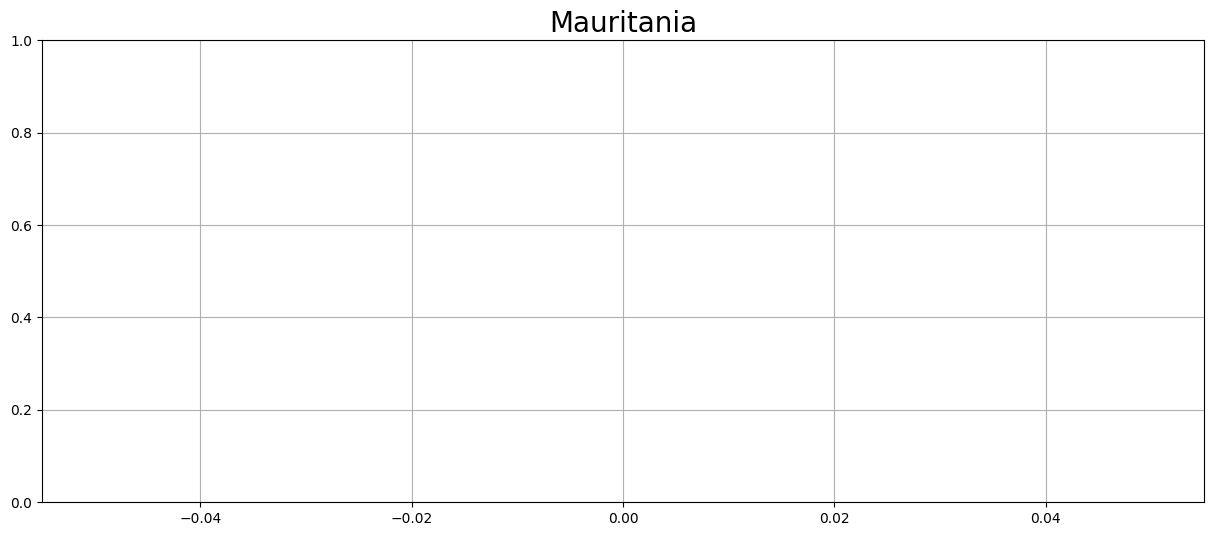

nan


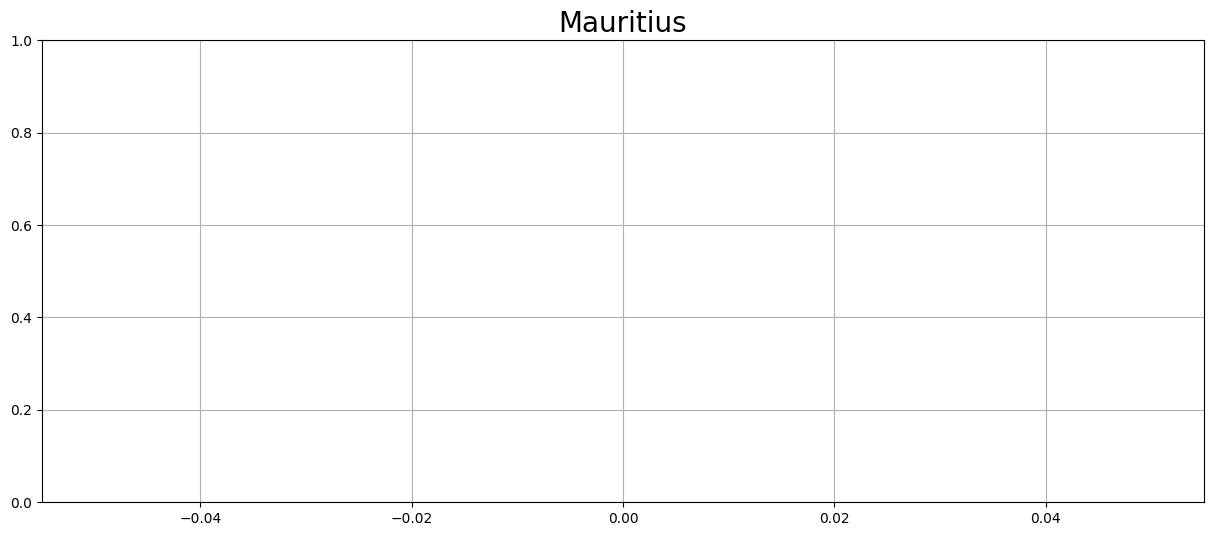

nan


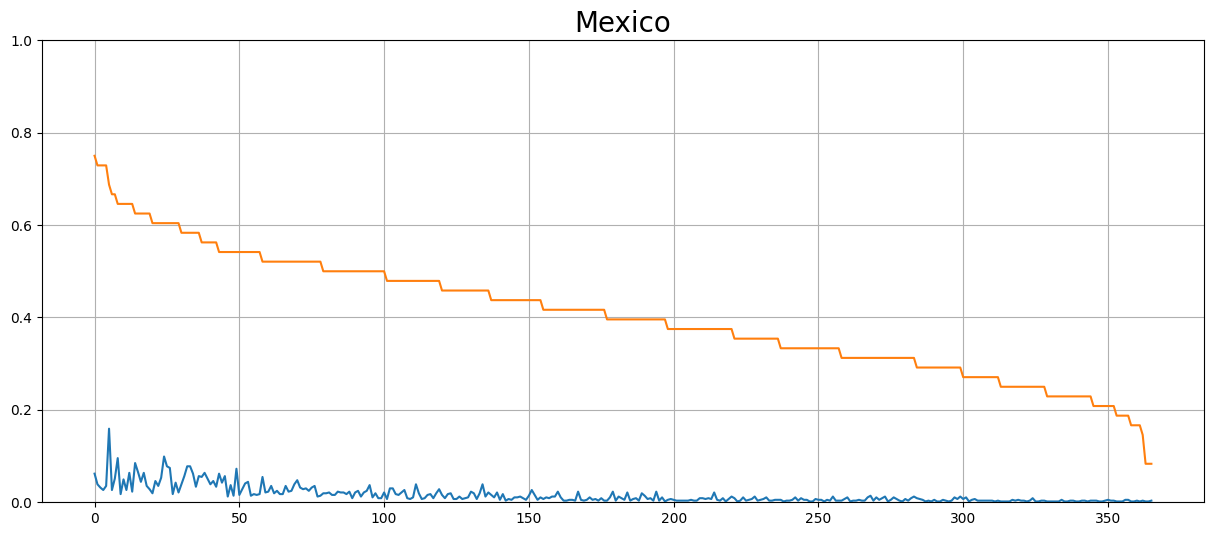

0.7103457904442778


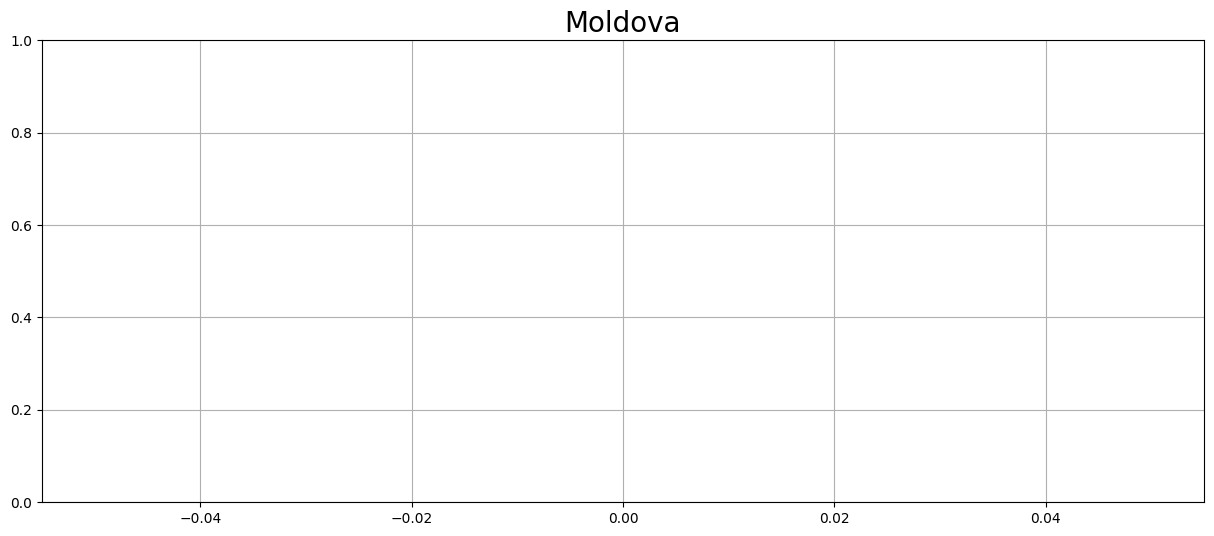

nan


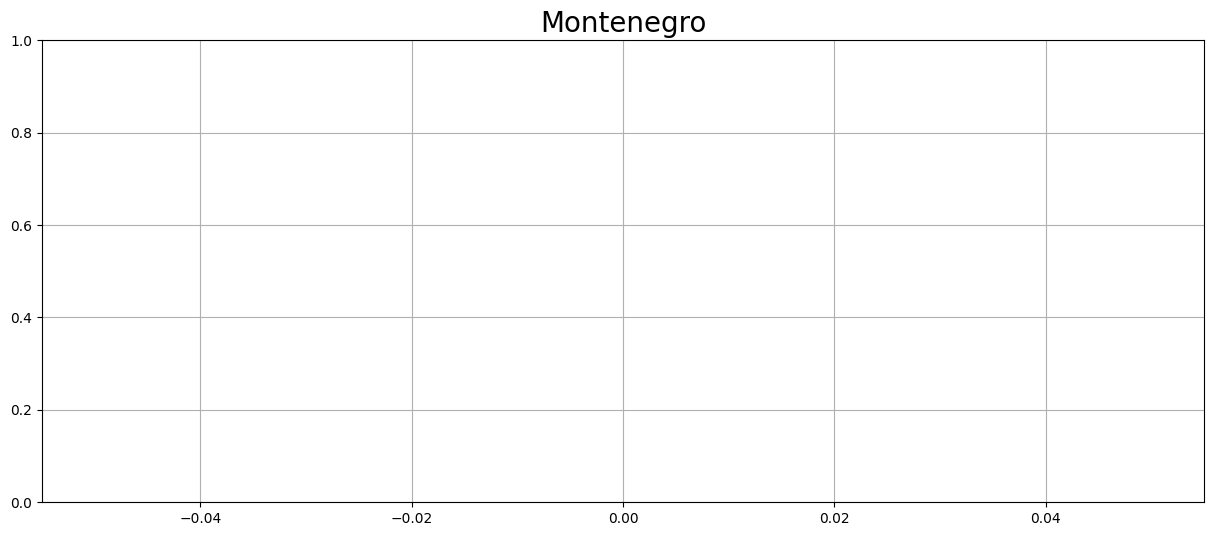

nan


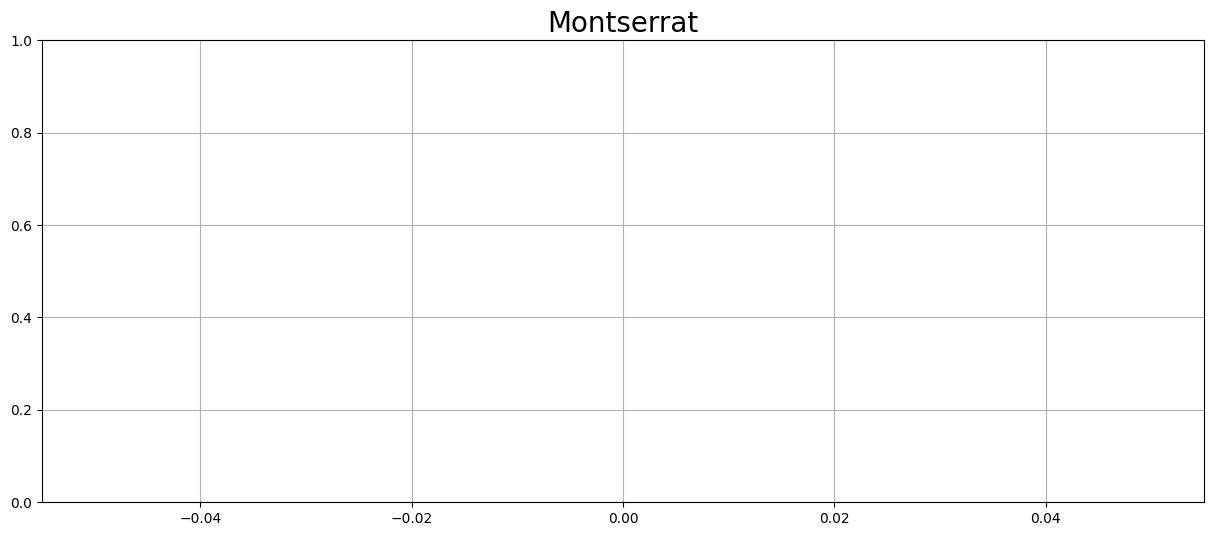

nan


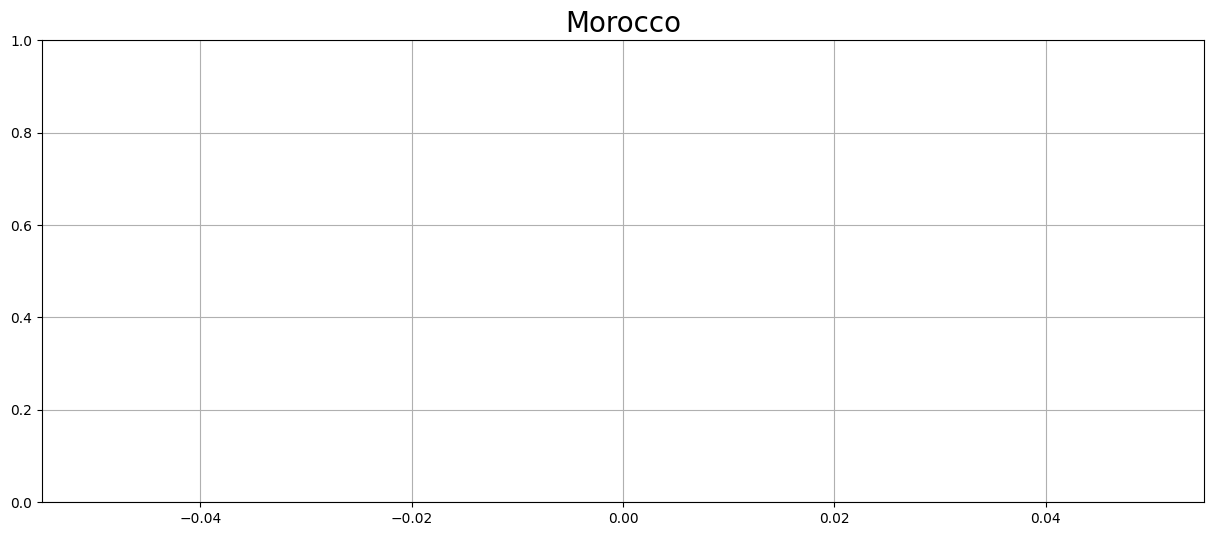

nan


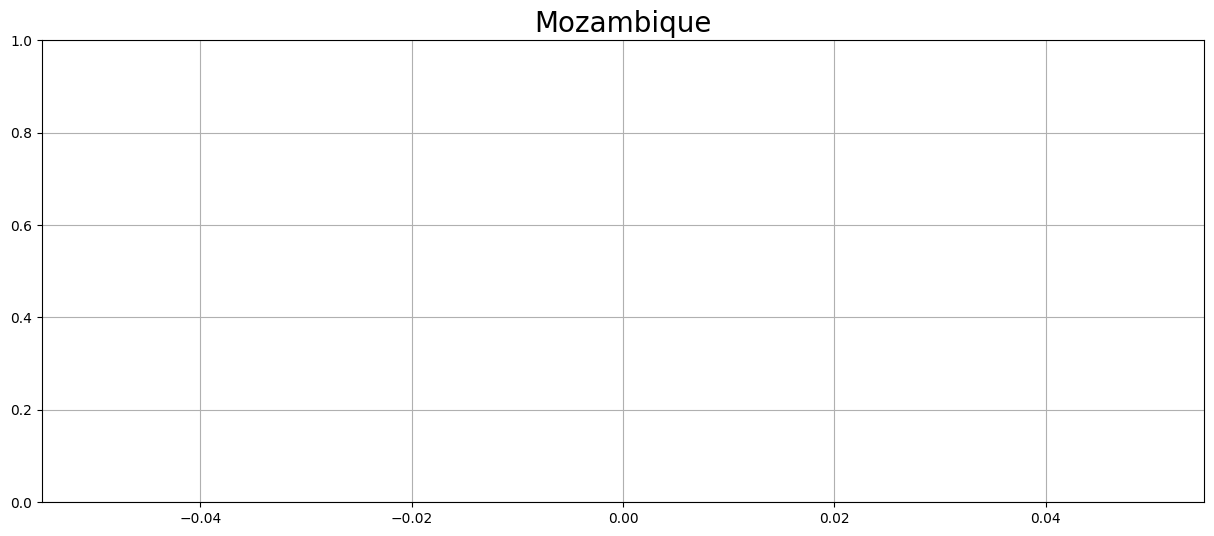

nan


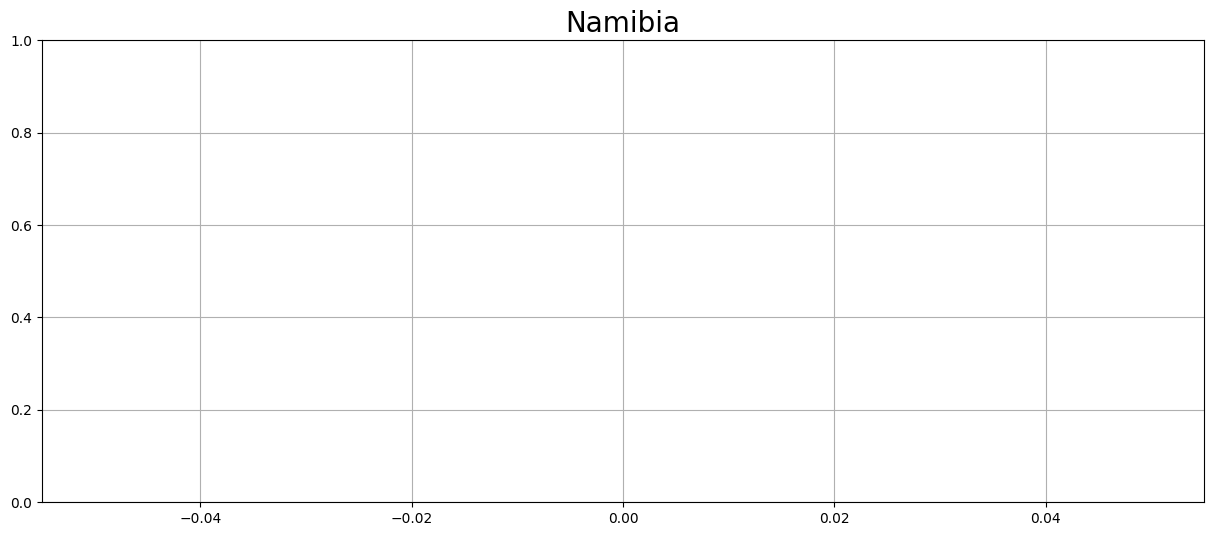

nan


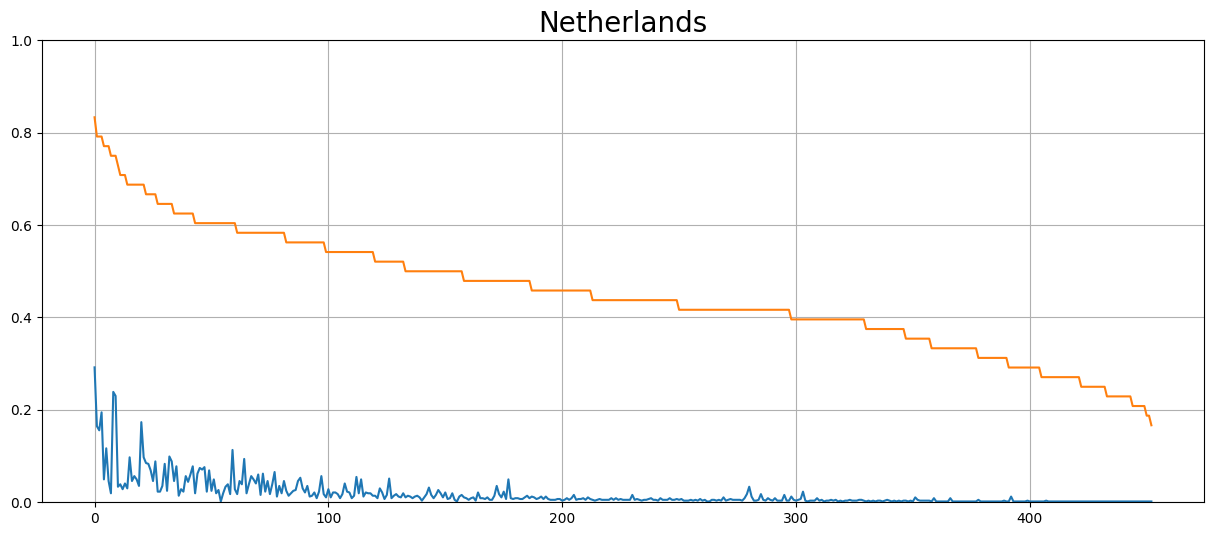

0.6675576439409


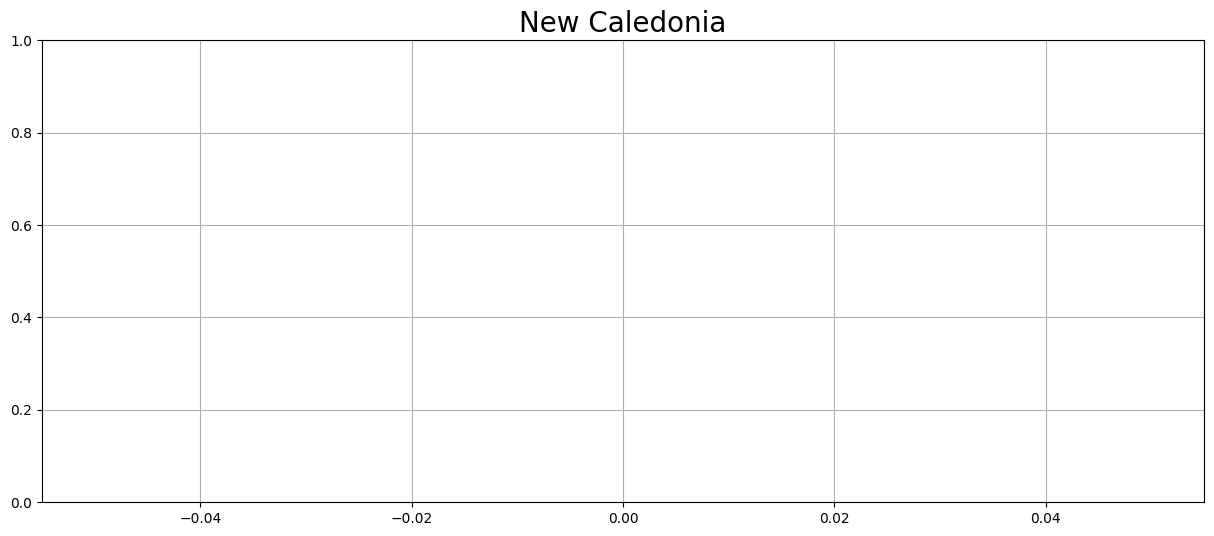

nan


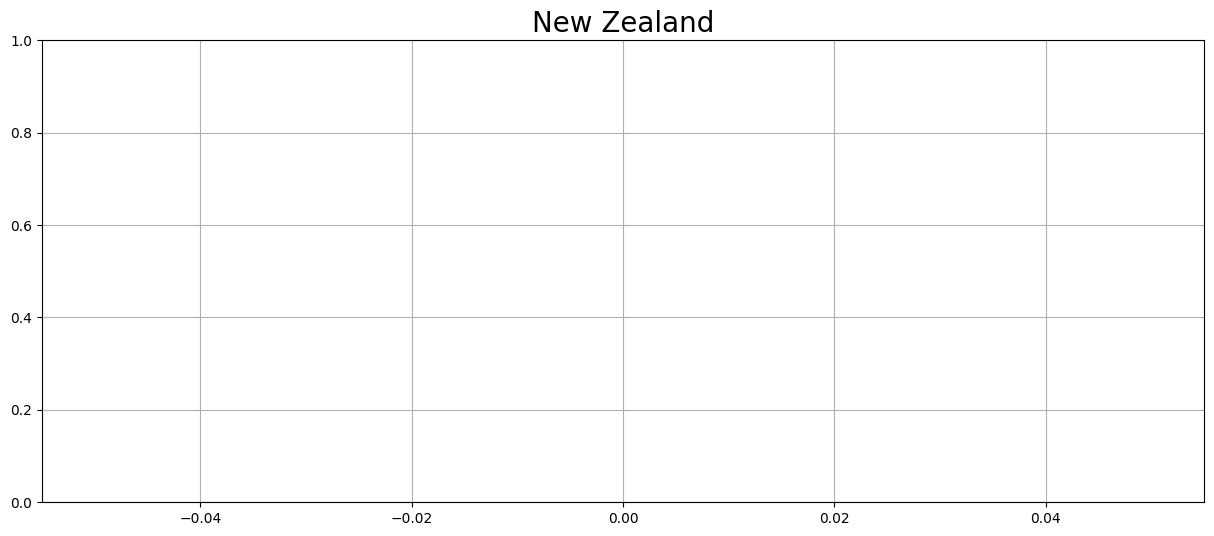

nan


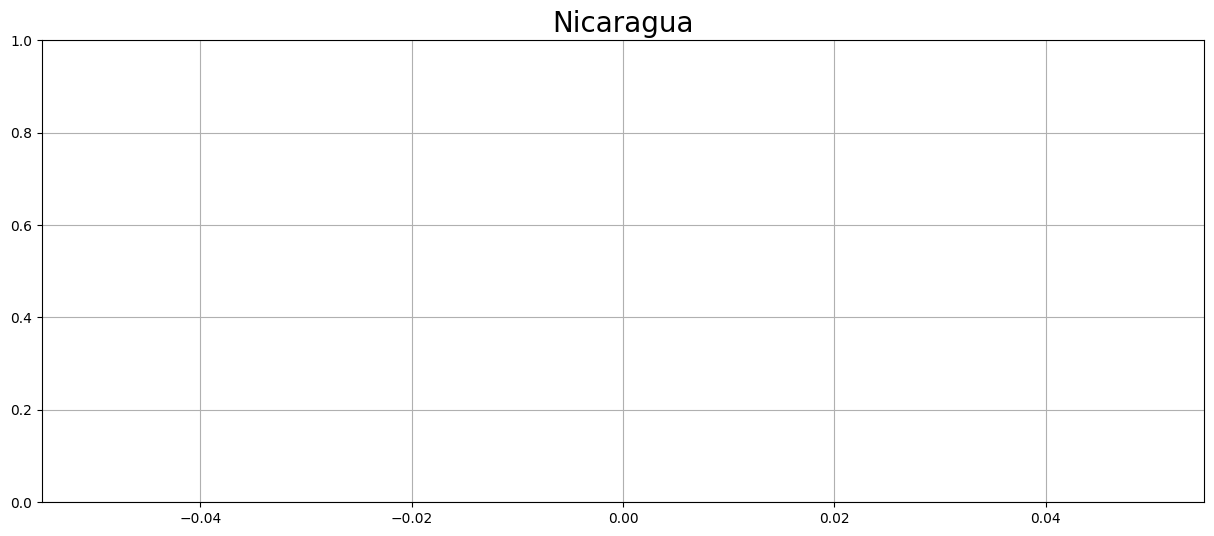

nan


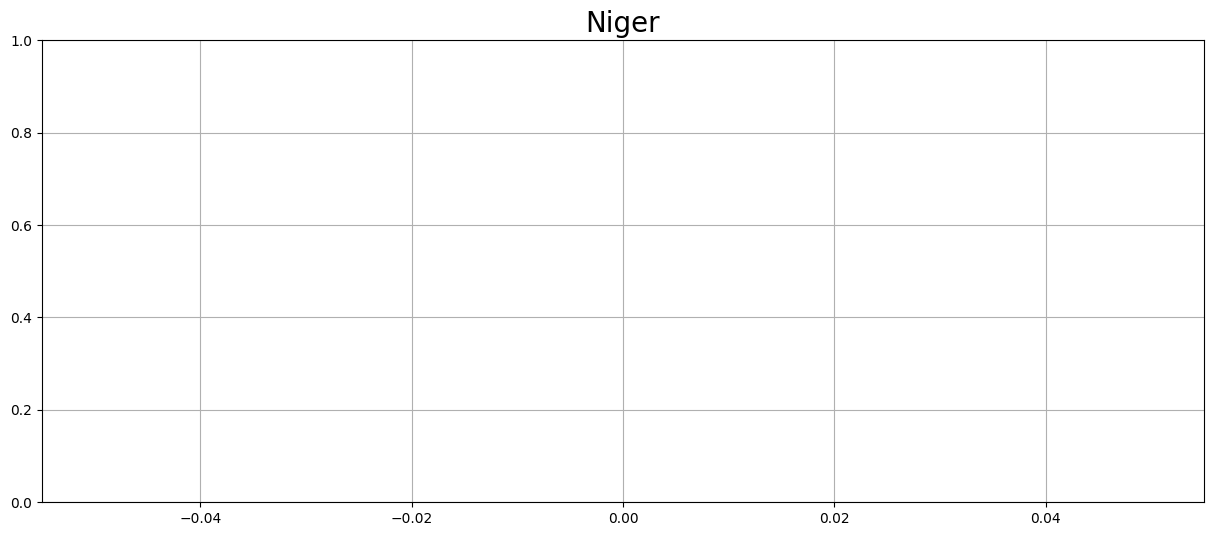

nan


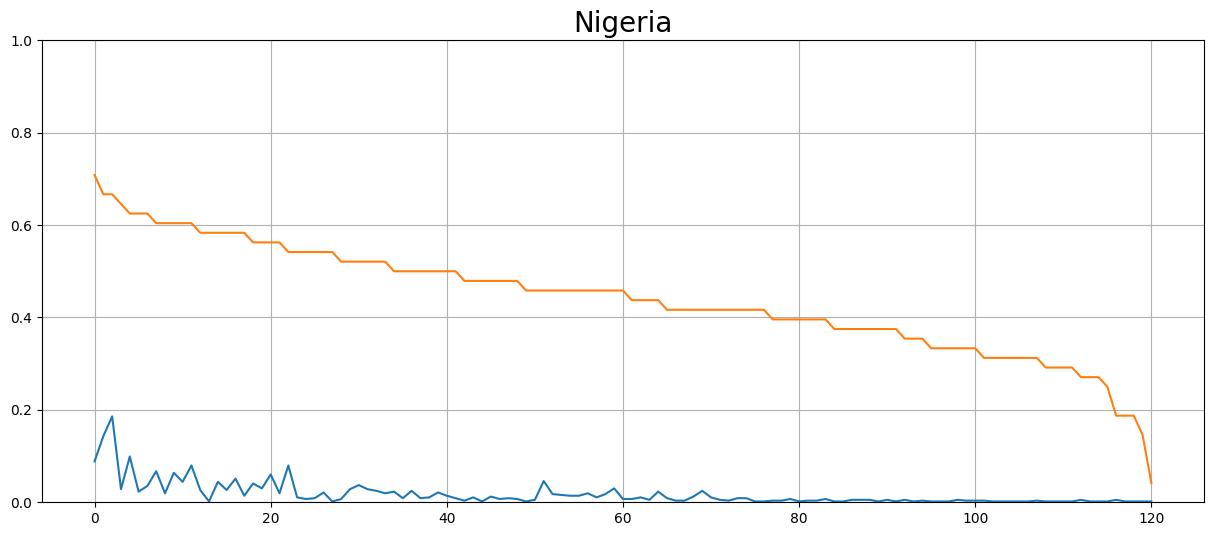

0.6182940066422786


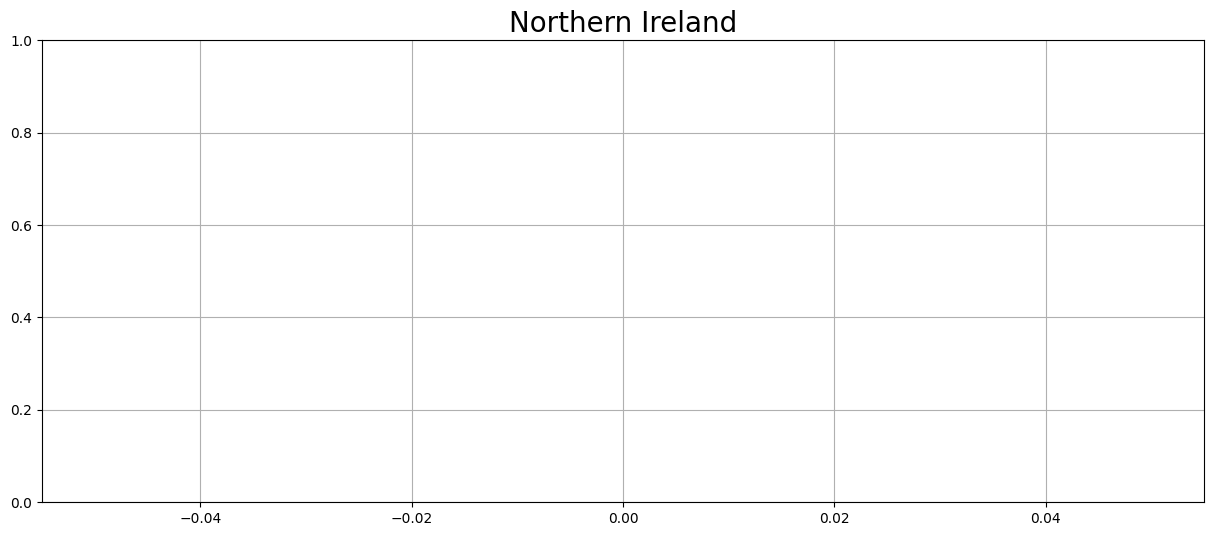

nan


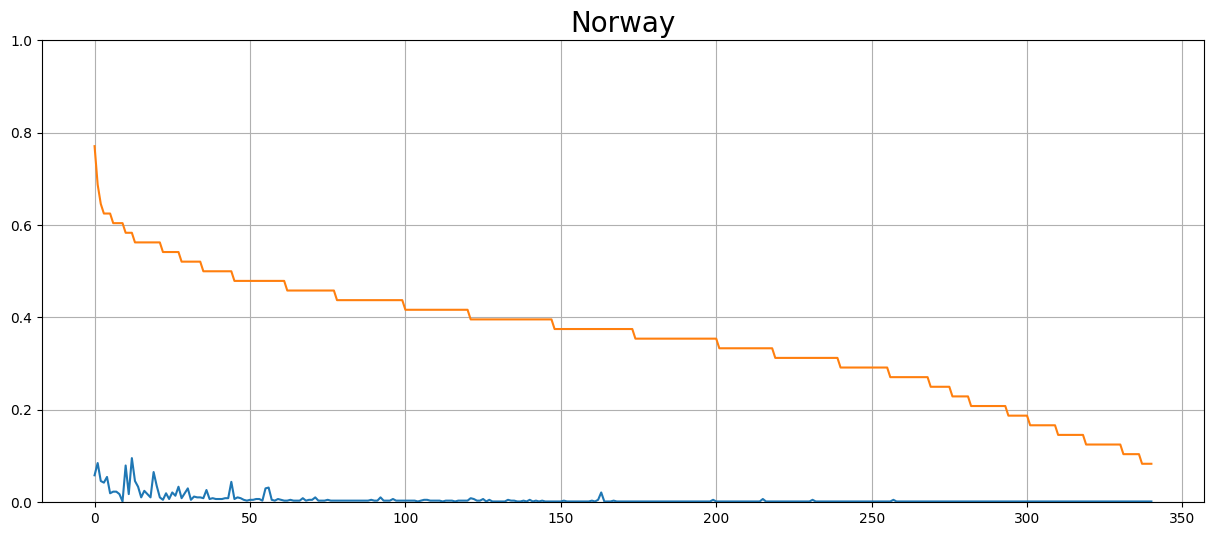

0.5427133153250984


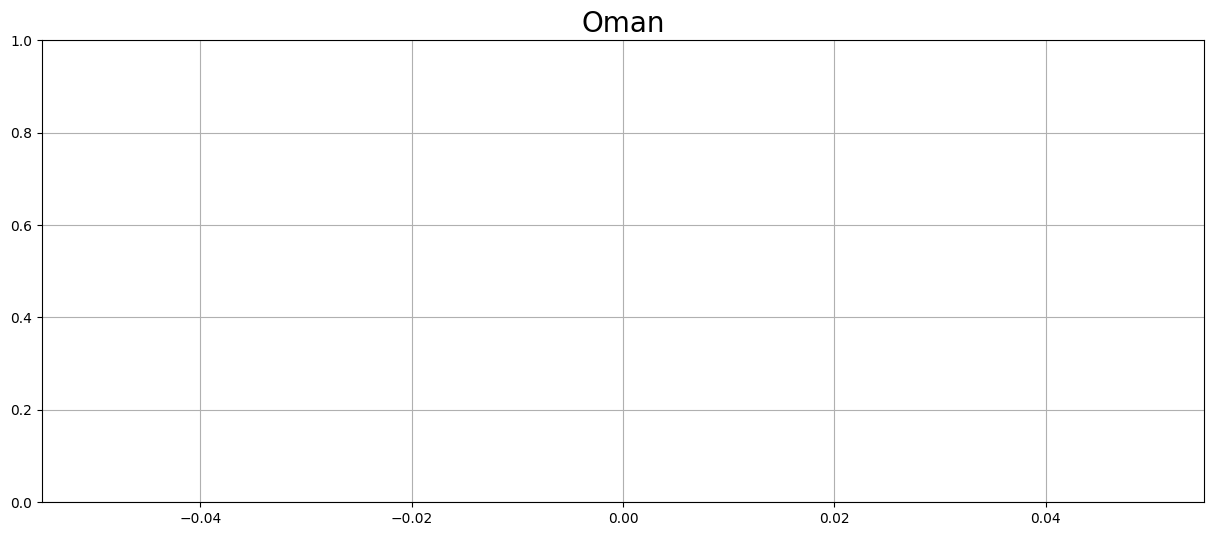

nan


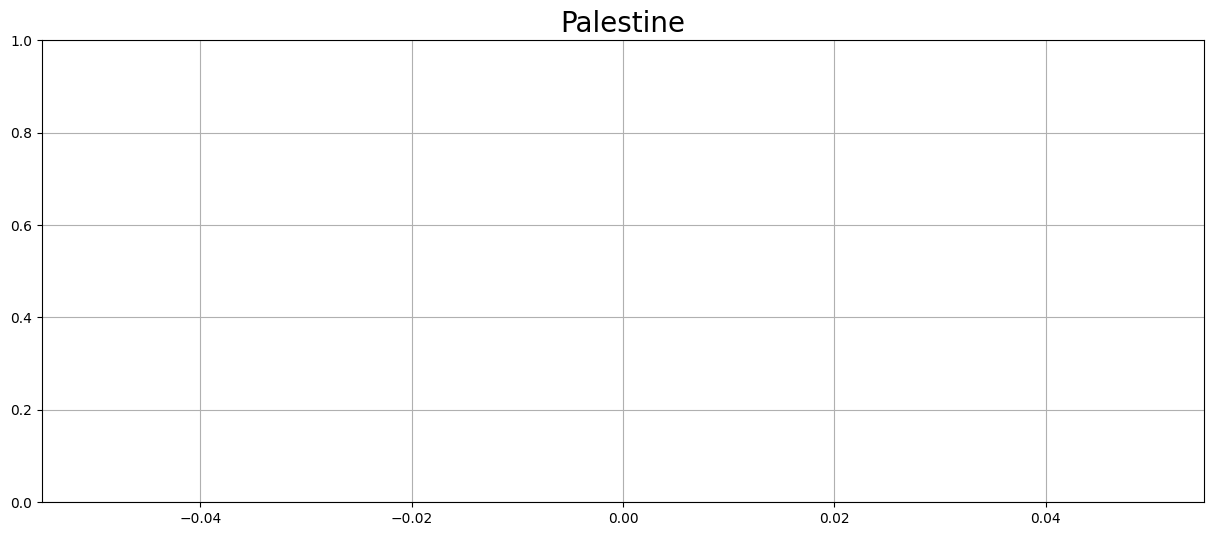

nan


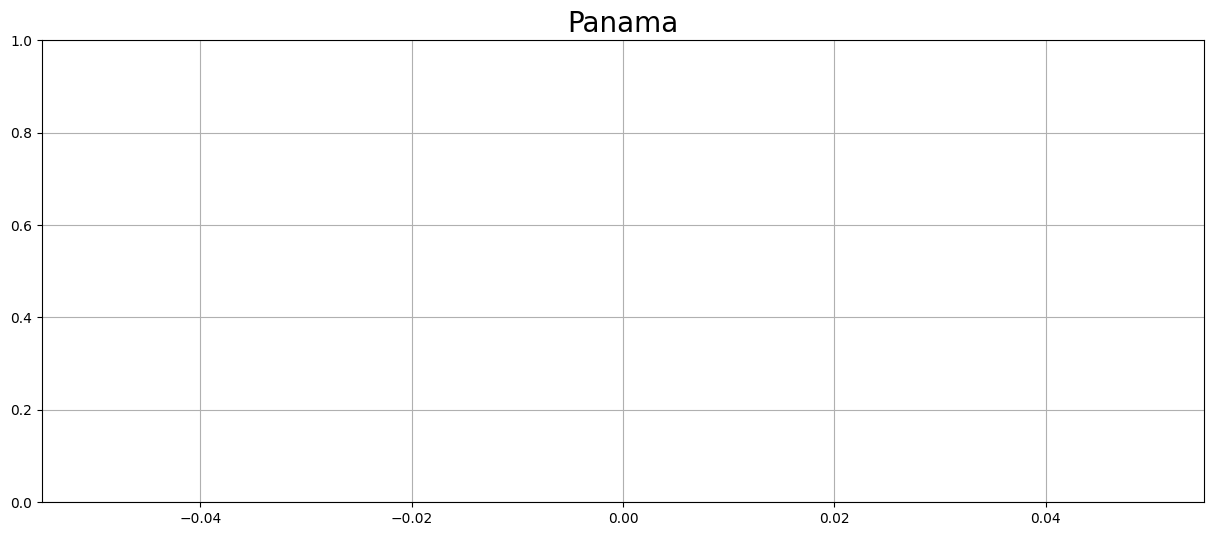

nan


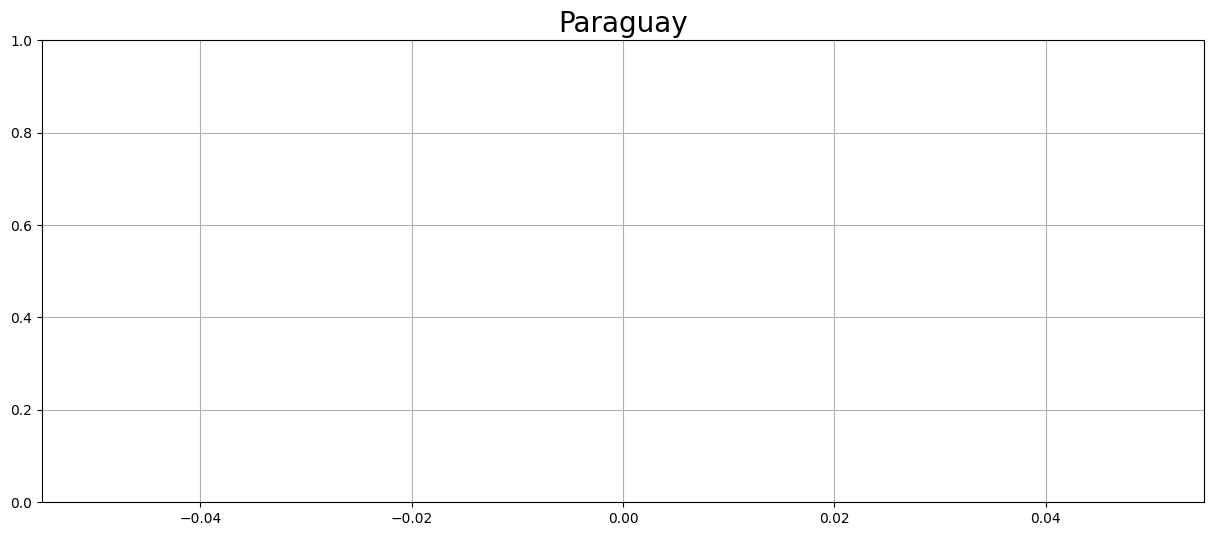

nan


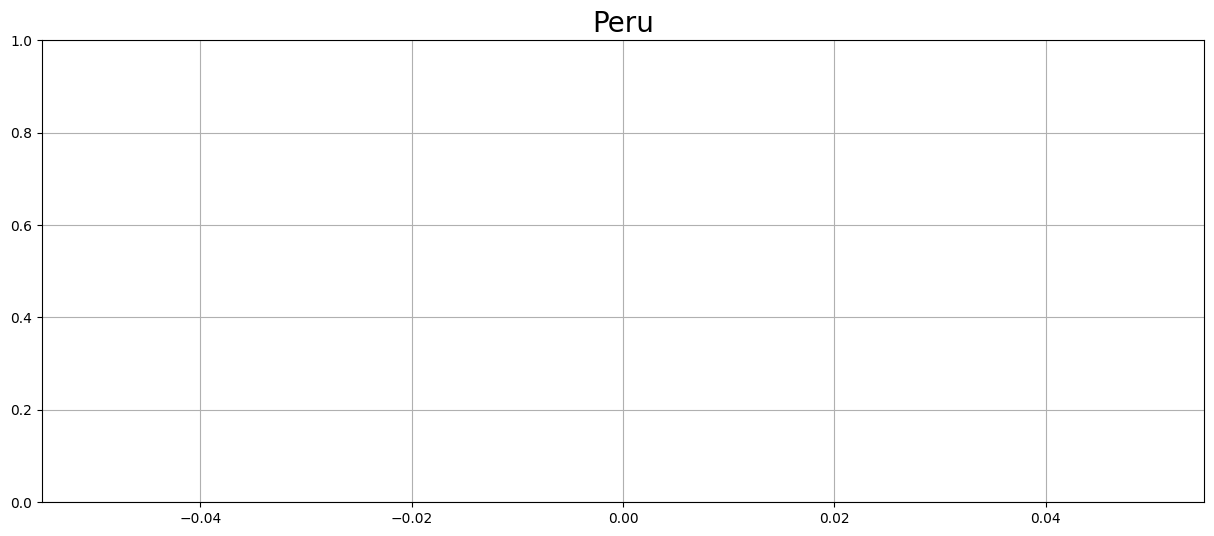

nan


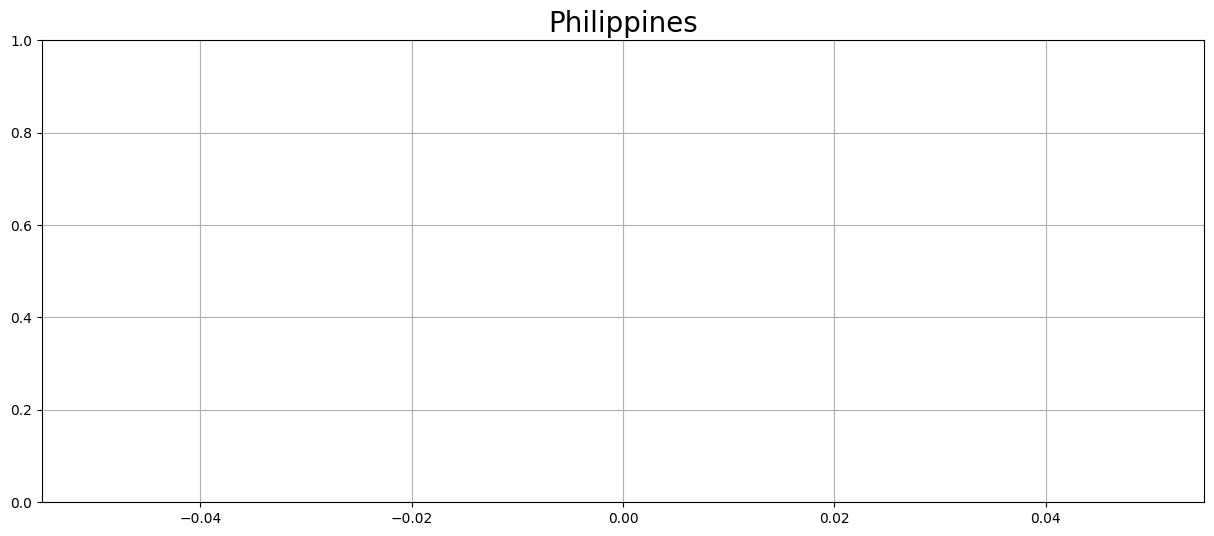

nan


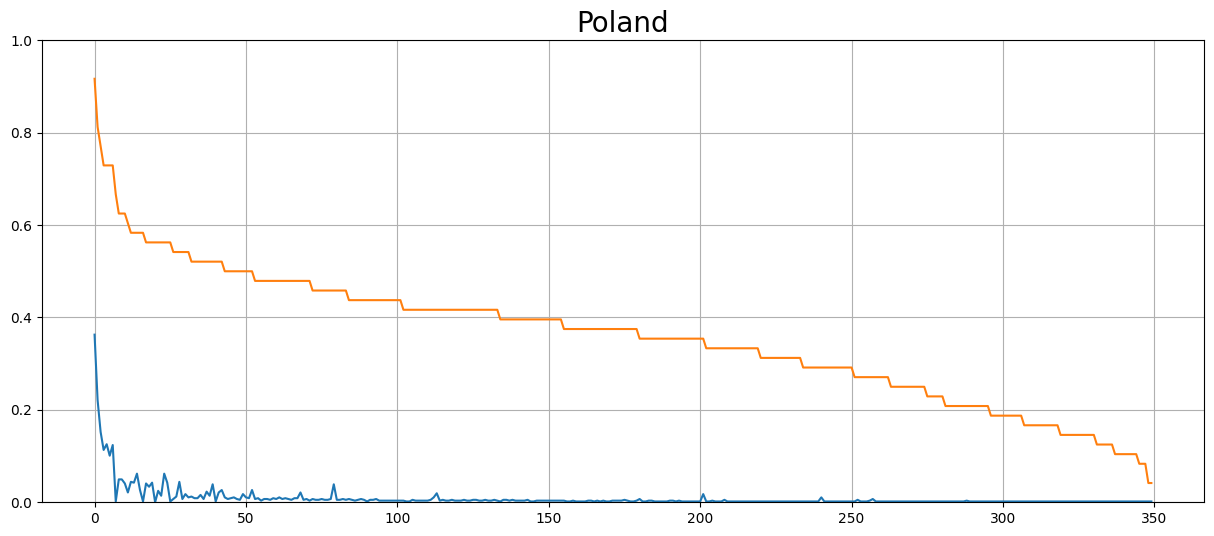

0.545253941805971


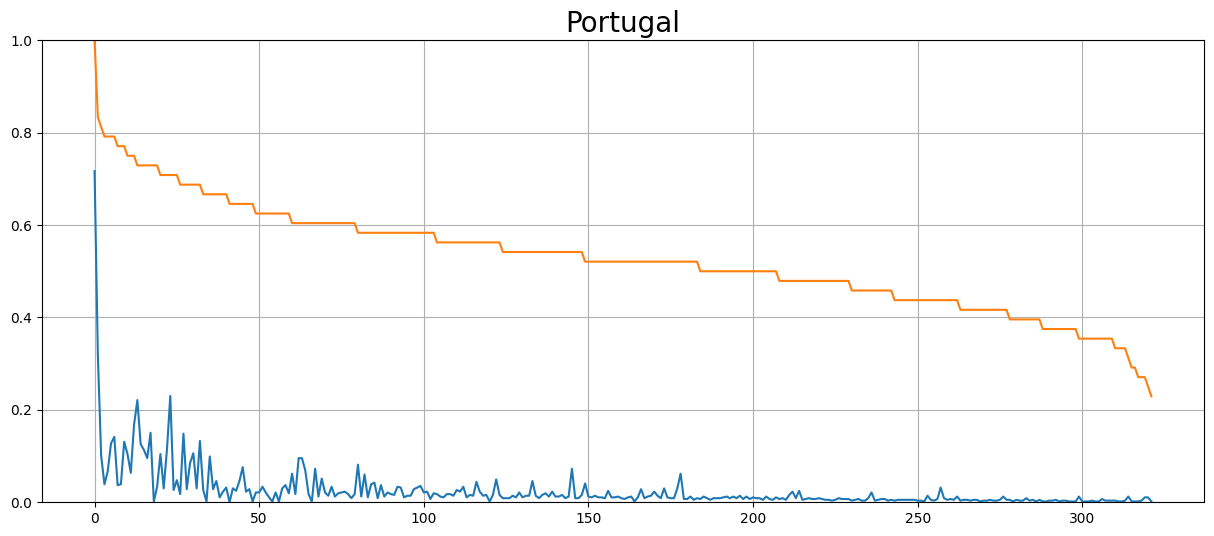

0.5835699476690484


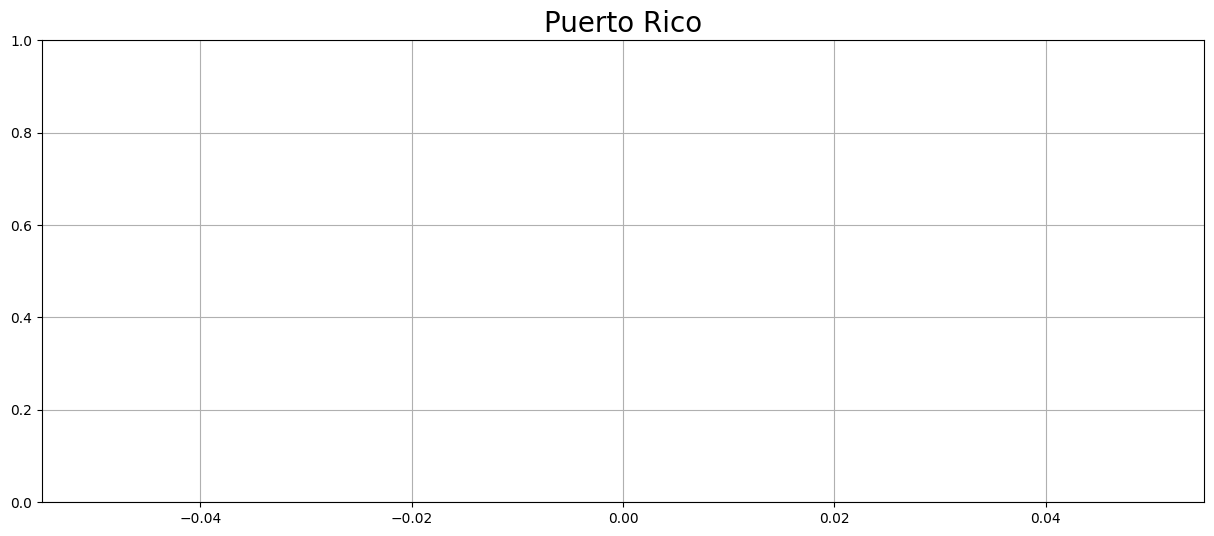

nan


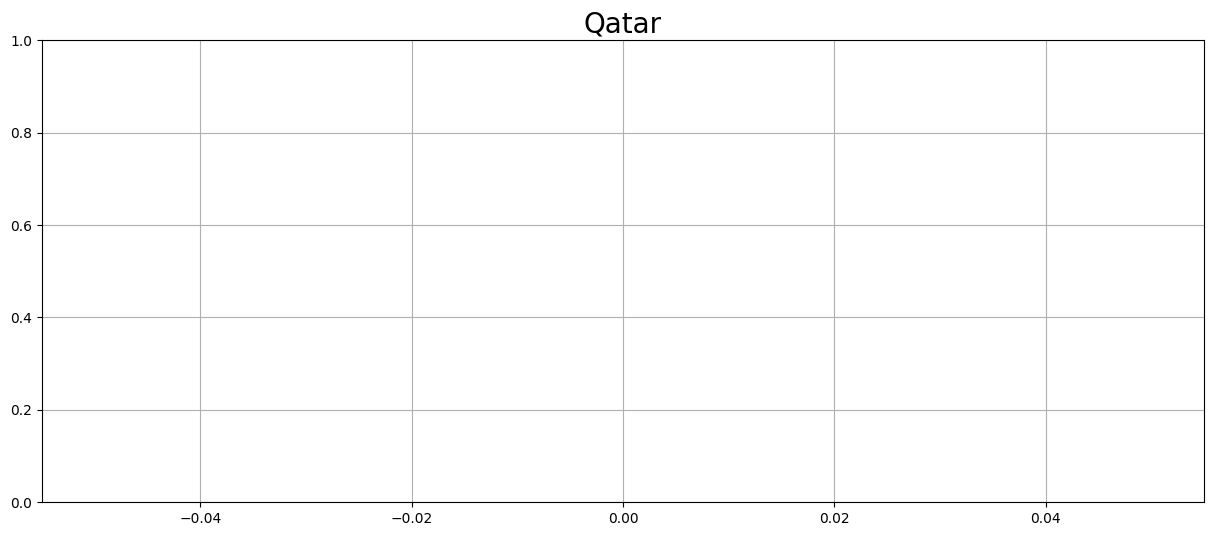

nan


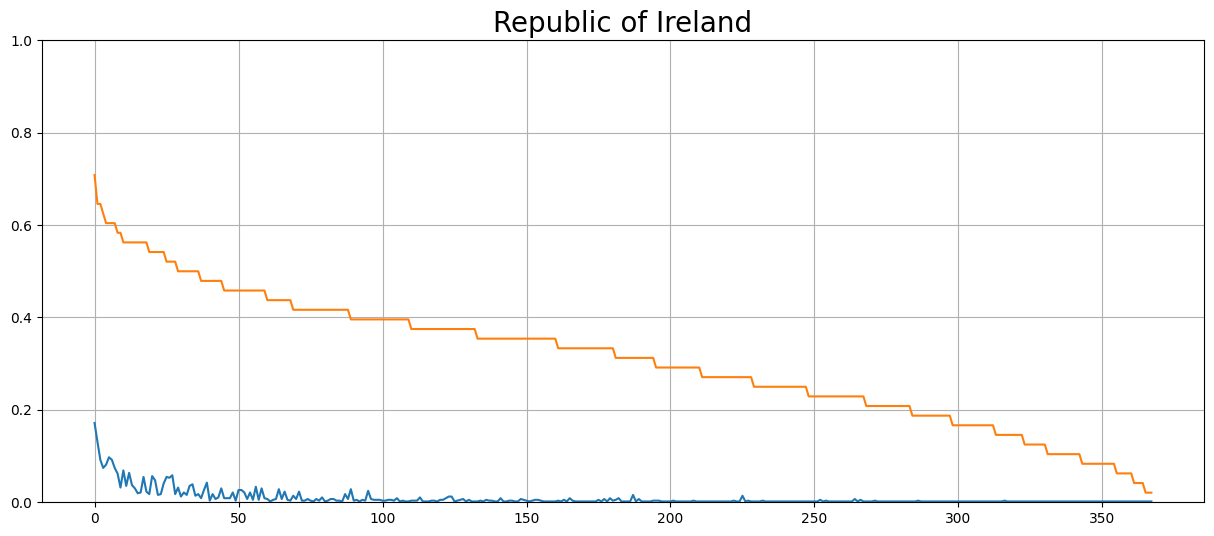

0.6132033022753777


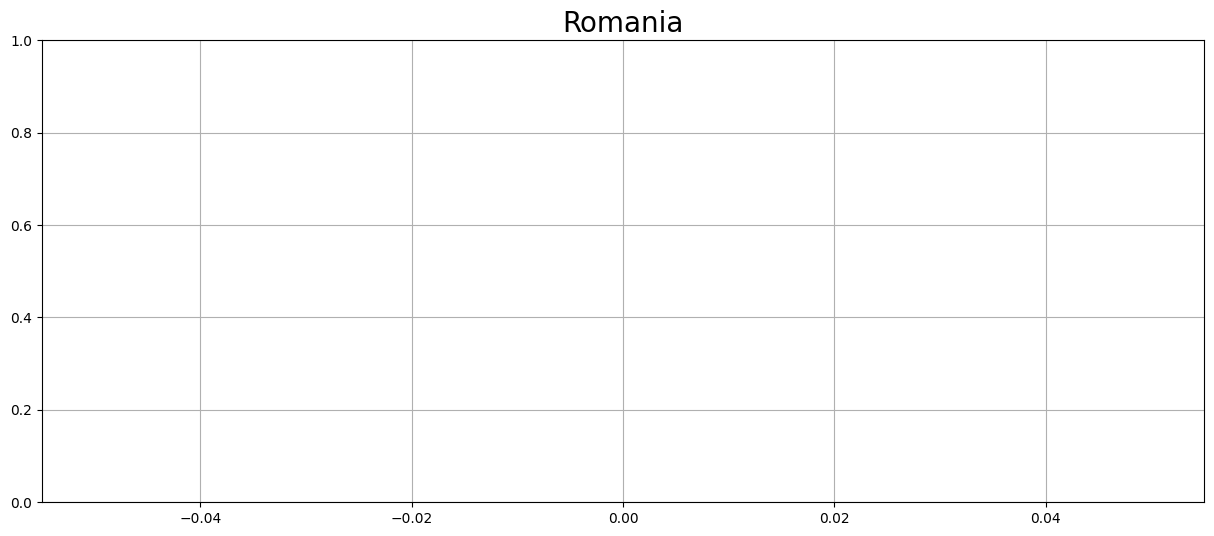

nan


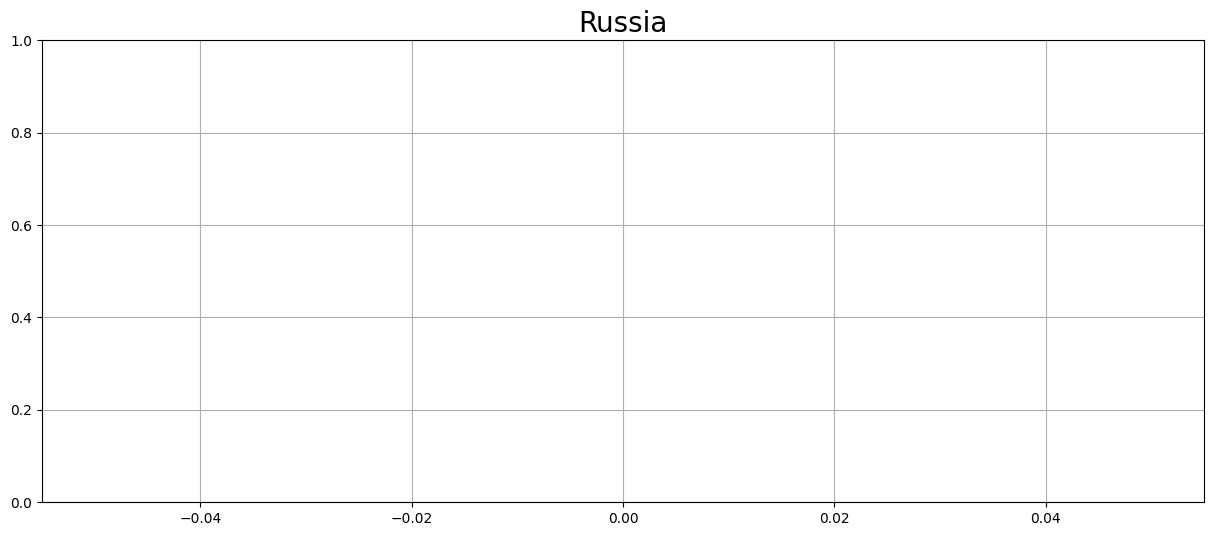

nan


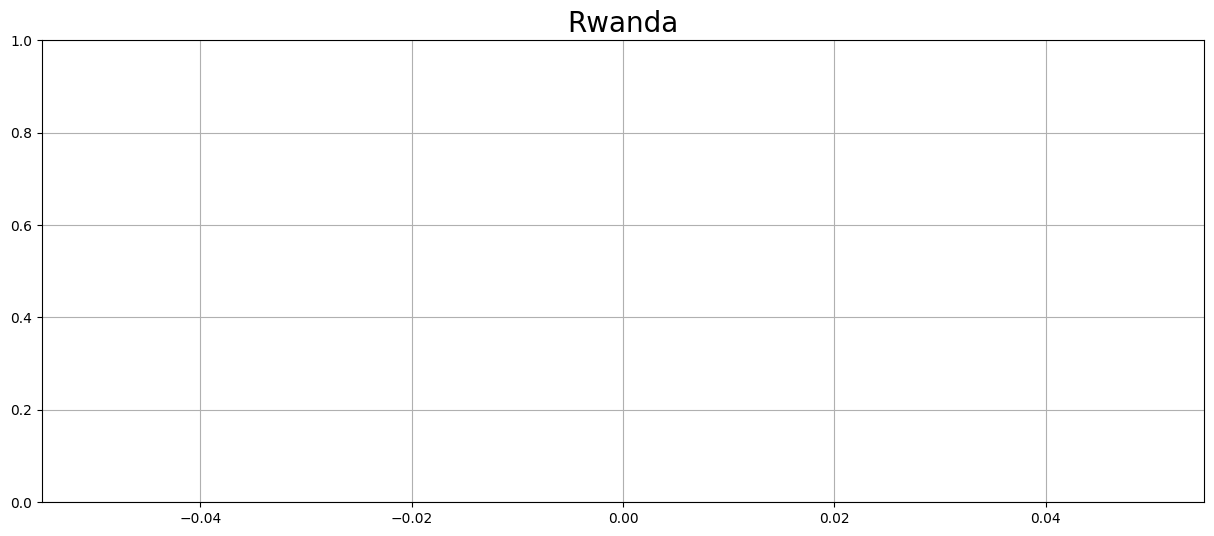

nan


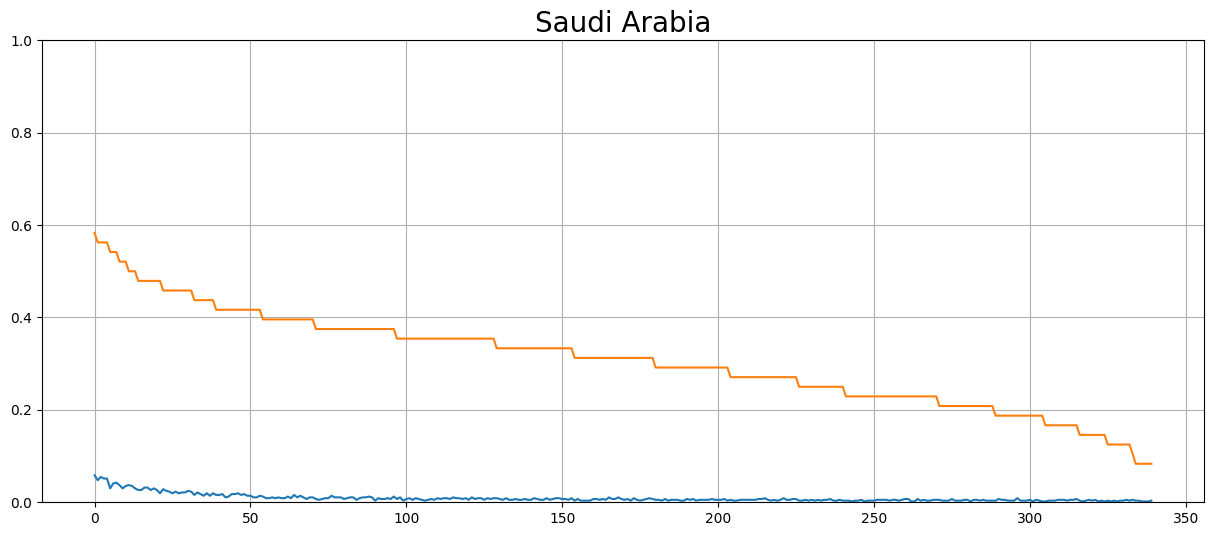

0.7728663644945715


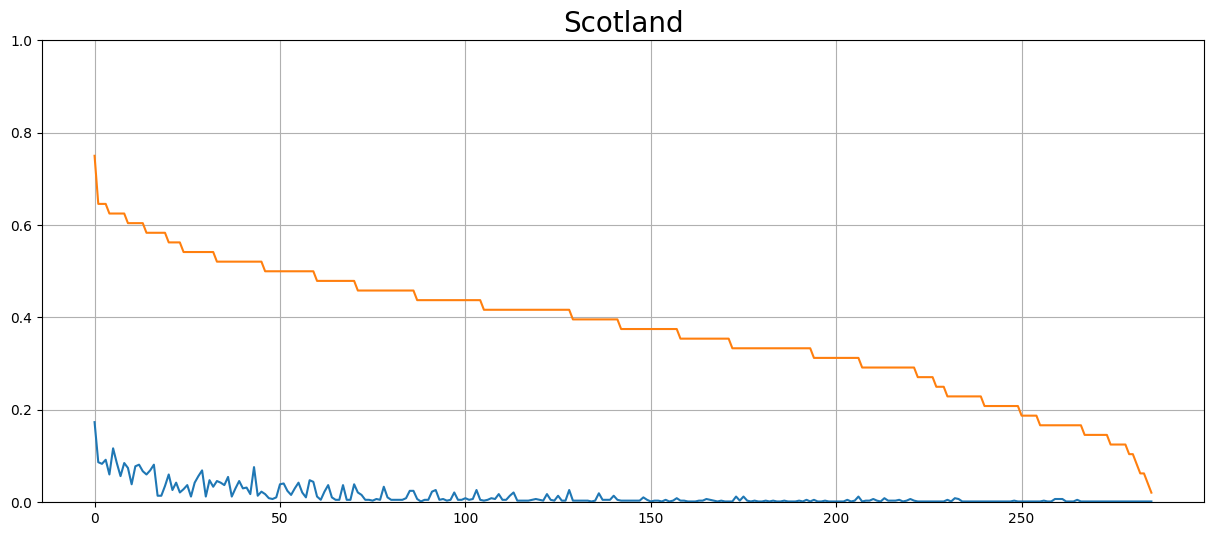

0.6739078465609726


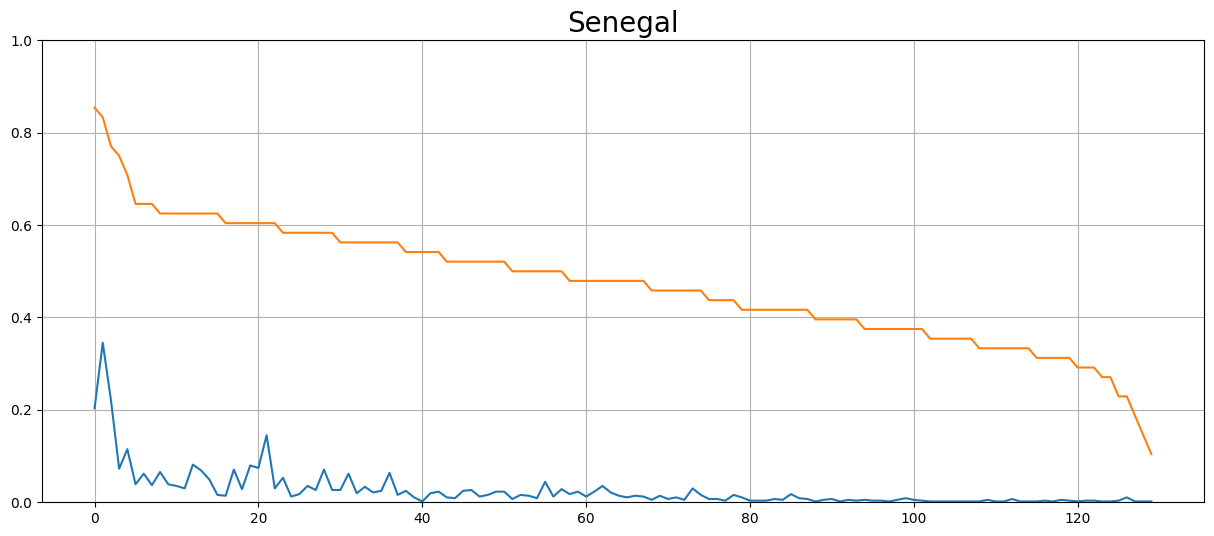

0.6768391127576248


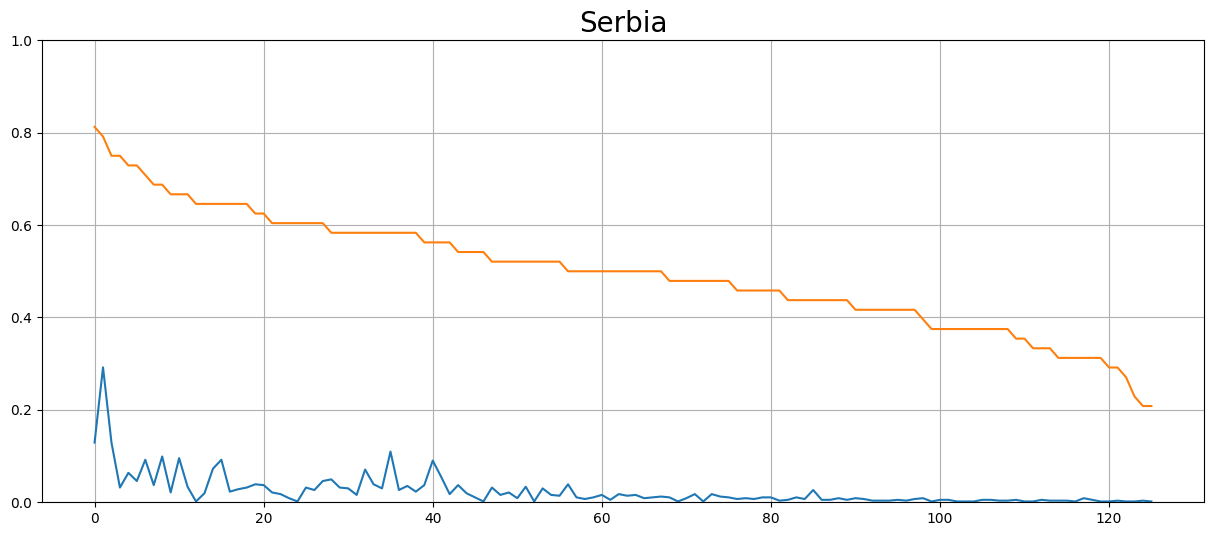

0.6392947509848532


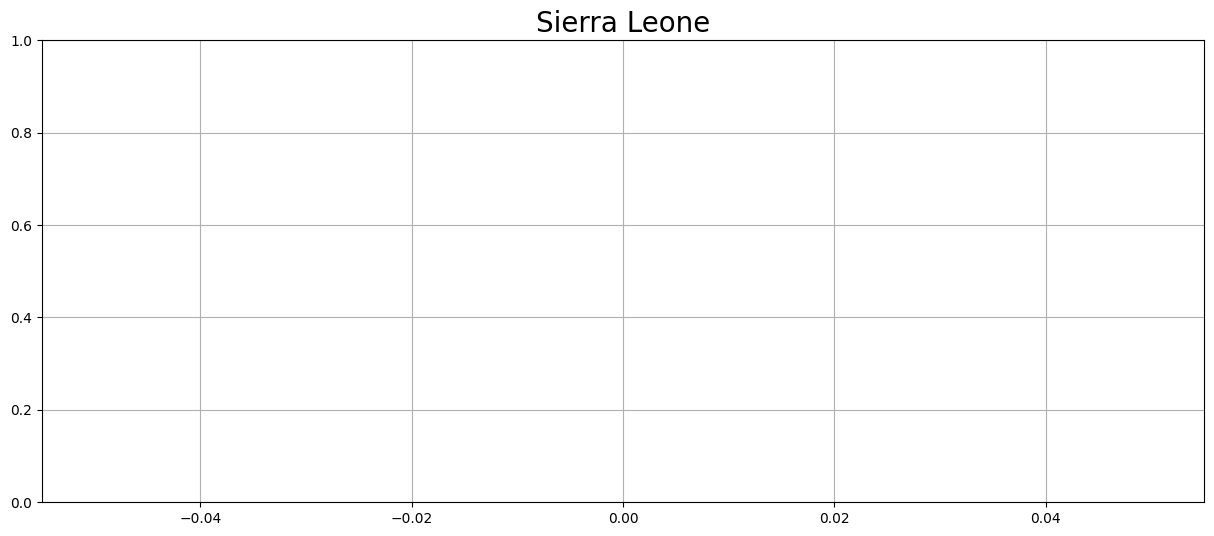

nan


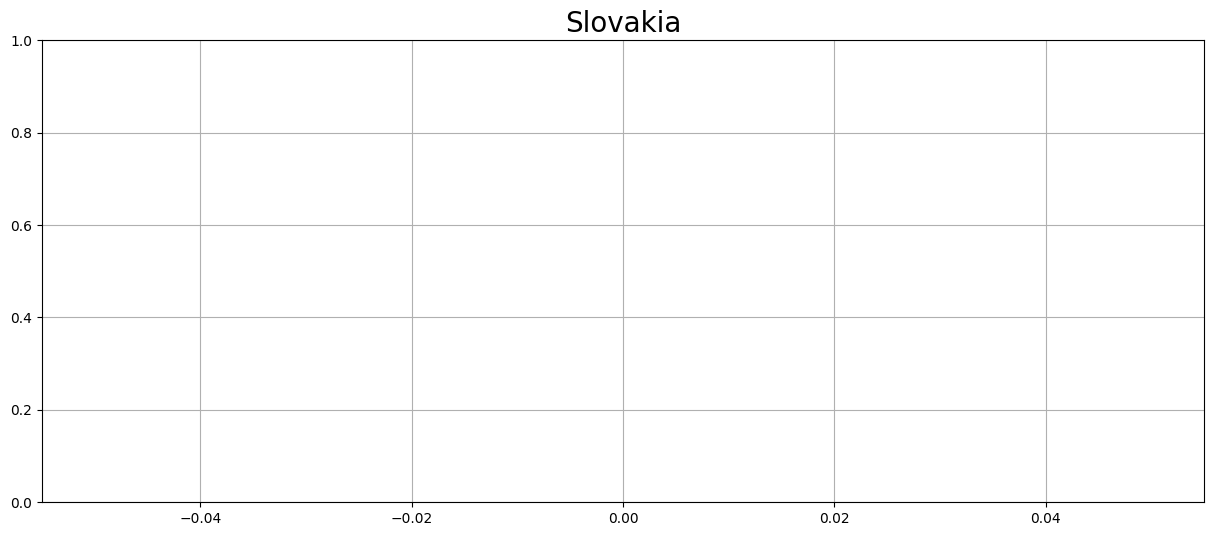

nan


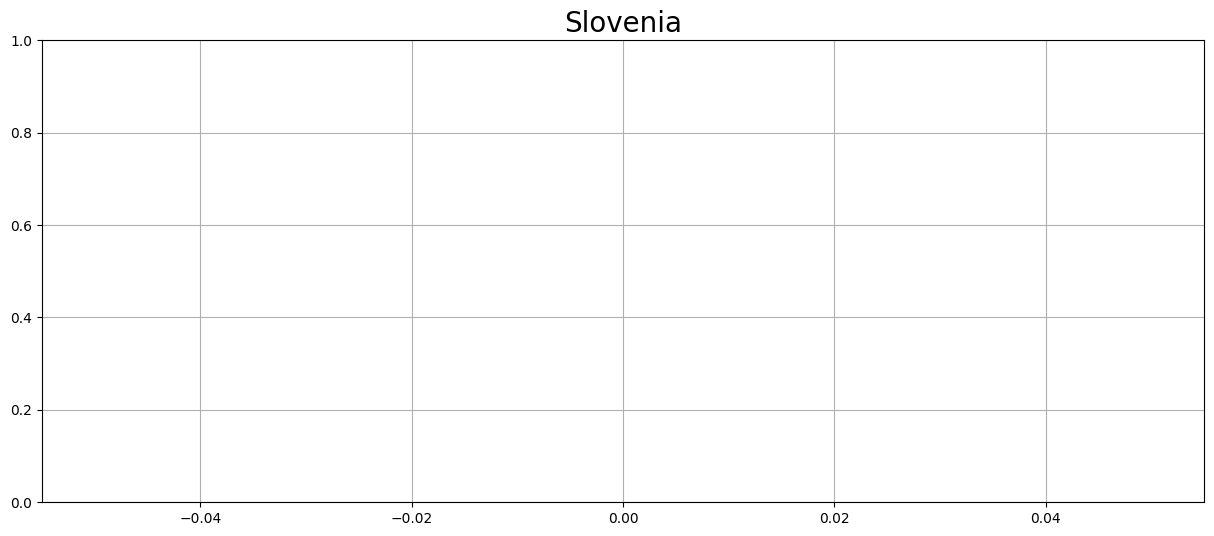

nan


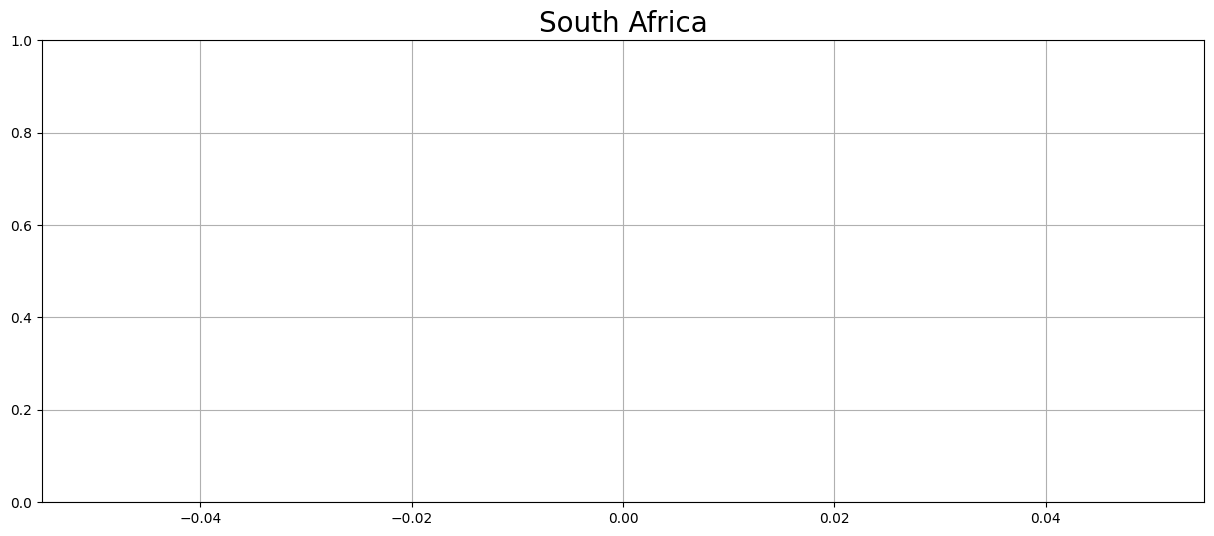

nan


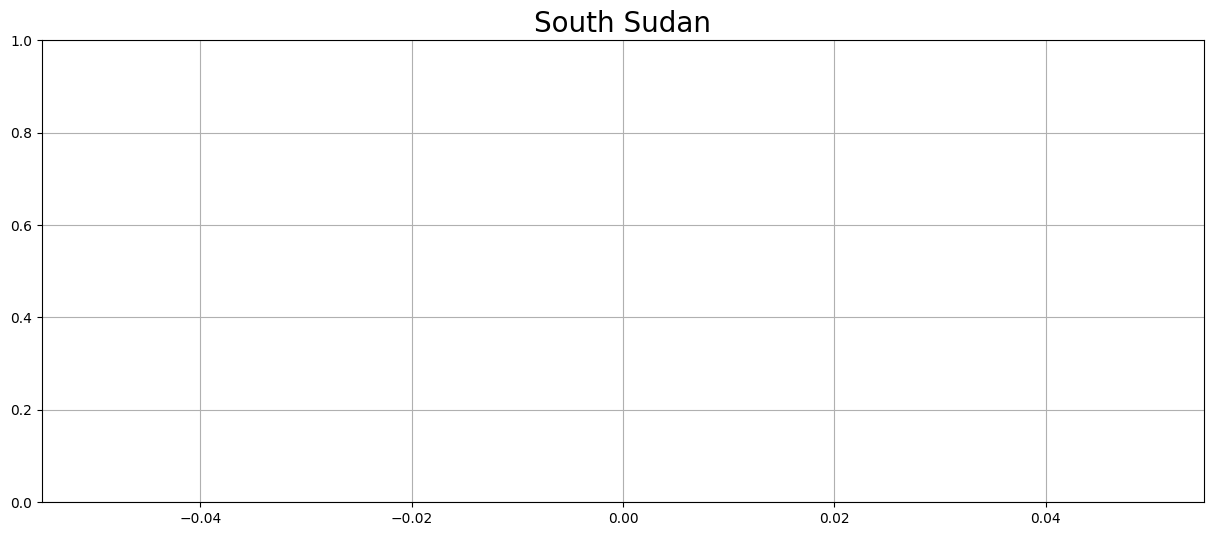

nan


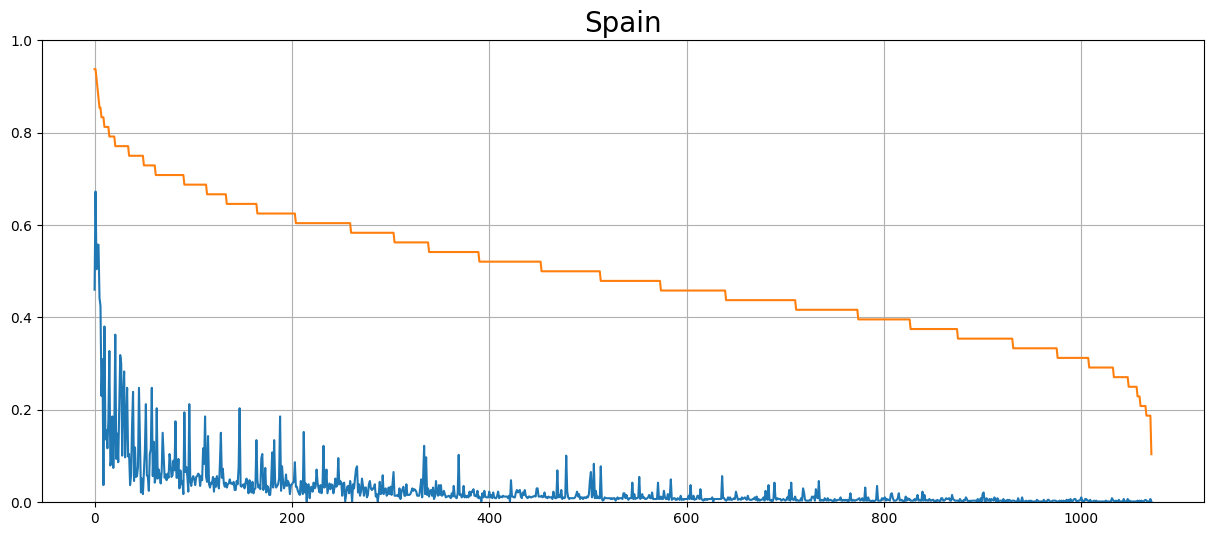

0.6228813739235383


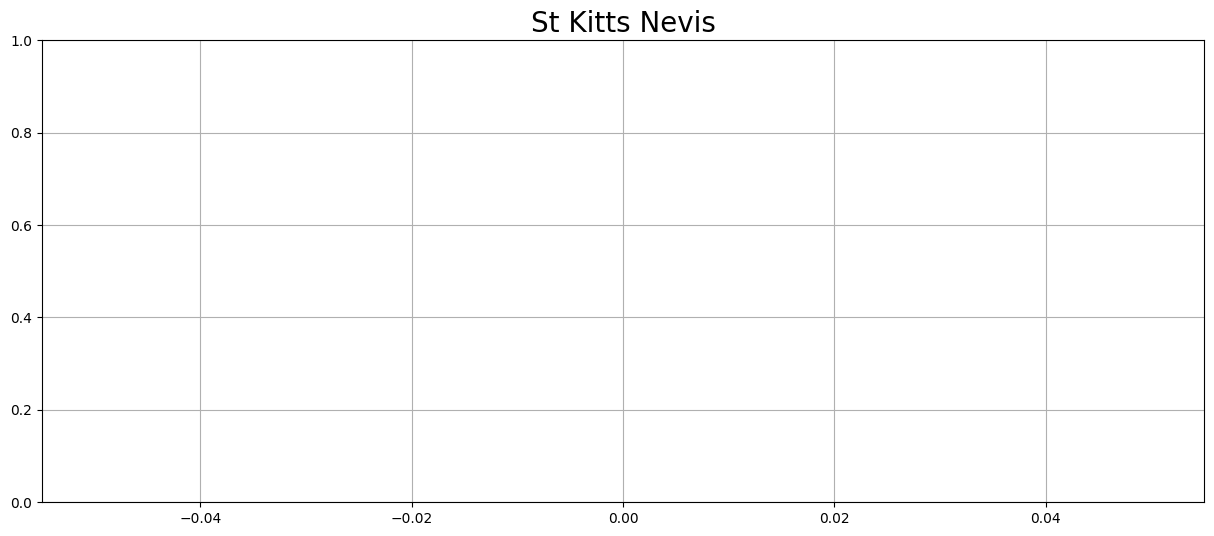

nan


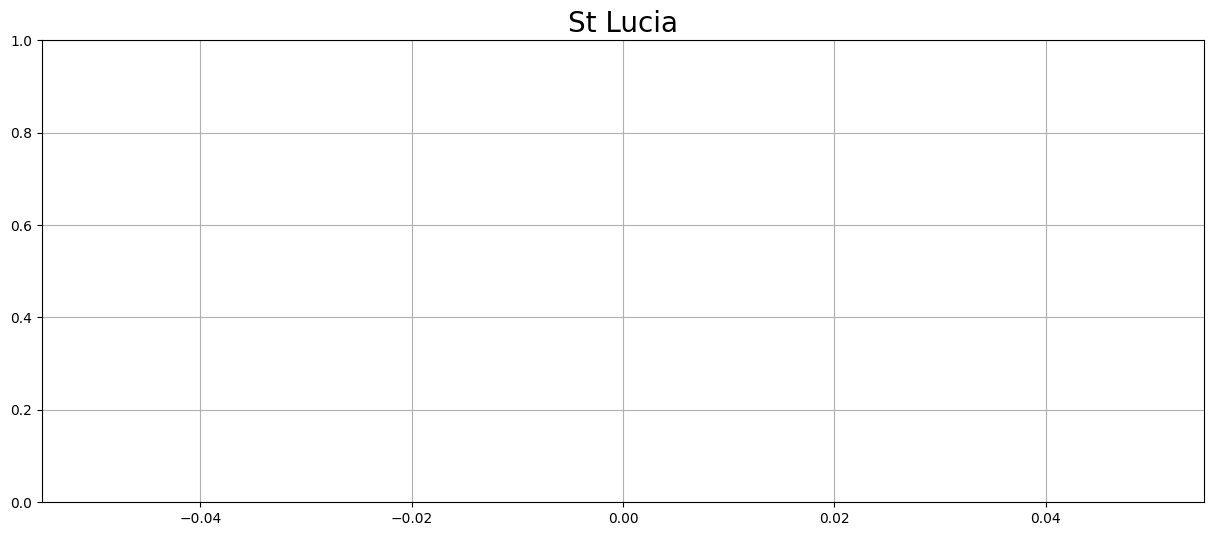

nan


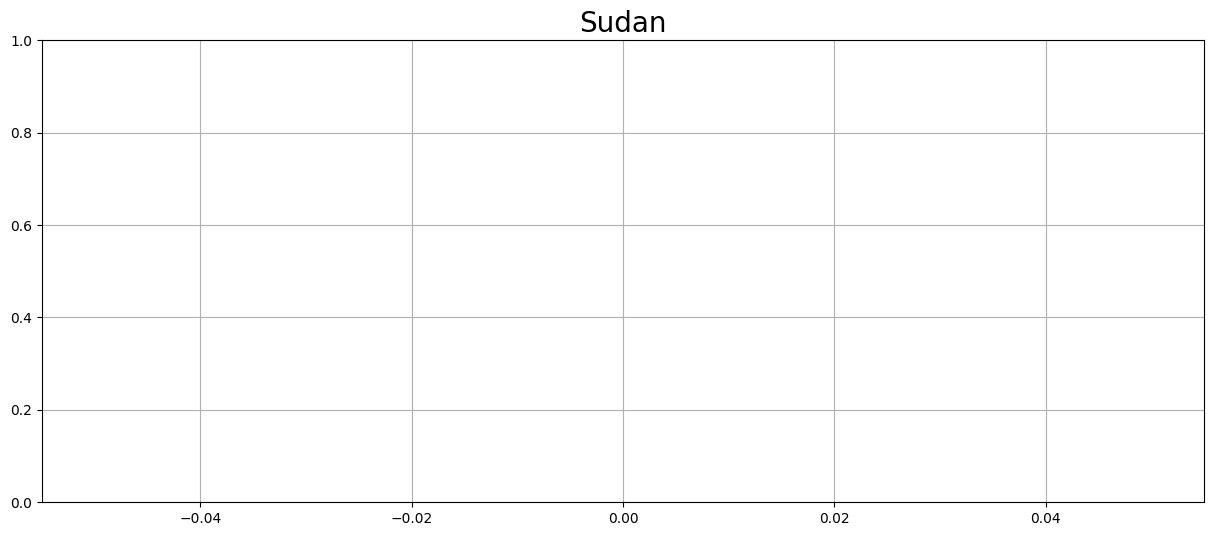

nan


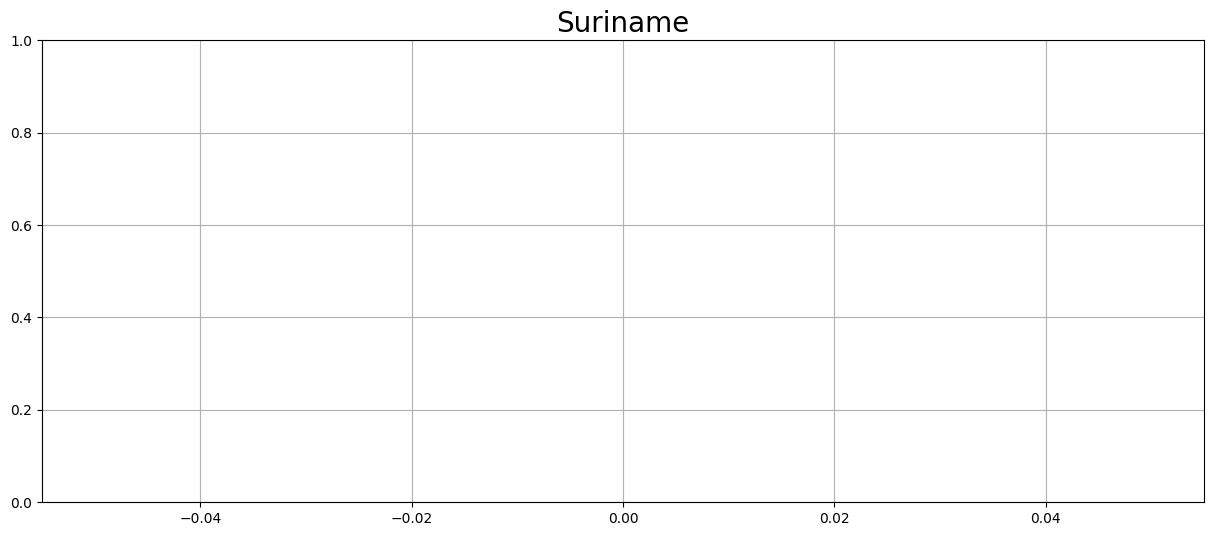

nan


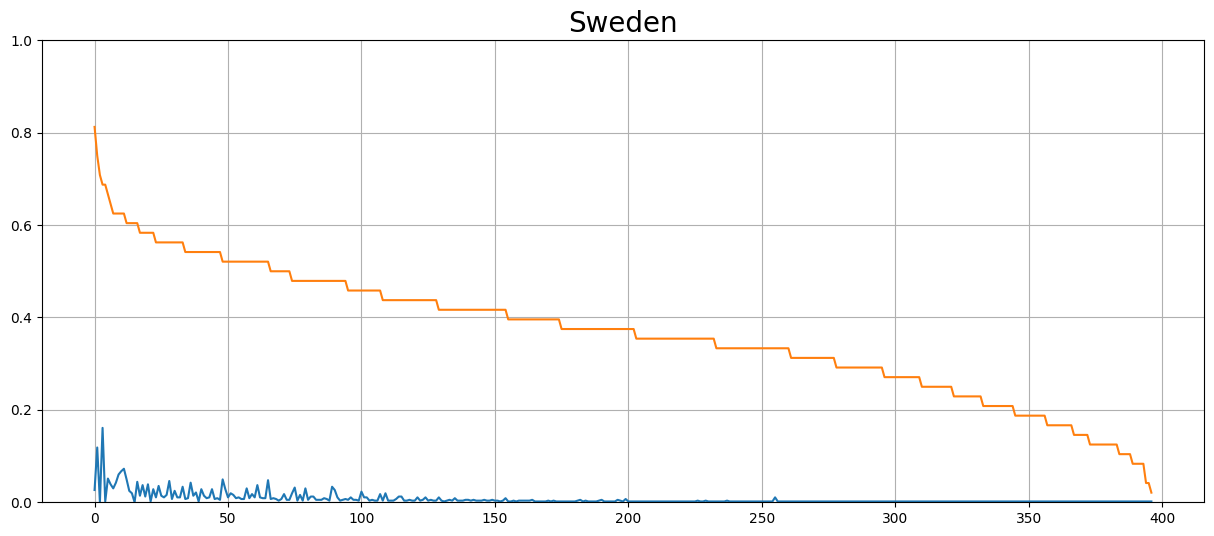

0.5453604005102043


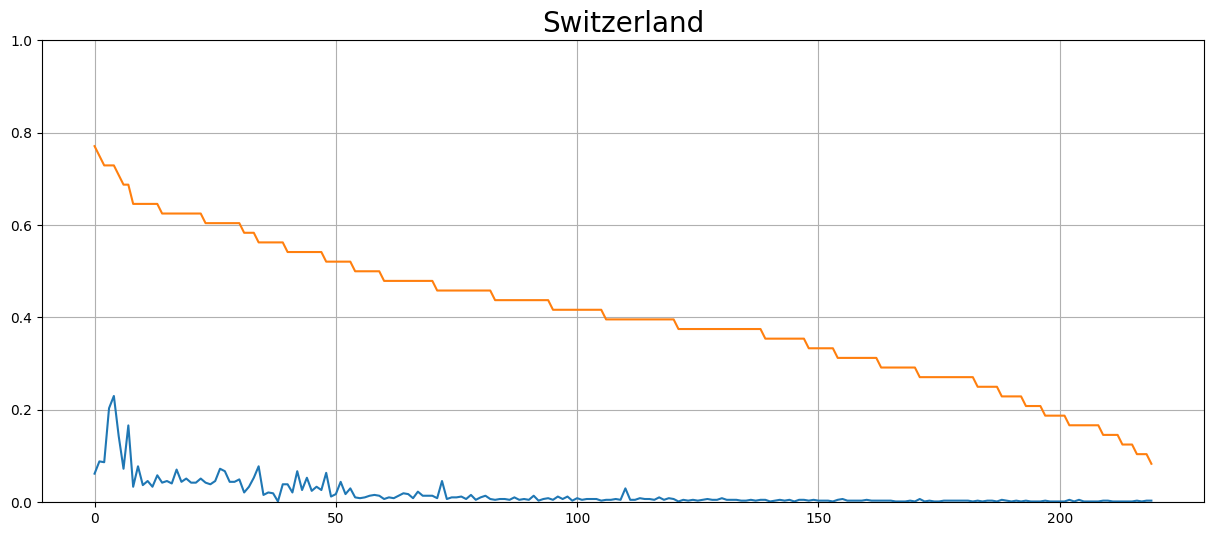

0.6778599680469397


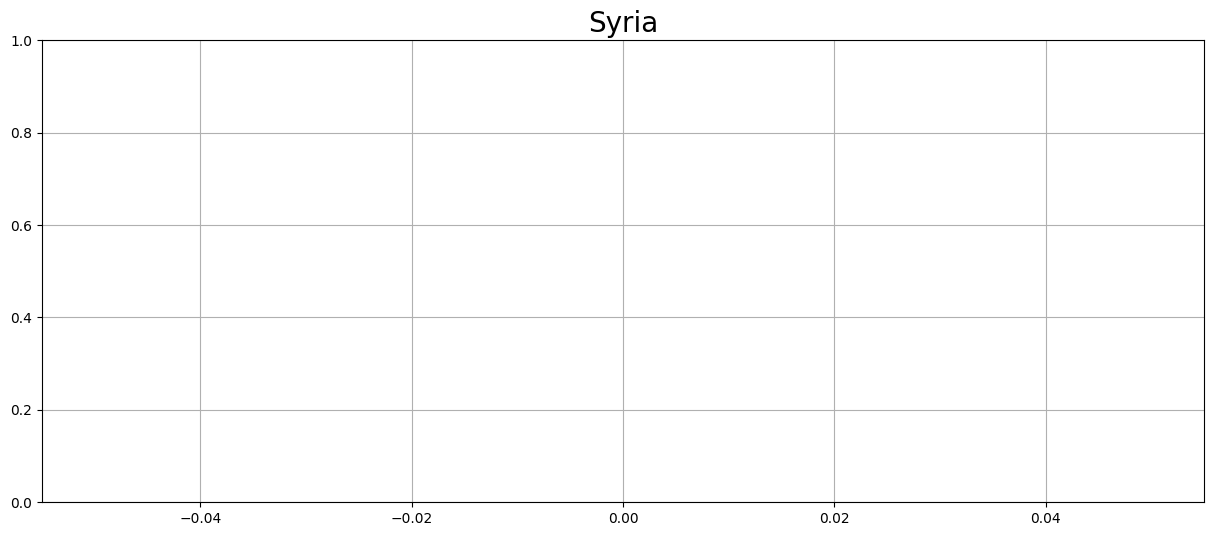

nan


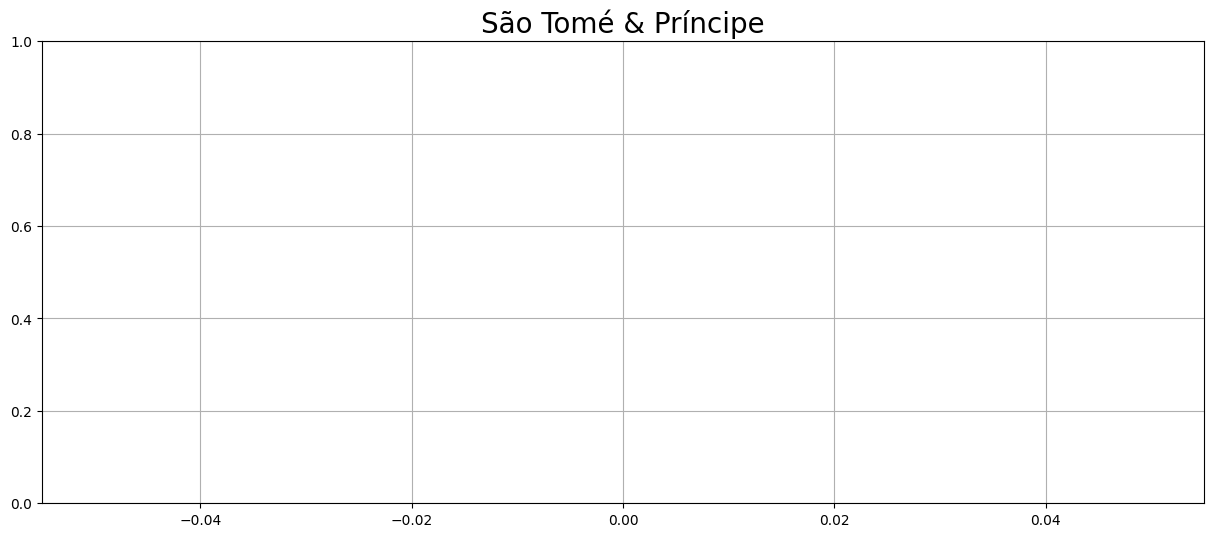

nan


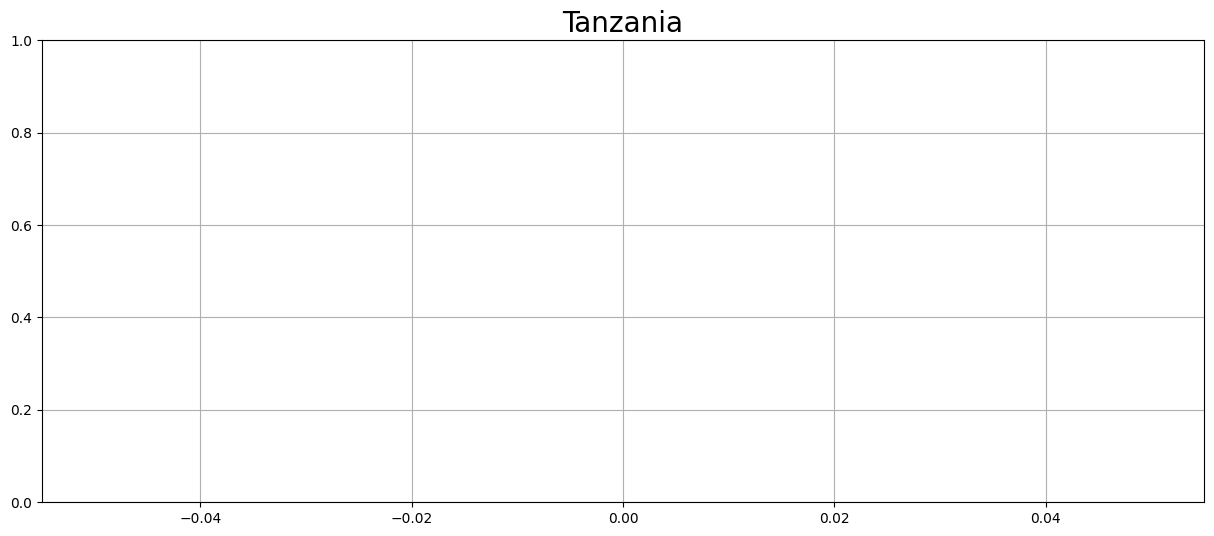

nan


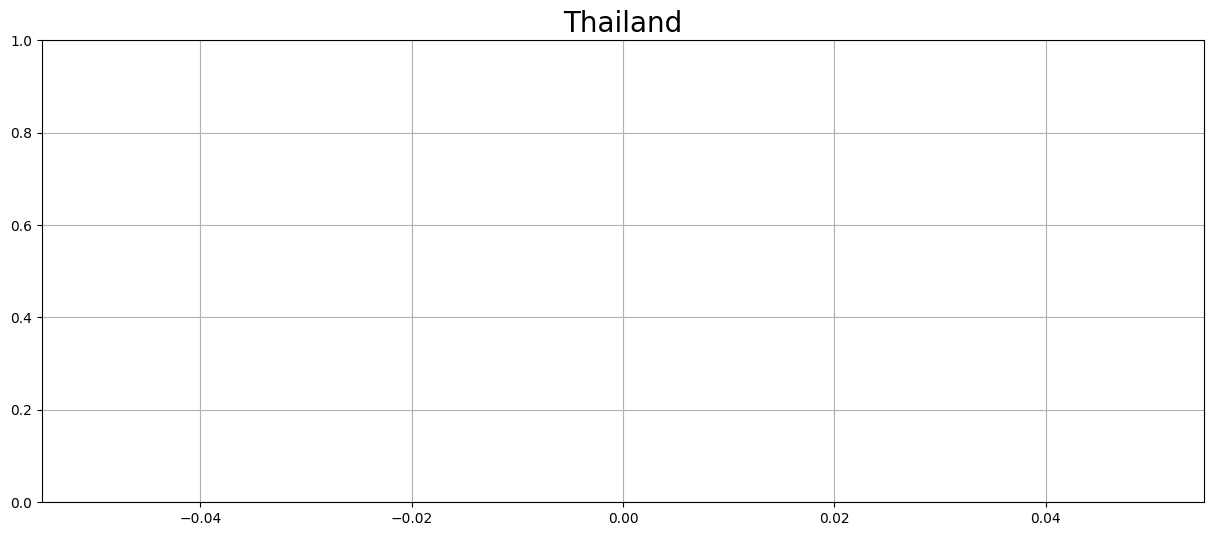

nan


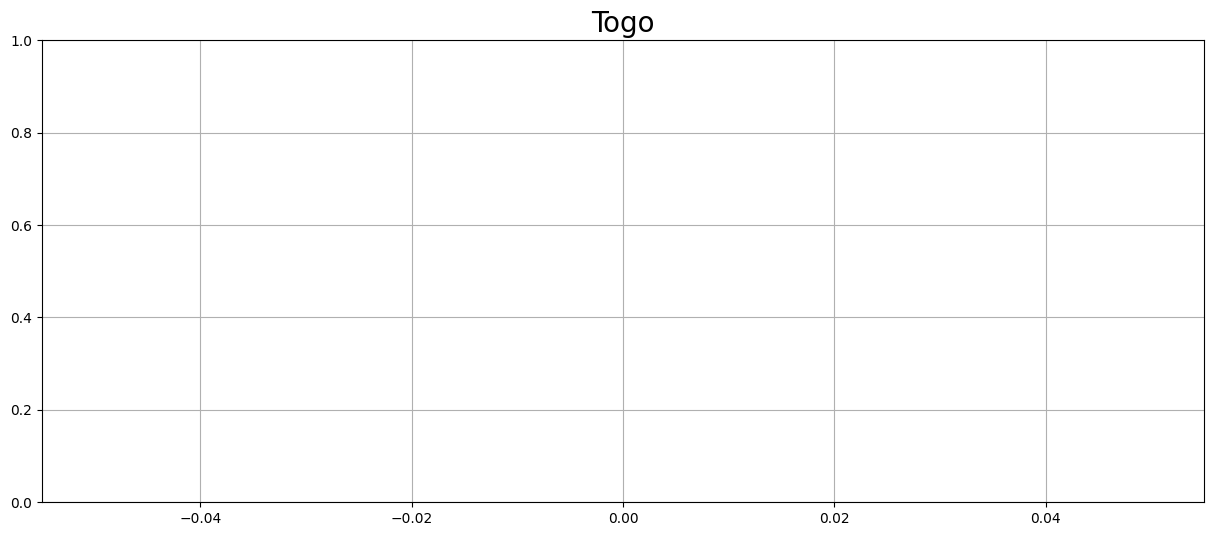

nan


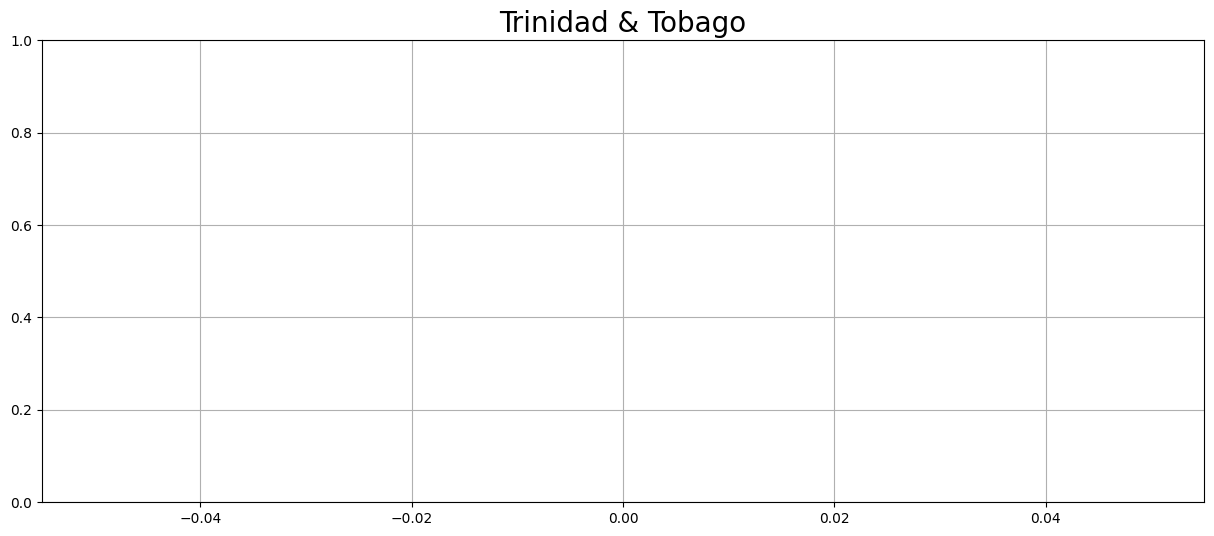

nan


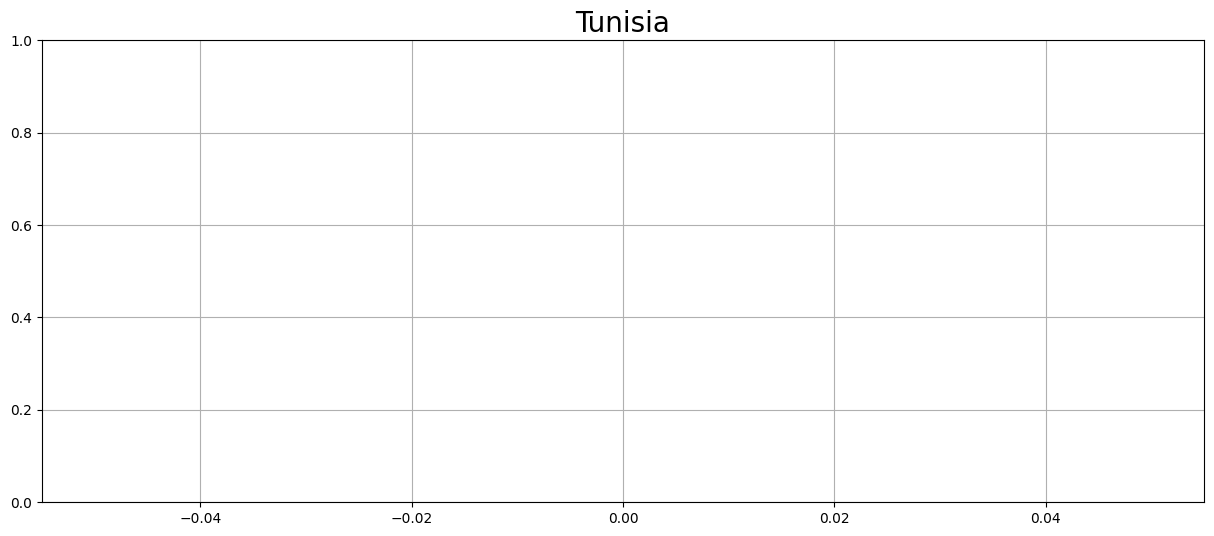

nan


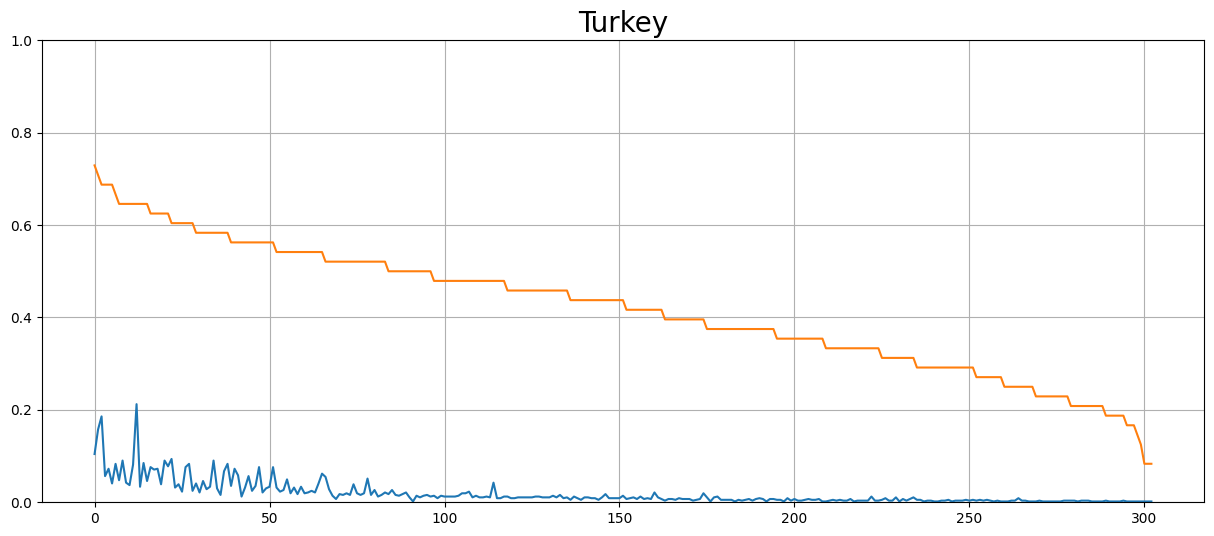

0.6798738140280266


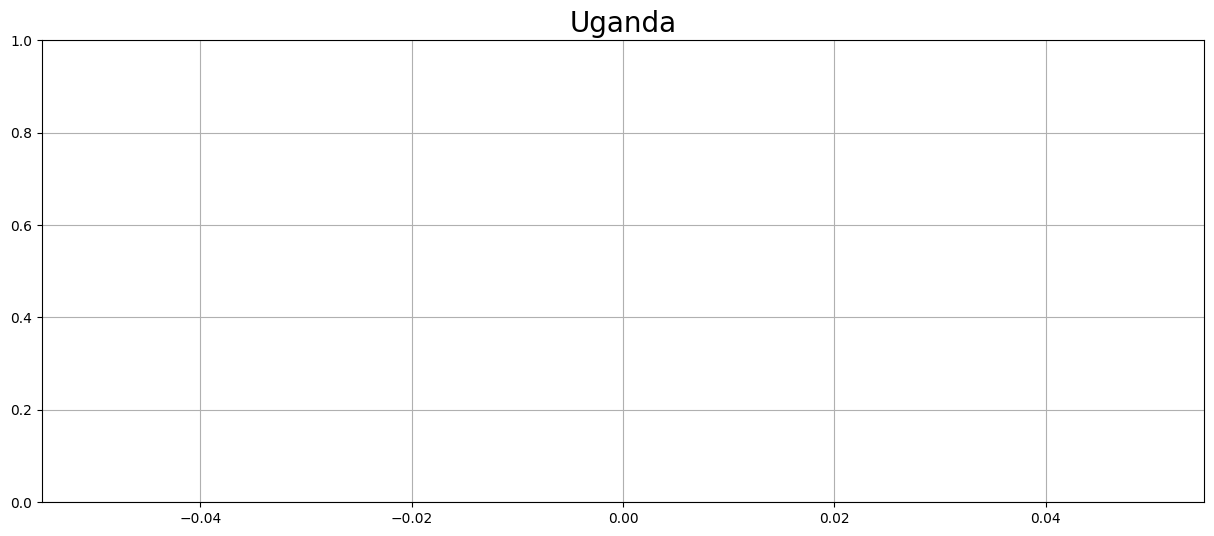

nan


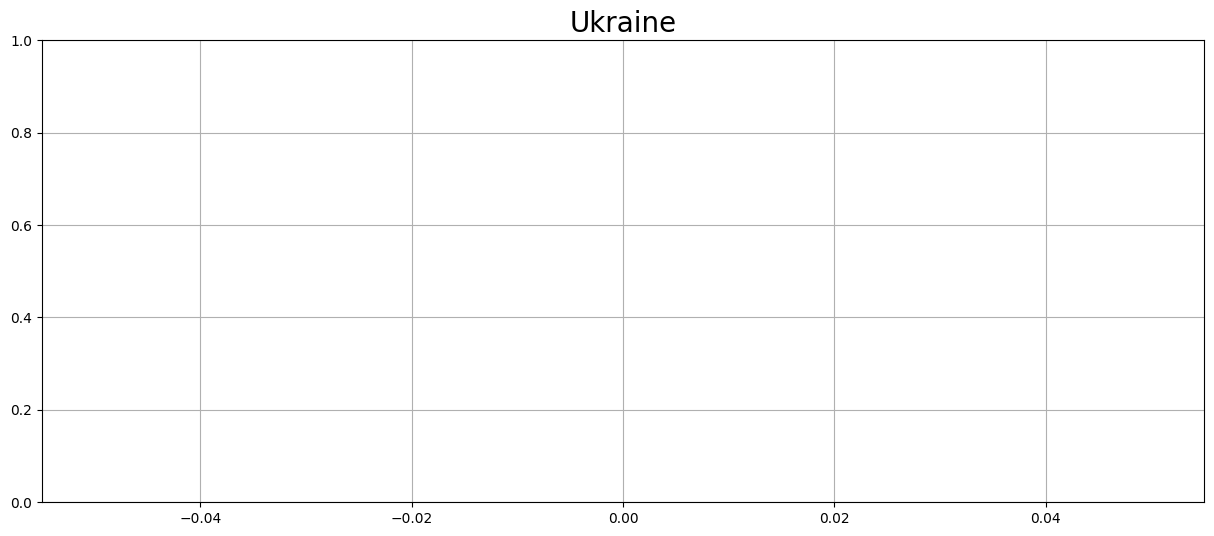

nan


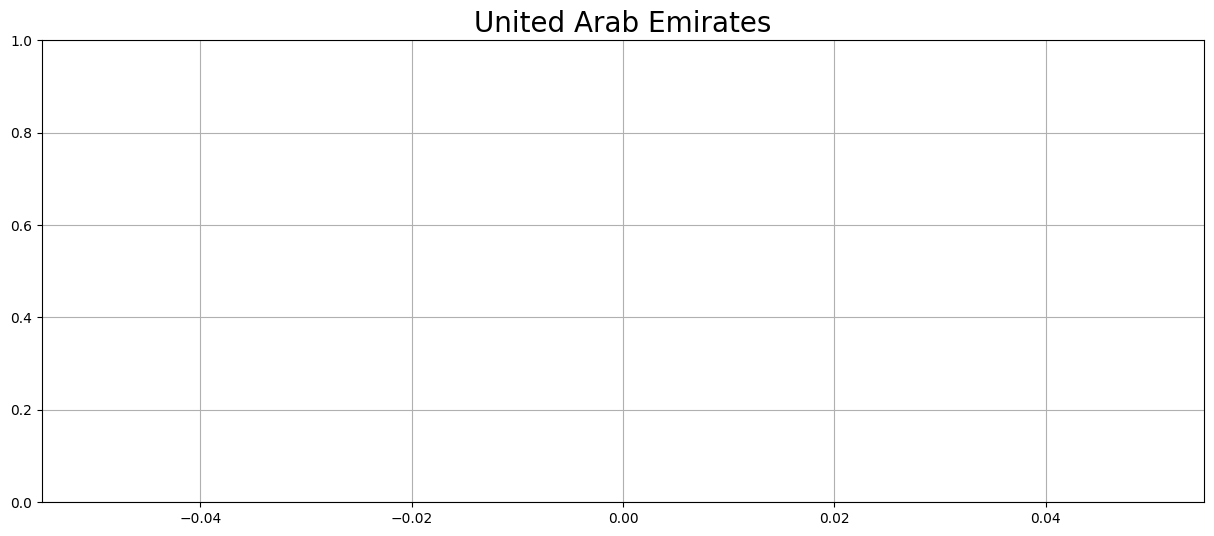

nan


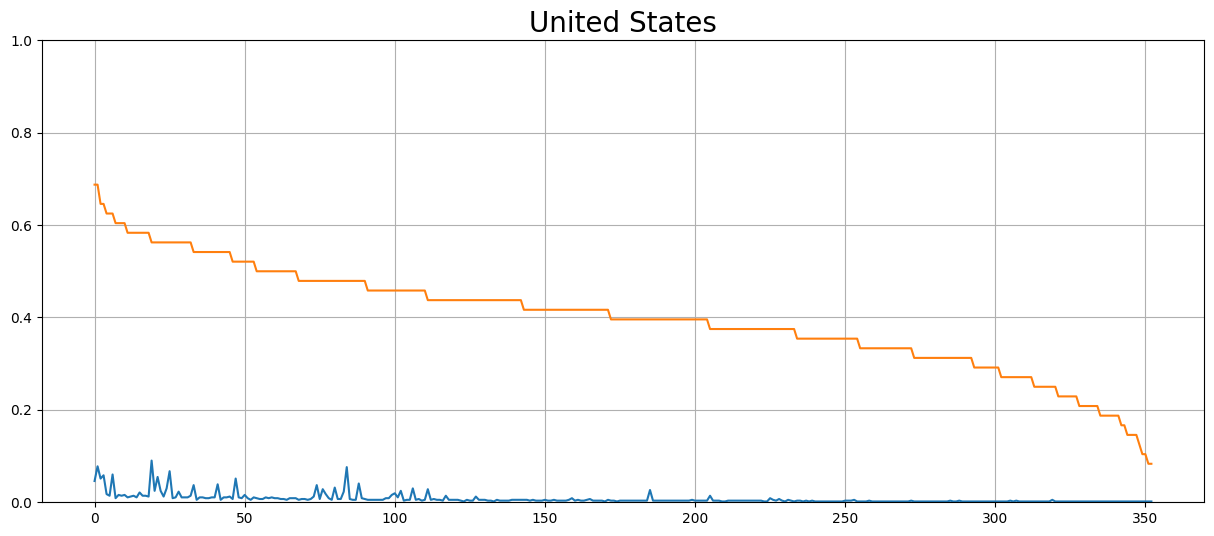

0.5430174703023646


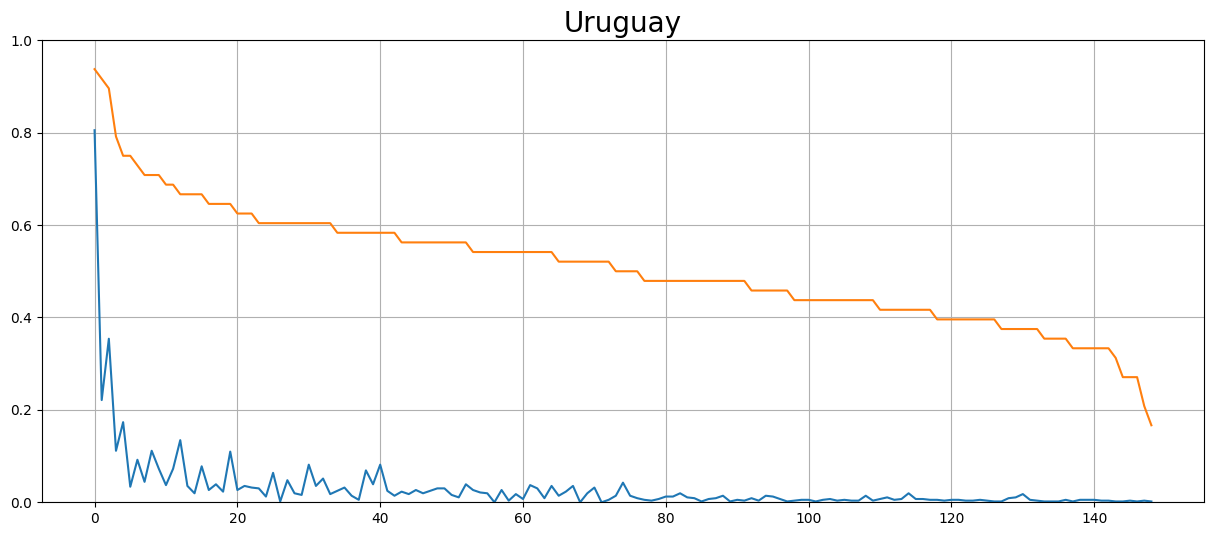

0.5961411360254819


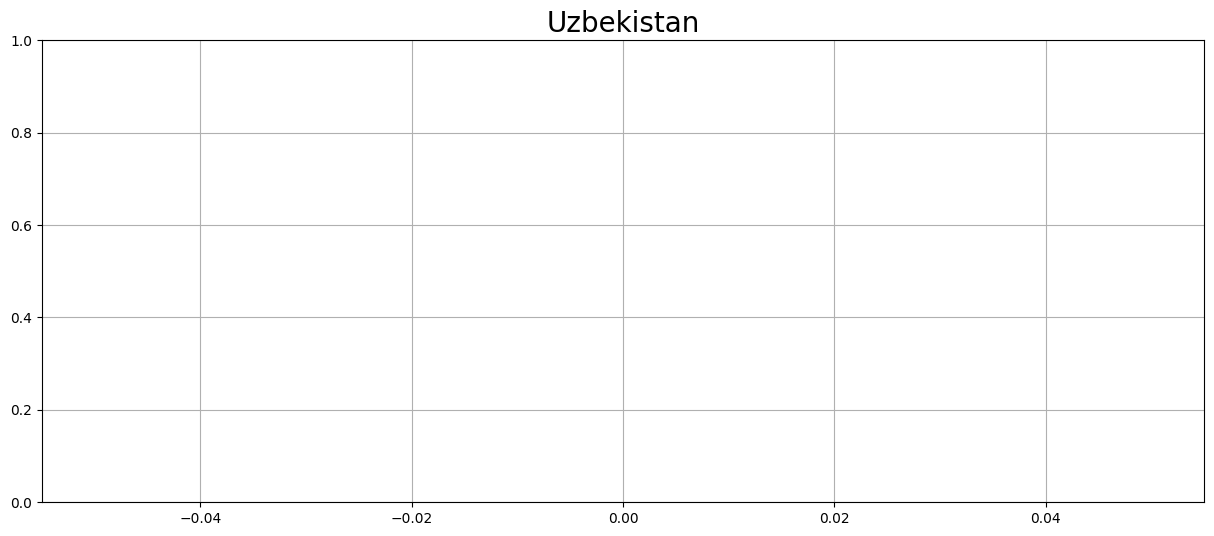

nan


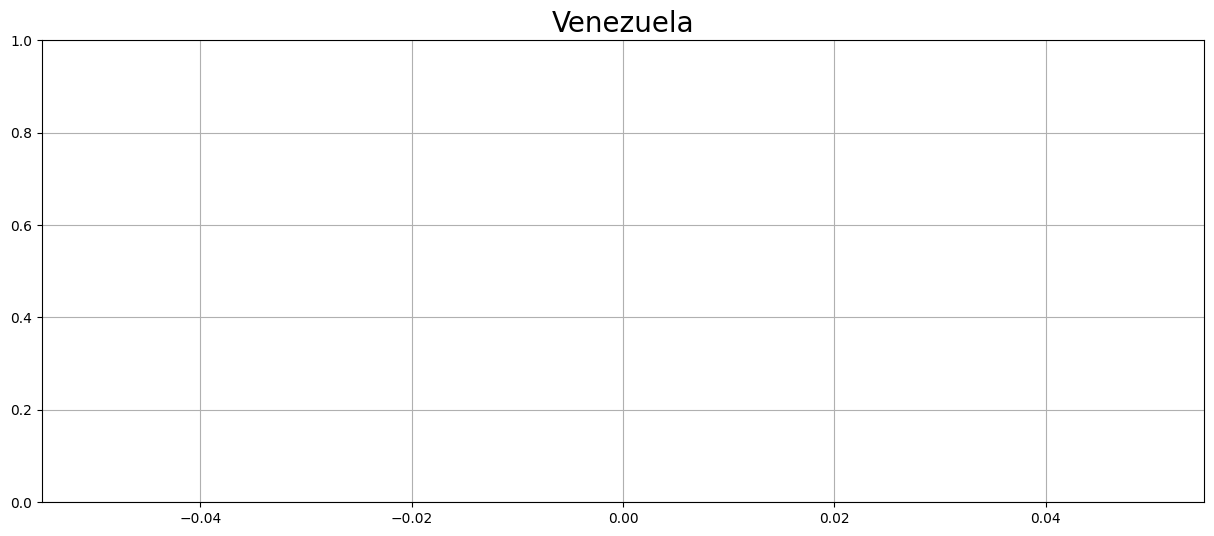

nan


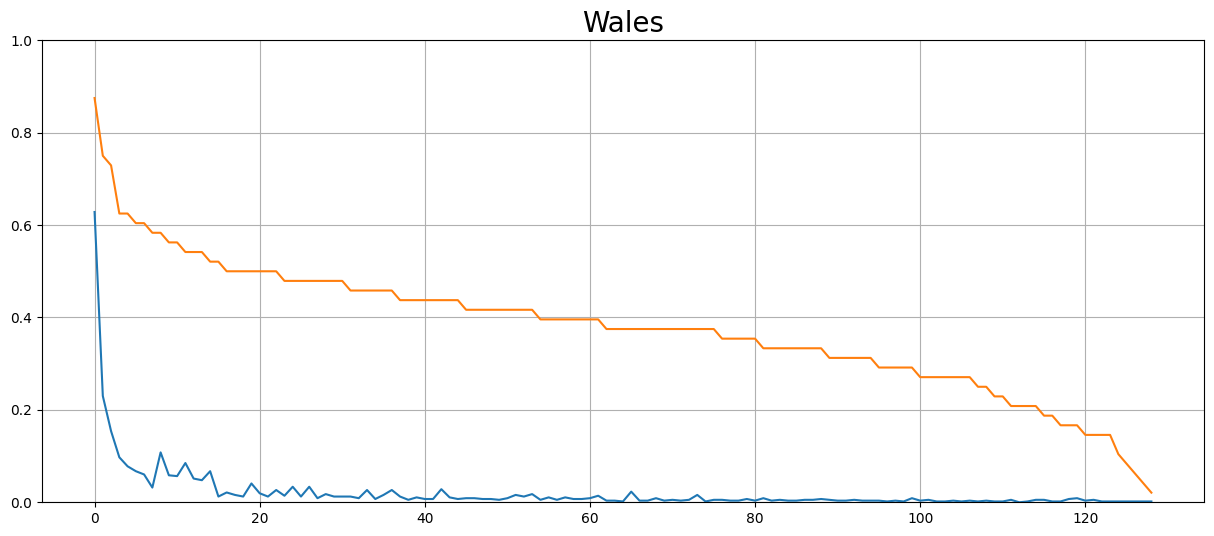

0.5779135595638895


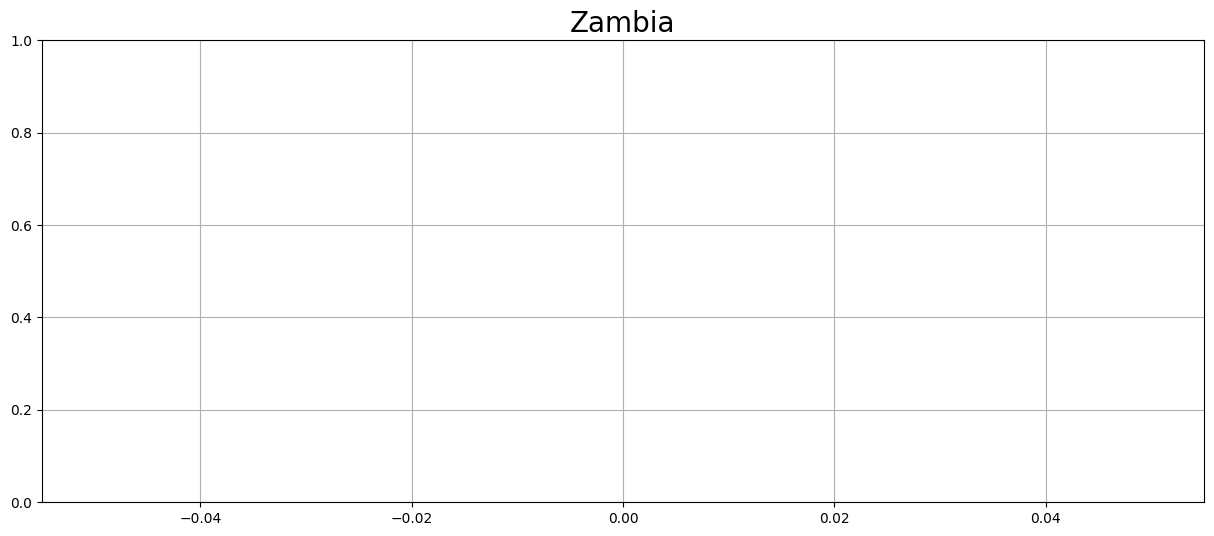

nan


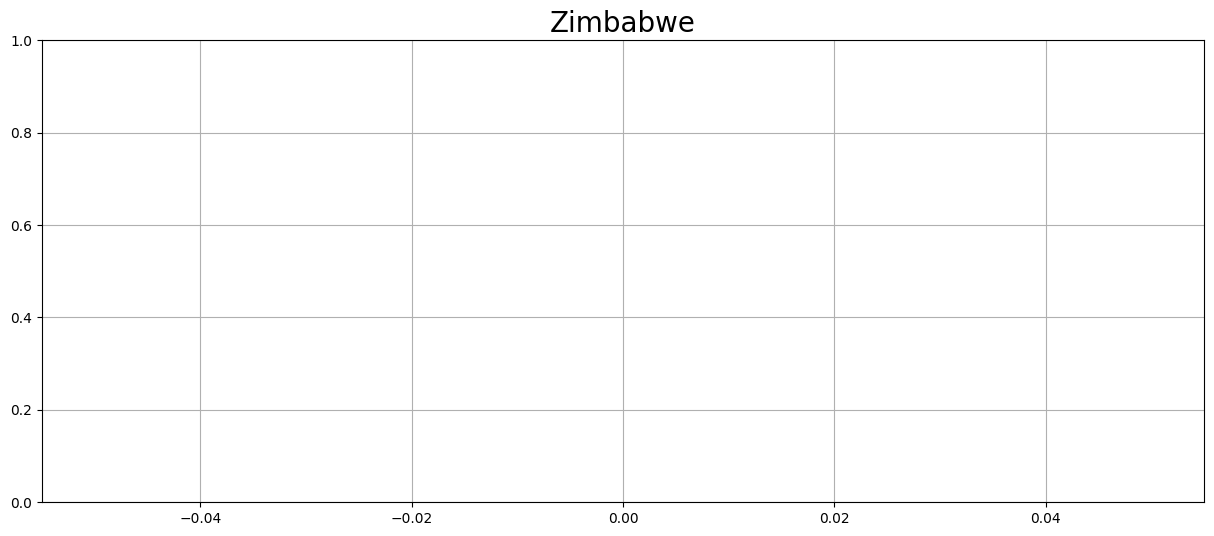

nan


In [25]:
for pais in unique:
    plt.figure(figsize=(15,6))
    plt.plot(newDataset[np.where(newDataset == pais)[0]][:,5])
    plt.plot(newDataset[np.where(newDataset == pais)[0]][:,2])
    plt.grid()
    plt.ylim(0,1)
    plt.title(pais, fontsize=20)
    plt.show()
    print(np.corrcoef(list(newDataset[np.where(newDataset == pais)[0]][:,5]),list(newDataset[np.where(newDataset == pais)[0]][:,2]))[0][1])

In [26]:
newDf = pd.DataFrame(data=newDataset,columns=["Pais","Club","Overall","Potential","Value","Salario"])
newDf

Pais                 Club   Overall Potential     Value   Salario
0      Argentina         FC Barcelona       1.0  0.978723  0.932489       1.0
1       Portugal             Juventus       1.0  0.978723  0.649789  0.716814
2         Brazil  Paris Saint-Germain  0.958333  0.957447       1.0  0.513274
3          Spain    Manchester United    0.9375  0.957447  0.607595  0.460177
4        Belgium      Manchester City    0.9375   0.93617  0.860759  0.628319
...          ...                  ...       ...       ...       ...       ...
15645    England      Crewe Alexandra  0.020833  0.361702  0.000506   0.00177
15646     Sweden       Trelleborgs FF  0.020833  0.319149  0.000506   0.00177
15647    England     Cambridge United  0.020833  0.404255  0.000506   0.00177
15648    England      Tranmere Rovers  0.020833  0.382979  0.000506   0.00177
15649    England      Tranmere Rovers       0.0  0.382979  0.000506   0.00177

[15650 rows x 6 columns]

/home/jerry/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


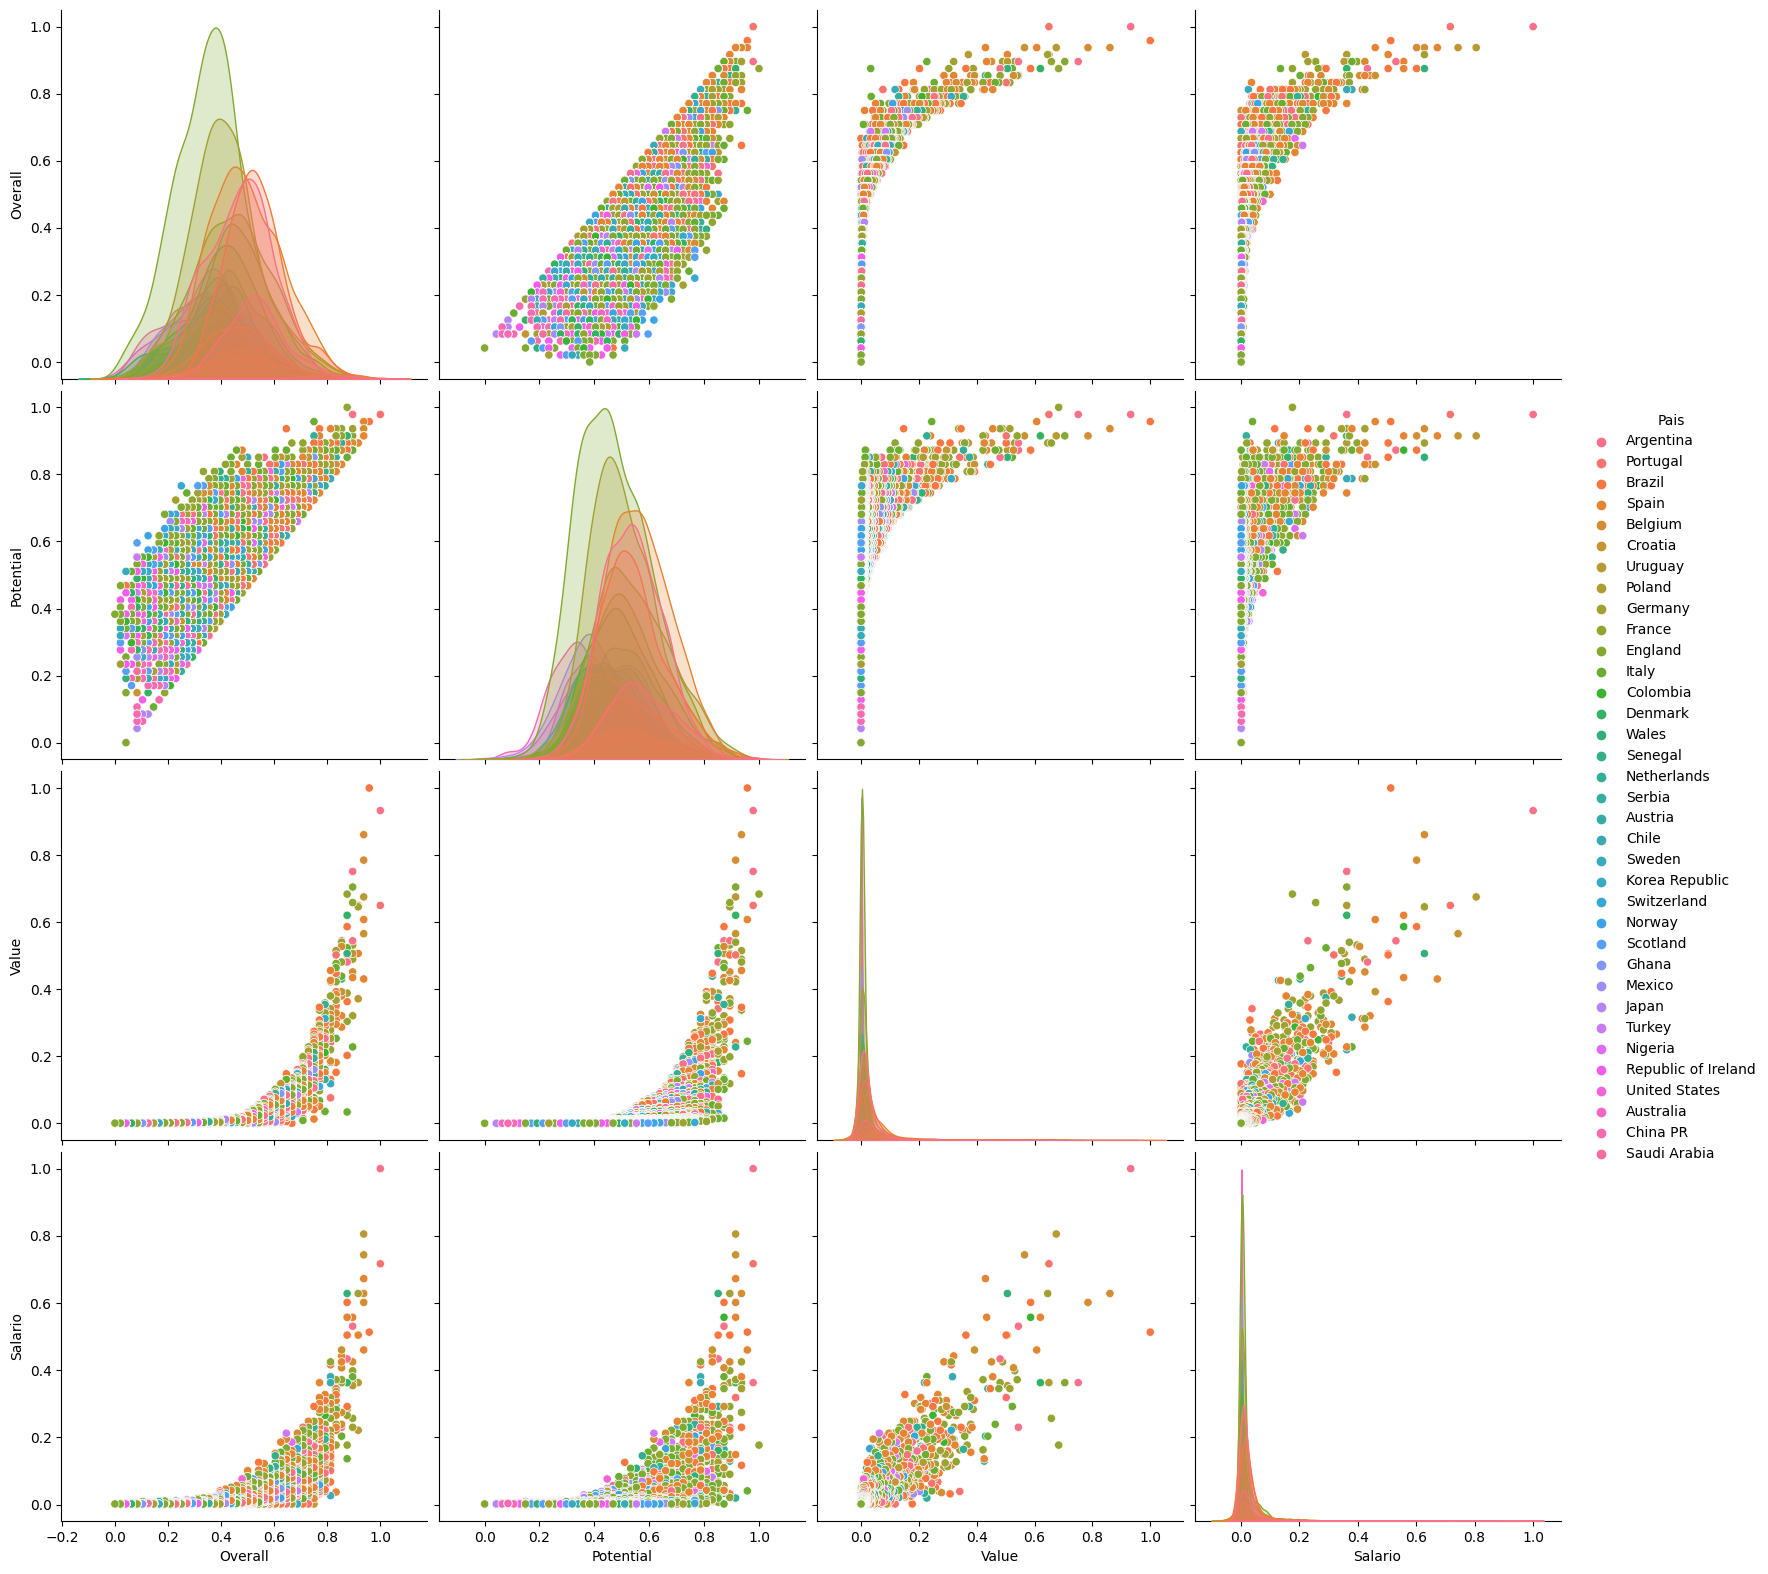

In [27]:
#Mucho poder de cómputo implicado
sb.pairplot(newDf.dropna(), hue='Pais',size=4,vars=["Overall","Potential","Value","Salario"])

In [28]:
#Mucho más poder de cómputo parece ._.
sb.pairplot(newDf.dropna(), hue='Club',size=4,vars=["Overall","Potential","Value","Salario"])

/home/jerry/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Error in callback <function _draw_all_if_interactive at 0x7f060b9543a0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f05fe4db670> (for post_execute):


KeyboardInterrupt: 

In [29]:
newDf["Pais"] = newDf.Pais.astype("category").cat.codes
newDf["Club"] = newDf.Club.astype("category").cat.codes
newDf["Pais"] = (newDf["Pais"] - min(newDf["Pais"]))/ (max(newDf["Pais"])-min(newDf["Pais"]))
newDf["Club"] = (newDf["Club"] - min(newDf["Club"]))/ (max(newDf["Club"])-min(newDf["Club"]))

In [30]:
newDf

Pais      Club   Overall Potential     Value   Salario
0      0.000000  0.327189       1.0  0.978723  0.932489       1.0
1      0.647059  0.502304       1.0  0.978723  0.649789  0.716814
2      0.117647  0.669739  0.958333  0.957447       1.0  0.513274
3      0.823529  0.577573    0.9375  0.957447  0.607595  0.460177
4      0.088235  0.576037    0.9375   0.93617  0.860759  0.628319
...         ...       ...       ...       ...       ...       ...
15645  0.294118  0.254992  0.020833  0.361702  0.000506   0.00177
15646  0.852941  0.903226  0.020833  0.319149  0.000506   0.00177
15647  0.294118  0.188940  0.020833  0.404255  0.000506   0.00177
15648  0.294118  0.901690  0.020833  0.382979  0.000506   0.00177
15649  0.294118  0.901690       0.0  0.382979  0.000506   0.00177

[15650 rows x 6 columns]

In [31]:

mCorr=newDf.corr().round(2)
mCorr

/tmp/ipykernel_9678/978068788.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mCorr=newDf.corr().round(2)


Pais  Club
Pais   1.0   0.0
Club   0.0   1.0

In [32]:
input_train, input_test, target_train, target_test = train_test_split(newDf.drop(["Pais","Club"],axis=1), newDf["Pais"], test_size = 0.3, random_state=4,shuffle=True)

model = Sequential()
model.add(layers.Conv2D())
model.add((100, activation = 'relu', return_sequences = True, input_shape = (step_days ,input_train.shape[2])))
model.add(LSTM(32, activation = 'relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(3))
model.compile(optimizer = 'adam', loss = 'mse')
history = model.fit(input_train, target_train, validation_data = (input_test, target_test),batch_size = 16, epochs = 100)